> ### Implementation of a Machine Learning Project <br>

1- Problem Definition

2- Data collection

3- Data Preprocessing and EDA

4- Data Modelling and Evaluation

5- Feature selection

6- Modelling and Evaluation

7- Experiments


## Step_1 Problem Statement

### Phishing Websites Detection (Using Machine Learning) 
**Phishing is a form of fraud in which the attacker tries to learn sensitive information such as login credentials or account information by sending as a reputable entity or person in email or other communication channels.**
Phishing is popular among attackers because it is easier to persuade someone to click a malicious link that appears to be authentic or legitimate  than it is to break through a computer's protection measures. The main goal is to predict whether the domains are real or malicious
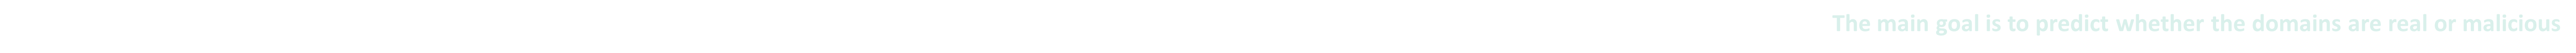

In this notebook we will see what all features can we derive and use from the domain/URL of a website to detect whether it is phishing or not. First of all let us understand the breakdown of a URL.
Here in this project we will be uisng diffrent Machine Learnig Models ie base models and Ensemble techiaues to perform Supervised Machine Learninf Classifaction between Legitimate and Phishing Websites. We will be using Supervised Learning Classification Models.

     
     
     
     



# Domain Analysis

**URL components** <br>
Uniform Resource Locator (URL) is created to address web pages. The figure below shows relevant parts in the structure of a typical URL.

<img src='https://miro.medium.com/max/1400/1*mPoNQ5LUkuOTog1dUb1EFw.png' width=600></img>

A phisher has full control over the subdomain portions and can set any value to it. The URL may also have a path and file components which, too, can be changed by the phisher at will. The subdomain name and path are fully controllable by the phisher. We use the term FreeURL to refer to those parts of the URL in the rest of the article.<br>
The attacker can register any domain name that has not been registered before. This part of URL can be set only once. The phisher can change FreeURL at any time to create a new URL. The reason security defenders struggle to detect phishing domains is because of the unique part of the website domain (the FreeURL). When a domain detected as a fraudulent, it is easy to prevent this domain before an user access to it.

# Dataset description

There are 4 types of features that we can extract from the URL.
- Address Bar based Features
- Abnormal Based Features
- HTML and JavaScript based Features
- Domain based Features

### Address Bar based Features
1. **Using the IP Address**<br>
If an IP address is used as an alternative of the domain name in the URL, such as “http://125.98.3.123/fake.html”, users can be sure that someone is trying to steal their personal information. Sometimes, the IP address is even transformed into hexadecimal code as shown in the following link “http://0x58.0xCC.0xCA.0x62/2/paypal.ca/index.html”.
> RULE: IF <br>
{If The Domain Part has an IP Address → Phishing<br>
{Otherwise→ Legitimate

2. **Long URL to Hide the Suspicious Part**<br>
Phishers can use long URL to hide the doubtful part in the address bar. For example: 
http://federmacedoadv.com.br/3f/aze/ab51e2e319e51502f416dbe46b773a5e/?cmd=_home&amp;dispatch=11004d58f5b74f8dc1e7c2e8dd4105e811004d58f5b74f8dc1e7c2e8dd4105e8@phishing.website.html
To ensure accuracy of our study, we calculated the length of URLs in the dataset and produced an average URL length. The results showed that if the length of the URL is greater than or equal 54 characters then the URL classified as phishing. By reviewing our dataset we were able to find 1220 URLs lengths equals to 54 or more which constitute 48.8% of the total dataset size. We have been able to update this feature rule by using a method based on frequency and thus improving upon its accuracy.
> RULE: IF<br>
{URL length<54 → feature = Legitimate<br>
{else if URL length≥54 and ≤75 → feature = Suspicious<br>
{otherwise→ feature = Phishing

3. **Using URL Shortening Services “TinyURL”**<br>
URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL. For example, the URL “http://portal.hud.ac.uk/” can be shortened to “bit.ly/19DXSk4”.
> RULE: IF<br>
{TinyURL → Phishing<br>
{Otherwise→ Legitimate

4. **URL’s having “@” Symbol**<br>
Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol.
>RULE: IF<br>
{Url Having @ Symbol→ Phishing<br>
{Otherwise→ Legitimate

5. **Redirecting using “//”**<br>
The existence of “//” within the URL path means that the user will be redirected to another website. An example of such URL’s is: “http://www.legitimate.com//http://www.phishing.com”. We examin the location where the “//” appears. We find that if the URL starts with “HTTP”, that means the “//” should appear in the sixth position. However, if the URL employs “HTTPS” then the “//” should appear in seventh position.
>RULE: IF<br>
{The Position of the Last Occurrence of "//\" " in the URL > 7→ Phishing<br>
{Otherwise→ Legitimate

6. **Adding Prefix or Suffix Separated by (-) to the Domain**<br>
The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage. For example http://www.Confirme-paypal.com/.
>RULE: IF<br>
{Domain Name Part Includes (-) Symbol → Phishing<br>
{Otherwise → Legitimate

7. **Sub Domain and Multi Sub Domains**<br>
Let us assume we have the following link: http://www.hud.ac.uk/students/. A domain name might include the country-code top-level domains (ccTLD), which in our example is “uk”. The “ac” part is shorthand for “academic”, the combined “ac.uk” is called a second-level domain (SLD) and “hud” is the actual name of the domain. To produce a rule for extracting this feature, we firstly have to omit the (www.) from the URL which is in fact a sub domain in itself. Then, we have to remove the (ccTLD) if it exists. Finally, we count the remaining dots. If the number of dots is greater than one, then the URL is classified as “Suspicious” since it has one sub domain. However, if the dots are greater than two, it is classified as “Phishing” since it will have multiple sub domains. Otherwise, if the URL has no sub domains, we will assign “Legitimate” to the feature.
> RULE: IF<br>
{Dots In Domain Part=1 → Legitimate<br>
{Dots In Domain Part=2 → Suspicious<br>
{Otherwise→ Phishing

8. **HTTPS (Hyper Text Transfer Protocol with Secure Sockets Layer)**<br>
The existence of HTTPS is very important in giving the impression of website legitimacy, but this is clearly not enough. The authors in (Mohammad, Thabtah and McCluskey 2012) (Mohammad, Thabtah and McCluskey 2013) suggest checking the certificate assigned with HTTPS including the extent of the trust certificate issuer, and the certificate age. Certificate Authorities that are consistently listed among the top trustworthy names include: “GeoTrust, GoDaddy, Network Solutions, Thawte, Comodo, Doster and VeriSign”. Furthermore, by testing out our datasets, we find that the minimum age of a reputable certificate is two years.
>RULE: IF<br>
{Use https and Issuer Is Trusted &and Age of Certificate≥ 1 Years → Legitimate<br>
{Using https and Issuer Is Not Trusted  → Suspicious<br>
{Otherwise→ Phishing

9. **Domain Registration Length**<br>
Based on the fact that a phishing website lives for a short period of time, we believe that trustworthy domains are regularly paid for several years in advance. In our dataset, we find that the longest fraudulent domains have been used for one year only.
>RULE: IF<br>
{Domains Expires on≤ 1 years → Phishing<br>
{Otherwise→ Legitimate

10. **Favicon**<br>
A favicon is a graphic image (icon) associated with a specific webpage. Many existing user agents such as graphical browsers and newsreaders show favicon as a visual reminder of the website identity in the address bar. If the favicon is loaded from a domain other than that shown in the address bar, then the webpage is likely to be considered a Phishing attempt.
>RULE: IF<br>
{Favicon Loaded From External Domain→ Phishing<br>
{Otherwise→ Legitimate

11. **Using Non-Standard Port**<br>
This feature is useful in validating if a particular service (e.g. HTTP) is up or down on a specific server. In the aim of controlling intrusions, it is much better to merely open ports that you need. Several firewalls, Proxy and Network Address Translation (NAT) servers will, by default, block all or most of the ports and only open the ones selected. If all ports are open, phishers can run almost any service they want and as a result, user information is threatened.
>RULE: IF<br>
{"Port # is of the " Preffered Status→ Phishing<br>
{Otherwise→ Legitimate

12. **The Existence of “HTTPS” Token in the Domain Part of the URL**<br>
The phishers may add the “HTTPS” token to the domain part of a URL in order to trick users. For example,
http://https-www-paypal-it-webapps-mpp-home.soft-hair.com/.
>RULE: IF<br>
{"Using " HTTP Token in Domain Part of The URL→ Phishing<br>
{Otherwise→ Legitimate


### Abnormal Based Features
1. **Request URL**<br>
Request URL examines whether the external objects contained within a webpage such as images, videos and sounds are loaded from another domain. In legitimate webpages, the webpage address and most of objects embedded within the webpage are sharing the same domain. 
>Rule: IF<br>
{% of Request URL <22% → Legitimate<br>
{%of Request URL≥22% and 61%→ Suspicious<br>
{Otherwise→ feature=Phishing

2. **URL of Anchor**<br>
An anchor is an element defined by the ```<a>``` tag. This feature is treated exactly as “Request URL”. However, for this feature we examine:
	If the ```<a>``` tags and the website have different domain names. This is similar to request URL feature. 
	If the anchor does not link to any webpage, e.g.:<br>
	```<a href=“#”>```<br>
	```<a href=“#content”>```<br>
	```<a href=“#skip”>```<br>
	```<a href=“JavaScript ::void(0)”>```<br>
>Rule:  IF<br>
{% of URL Of Anchor <31%  → Legitimate<br>
{% of URL Of Anchor ≥31% and ≤67% → Suspicious<br> 
{Otherwise→ Phishing

3. **Links in ```<Meta>, <Script>``` and ```<Link>``` tags**<br>
Given that our investigation covers all angles likely to be used in the webpage source code, we find that it is common for legitimate websites to use ```<Meta>``` tags to offer metadata about the HTML document; ```<Script>``` tags to create a client side script; and ```<Link>``` tags to retrieve other web resources. It is expected that these tags are linked to the same domain of the webpage. 
>Rule: IF<br>
{% of Links in ```<Meta>```,```<Script>``` and ```<Link>```<17%  → Legitimate<br>
{% of Links in ```<Meta>```,```<Script>``` and ```<Link>``` ≥17% And≤81% → Suspicious<br>
{Otherwise→ Phishing

4. **Server Form Handler (SFH)**<br>
SFHs that contain an empty string or “about:blank” are considered doubtful because an action should be taken upon the submitted information. In addition, if the domain name in SFHs is different from the domain name of the webpage, this reveals that the webpage is suspicious because the submitted information is rarely handled by external domains. 
>Rule: IF<br>
{SFH is ""about: blank\"" Or Is Empty → Phishing<br>
{SFH "Refers To " A Different Domain→ Suspicious<br>
{Otherwise  → Legitimate

5. **Submitting Information to Email**<br>
Web form allows a user to submit his personal information that is directed to a server for processing. A phisher might redirect the user’s information to his personal email. To that end, a server-side script language might be used such as “mail()” function in PHP. One more client-side function that might be used for this purpose is the “mailto:” function. 
>Rule: IF<br>
{Using ""mail()\" or \"mailto:\" Function to Submit User Information" → Phishing<br>
{Otherwise  → Legitimate

6. **Abnormal URL**<br>
This feature can be extracted from WHOIS database. For a legitimate website, identity is typically part of its URL. 
>Rule: IF<br>
{The Host Name Is Not Included In URL → Phishing<br>
{Otherwise→ Legitimate
    
### HTML and JavaScript based Features
1. **Website Forwarding**
The fine line that distinguishes phishing websites from legitimate ones is how many times a website has been redirected. In our dataset, we find that legitimate websites have been redirected one time max. On the other hand, phishing websites containing this feature have been redirected at least 4 times. 
>Rule: IF<br> 
{Number of Redirect Page ≤ 1 → Legitimate<br>
{Number of Redirect Page ≥ 2 And < 4 → Suspicious<br>
{Otherwise → Phishing

2. **Status Bar Customization**
Phishers may use JavaScript to show a fake URL in the status bar to users. To extract this feature, we must dig-out the webpage source code, particularly the “onMouseOver” event, and check if it makes any changes on the status bar. 
>Rule: IF<br>
{onMouseOver Changes Status Bar→ Phishing<br>
{It Does't Change Status Bar → Legitimate

3. **Disabling Right Click**
Phishers use JavaScript to disable the right-click function, so that users cannot view and save the webpage source code. This feature is treated exactly as “Using onMouseOver to hide the Link”. Nonetheless, for this feature, we will search for event “event.button==2” in the webpage source code and check if the right click is disabled. 
>Rule: IF<br>
{Right Click Disabled → Phishing<br>
{Otherwise → Legitimate

4. **Using Pop-up Window**
It is unusual to find a legitimate website asking users to submit their personal information through a pop-up window. On the other hand, this feature has been used in some legitimate websites and its main goal is to warn users about fraudulent activities or broadcast a welcome announcement, though no personal information was asked to be filled in through these pop-up windows.
>Rule: IF<br> 
{Popoup Window Contains Text Fields → Phishing<br>
{Otherwise → Legitimate

5. **IFrame Redirection**
IFrame is an HTML tag used to display an additional webpage into one that is currently shown. Phishers can make use of the “iframe” tag and make it invisible i.e. without frame borders. In this regard, phishers make use of the “frameBorder” attribute which causes the browser to render a visual delineation. 
>Rule: IF<br>
{Using iframe → Phishing<br>
{Otherwise → Legitimate

### Domain based Features
1. **Age of Domain**<br>
This feature can be extracted from WHOIS database (Whois 2005). Most phishing websites live for a short period of time. By reviewing our dataset, we find that the minimum age of the legitimate domain is 6 months. 
>Rule: IF<br>
{Age Of Domain≥6 months → Legitimate<br>
{Otherwise → Phishing

2. **DNS Record**<br>
For phishing websites, either the claimed identity is not recognized by the WHOIS database (Whois 2005) or no records founded for the hostname (Pan and Ding 2006). If the DNS record is empty or not found then the website is classified as “Phishing”, otherwise it is classified as “Legitimate”. 
>Rule: IF<br>
{no DNS Record For The Domain → Phishing<br>
{Otherwise → Legitimate

3. **Website Traffic**<br>
This feature measures the popularity of the website by determining the number of visitors and the number of pages they visit. However, since phishing websites live for a short period of time, they may not be recognized by the Alexa database (Alexa the Web Information Company., 1996). By reviewing our dataset, we find that in worst scenarios, legitimate websites ranked among the top 100,000. Furthermore, if the domain has no traffic or is not recognized by the Alexa database, it is classified as “Phishing”. Otherwise, it is classified as “Suspicious”. 
>Rule: IF<br>
{Website Rank<100,000 → Legitimate<br>
{Website Rank>100,000 → Suspicious<br>
{Otherwise → Phishing
	
4. **PageRank**<br>
PageRank is a value ranging from “0” to “1”. PageRank aims to measure how important a webpage is on the Internet. The greater the PageRank value the more important the webpage. In our datasets, we find that about 95% of phishing webpages have no PageRank. Moreover, we find that the remaining 5% of phishing webpages may reach a PageRank value up to “0.2”. 
>Rule: IF<br>
{PageRank<0.2 → Phishing<br>
{Otherwise → Legitimate
	
5. **Google Index**<br>
This feature examines whether a website is in Google’s index or not. When a site is indexed by Google, it is displayed on search results (Webmaster resources, 2014). Usually, phishing webpages are merely accessible for a short period and as a result, many phishing webpages may not be found on the Google index. 
>Rule: IF<br>
{Webpage Indexed by Google → Legitimate<br>
{Otherwise → Phishing
	
6. **Number of Links Pointing to Page**<br>
The number of links pointing to the webpage indicates its legitimacy level, even if some links are of the same domain (Dean, 2014). In our datasets and due to its short life span, we find that 98% of phishing dataset items have no links pointing to them. On the other hand, legitimate websites have at least 2 external links pointing to them. 
>Rule: IF<br>
{Number Of Link Pointing to The Webpage=0 → Phishing<br>
{Number Of Link Pointing to The Webpage>0 and ≤ 2 → Suspicious<br>
{Otherwise → Legitimate

7. **Statistical-Reports Based Feature**<br>
Several parties such as PhishTank (PhishTank Stats, 2010-2012), and StopBadware (StopBadware, 2010-2012) formulate numerous statistical reports on phishing websites at every given period of time; some are monthly and others are quarterly. In our research, we used 2 forms of the top ten statistics from PhishTank: “Top 10 Domains” and “Top 10 IPs” according to statistical-reports published in the last three years, starting in January2010 to November 2012. Whereas for “StopBadware”, we used “Top 50” IP addresses.
>Rule: IF<br>
{Host Belongs to Top Phishing IPs or Top Phishing Domains → Phishing<br>
{Otherwise → Legitimate


This was all about the dataset description and range of datasets 

### Methodology

### Models To be Used for Prediction.

     Decision Tree Classifier
     
     Random Forest CLassifier
     
     Boosting And Bagging techniques
     
     Feature selection using Decision trees
     
     Comparing Different Base, Ensemble Models 
     
> ###   Evaluation Metric
   
   > Accuracy: 
It is defined as the number of correct predictions divided by the total number of predictions.

    > F1-Score: 
It is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into “positive” or “negative”.

    > True Positive (TP): 
The total number of times the classifier classifies a URL as phishing, and it is correctly a phishing URL.

    > True Negative (TN): 
The total number of times the classifier classifies a URL as not phishing or legitimate, and it is correctly not a phishing URL.

    > False Positive (FP): 
The total number of times the classifier classifies a URL as a phishing URL, but it is not a phishing URL.

     >False Negative (FN): 
The total number of times the classifier classifies a URL as not a phishing URL, but it is a phishing URL.
     


# Step_2 Data Collection and Importing Libraries

In [1]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import emoji
%matplotlib inline
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('uci-ml-phishing-dataset.csv')
df

id  having_IP_Address  URL_Length  Shortining_Service  \
0          1                 -1           1                   1   
1          2                  1           1                   1   
2          3                  1           0                   1   
3          4                  1           0                   1   
4          5                  1           0                  -1   
...      ...                ...         ...                 ...   
11050  11051                  1          -1                   1   
11051  11052                 -1           1                   1   
11052  11053                  1          -1                   1   
11053  11054                 -1          -1                   1   
11054  11055                 -1          -1                   1   

       having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                     1                        -1             -1   
1                     1                         1             -1   
2                     1                         1             -1   
3                     1                         1             -1   
4                     1                         1             -1   
...                 ...                       ...            ...   
11050                -1                         1              1   
11051                -1                        -1             -1   
11052                 1                         1             -1   
11053                 1                         1             -1   
11054                 1                         1             -1   

       having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                     -1              -1                           -1  ...   
1                      0               1                           -1  ...   
2                     -1              -1                           -1  ...   
3                     -1              -1                            1  ...   
4                      1               1                           -1  ...   
...                  ...             ...                          ...  ...   
11050                  1               1                           -1  ...   
11051                  1              -1                           -1  ...   
11052                  1              -1                           -1  ...   
11053                 -1              -1                            1  ...   
11054                 -1              -1                            1  ...   

       popUpWidnow  Iframe  age_of_domain  DNSRecord  web_traffic  Page_Rank  \
0                1       1             -1         -1           -1         -1   
1                1       1             -1         -1            0         -1   
2                1       1              1         -1            1         -1   
3                1       1             -1         -1            1         -1   
4               -1       1             -1         -1            0         -1   
...            ...     ...            ...        ...          ...        ...   
11050           -1      -1              1          1           -1         -1   
11051           -1       1              1          1            1          1   
11052            1       1              1          1            1         -1   
11053           -1       1              1          1            1         -1   
11054            1       1             -1          1           -1         -1   

       Google_Index  Links_pointing_to_page  Statistical_report  Result  
0                 1                       1                  -1      -1  
1                 1                       1                   1      -1  
2                 1                       0                  -1      -1  
3                 1                      -1                   1      -1  
4                 1                       1                   1       1  
...             ...                     ...   

### Data Overview

In [3]:
df.shape

(11055, 32)

There are 11055 instances or records in the dataset and total 32 columns including target fdeature and independent features

In [4]:
                     ####Listing the columns in capitalize format
df.columns=df.columns.str.upper()
df.columns

Index(['ID', 'HAVING_IP_ADDRESS', 'URL_LENGTH', 'SHORTINING_SERVICE',
       'HAVING_AT_SYMBOL', 'DOUBLE_SLASH_REDIRECTING', 'PREFIX_SUFFIX',
       'HAVING_SUB_DOMAIN', 'SSLFINAL_STATE', 'DOMAIN_REGISTERATION_LENGTH',
       'FAVICON', 'PORT', 'HTTPS_TOKEN', 'REQUEST_URL', 'URL_OF_ANCHOR',
       'LINKS_IN_TAGS', 'SFH', 'SUBMITTING_TO_EMAIL', 'ABNORMAL_URL',
       'REDIRECT', 'ON_MOUSEOVER', 'RIGHTCLICK', 'POPUPWIDNOW', 'IFRAME',
       'AGE_OF_DOMAIN', 'DNSRECORD', 'WEB_TRAFFIC', 'PAGE_RANK',
       'GOOGLE_INDEX', 'LINKS_POINTING_TO_PAGE', 'STATISTICAL_REPORT',
       'RESULT'],
      dtype='object')

In [5]:
# Name of columns
list(df.columns)

['ID',
 'HAVING_IP_ADDRESS',
 'URL_LENGTH',
 'SHORTINING_SERVICE',
 'HAVING_AT_SYMBOL',
 'DOUBLE_SLASH_REDIRECTING',
 'PREFIX_SUFFIX',
 'HAVING_SUB_DOMAIN',
 'SSLFINAL_STATE',
 'DOMAIN_REGISTERATION_LENGTH',
 'FAVICON',
 'PORT',
 'HTTPS_TOKEN',
 'REQUEST_URL',
 'URL_OF_ANCHOR',
 'LINKS_IN_TAGS',
 'SFH',
 'SUBMITTING_TO_EMAIL',
 'ABNORMAL_URL',
 'REDIRECT',
 'ON_MOUSEOVER',
 'RIGHTCLICK',
 'POPUPWIDNOW',
 'IFRAME',
 'AGE_OF_DOMAIN',
 'DNSRECORD',
 'WEB_TRAFFIC',
 'PAGE_RANK',
 'GOOGLE_INDEX',
 'LINKS_POINTING_TO_PAGE',
 'STATISTICAL_REPORT',
 'RESULT']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           11055 non-null  int64
 1   HAVING_IP_ADDRESS            11055 non-null  int64
 2   URL_LENGTH                   11055 non-null  int64
 3   SHORTINING_SERVICE           11055 non-null  int64
 4   HAVING_AT_SYMBOL             11055 non-null  int64
 5   DOUBLE_SLASH_REDIRECTING     11055 non-null  int64
 6   PREFIX_SUFFIX                11055 non-null  int64
 7   HAVING_SUB_DOMAIN            11055 non-null  int64
 8   SSLFINAL_STATE               11055 non-null  int64
 9   DOMAIN_REGISTERATION_LENGTH  11055 non-null  int64
 10  FAVICON                      11055 non-null  int64
 11  PORT                         11055 non-null  int64
 12  HTTPS_TOKEN                  11055 non-null  int64
 13  REQUEST_URL                  11055 non-null  i

# STEP-3 Data Preprocessing 

In [7]:
        #CHECK NULL VALUES / MISSING VALUES
df.isna().sum()

ID                             0
HAVING_IP_ADDRESS              0
URL_LENGTH                     0
SHORTINING_SERVICE             0
HAVING_AT_SYMBOL               0
DOUBLE_SLASH_REDIRECTING       0
PREFIX_SUFFIX                  0
HAVING_SUB_DOMAIN              0
SSLFINAL_STATE                 0
DOMAIN_REGISTERATION_LENGTH    0
FAVICON                        0
PORT                           0
HTTPS_TOKEN                    0
REQUEST_URL                    0
URL_OF_ANCHOR                  0
LINKS_IN_TAGS                  0
SFH                            0
SUBMITTING_TO_EMAIL            0
ABNORMAL_URL                   0
REDIRECT                       0
ON_MOUSEOVER                   0
RIGHTCLICK                     0
POPUPWIDNOW                    0
IFRAME                         0
AGE_OF_DOMAIN                  0
DNSRECORD                      0
WEB_TRAFFIC                    0
PAGE_RANK                      0
GOOGLE_INDEX                   0
LINKS_POINTING_TO_PAGE         0
STATISTICA

You can see that there are no missing values in the Dataset

### Check Duplicates in the dataset 






In [8]:
df.duplicated().value_counts()   ##No Duplicates 

False    11055
dtype: int64

There are no duplicates in the dataset

In [9]:
import emoji
print(emoji.emojize('Yeah!!! , You Dont have duplicates  :thumbs_up:'))

Yeah!!! , You Dont have duplicates  👍


In [10]:
df.describe()

ID  HAVING_IP_ADDRESS    URL_LENGTH  SHORTINING_SERVICE  \
count  11055.000000       11055.000000  11055.000000        11055.000000   
mean    5528.000000           0.313795     -0.633198            0.738761   
std     3191.447947           0.949534      0.766095            0.673998   
min        1.000000          -1.000000     -1.000000           -1.000000   
25%     2764.500000          -1.000000     -1.000000            1.000000   
50%     5528.000000           1.000000     -1.000000            1.000000   
75%     8291.500000           1.000000     -1.000000            1.000000   
max    11055.000000           1.000000      1.000000            1.000000   

       HAVING_AT_SYMBOL  DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  \
count      11055.000000              11055.000000   11055.000000   
mean           0.700588                  0.741474      -0.734962   
std            0.713598                  0.671011       0.678139   
min           -1.000000                 -1.000000      -1.000000   
25%            1.000000                  1.000000      -1.000000   
50%            1.000000                  1.000000      -1.000000   
75%            1.000000                  1.000000      -1.000000   
max            1.000000                  1.000000       1.000000   

       HAVING_SUB_DOMAIN  SSLFINAL_STATE  DOMAIN_REGISTERATION_LENGTH  ...  \
count       11055.000000    11055.000000                 11055.000000  ...   
mean            0.063953        0.250927                    -0.336771  ...   
std             0.817518        0.911892                     0.941629  ...   
min            -1.000000       -1.000000                    -1.000000  ...   
25%            -1.000000       -1.000000                    -1.000000  ...   
50%             0.000000        1.000000                    -1.000000  ...   
75%             1.000000        1.000000                     1.000000  ...   
max             1.000000        1.000000                     1.000000  ...   

        POPUPWIDNOW        IFRAME  AGE_OF_DOMAIN     DNSRECORD   WEB_TRAFFIC  \
count  11055.000000  11055.000000   11055.000000  11055.000000  11055.000000   
mean       0.613388      0.816915       0.061239      0.377114      0.287291   
std        0.789818      0.576784       0.998168      0.926209      0.827733   
min       -1.000000     -1.000000      -1.000000     -1.000000     -1.000000   
25%        1.000000      1.000000      -1.000000     -1.000000      0.000000   
50%        1.000000      1.000000       1.000000      1.000000      1.000000   
75%        1.000000      1.000000       1.000000      1.000000      1.000000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

          PAGE_RANK  GOOGLE_INDEX  LINKS_POINTING_TO_PAGE  STATISTICAL_REPORT  \
count  11055.000000  11055.000000            11055.000000        11055.000000   
mean      -0.483673      0.721574                0.344007            0.719584   
std        0.875289      0.692369                0.569944            0.694437   
min       -1.000000     -1.000000               -1.000000           -1.000000   
25%       -1.000000      1.000000                0.000000            1.000000   
50%       -1.000000      1.000000                0.000000            1.000000   
75%        1.000000      1.000000                1.000000            1.000000   
max        1.000000      1.000000                1.000000            1.000000   

             RESULT  
count  11055.000000  
mean       0.113885  
std        0.993539  
min       -1.000000  
25%       -1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 32 columns]

In [11]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

ID has 11055 unique values
HAVING_IP_ADDRESS contains:			[-1  1]
URL_LENGTH contains:			[ 1  0 -1]
SHORTINING_SERVICE contains:			[ 1 -1]
HAVING_AT_SYMBOL contains:			[ 1 -1]
DOUBLE_SLASH_REDIRECTING contains:			[-1  1]
PREFIX_SUFFIX contains:			[-1  1]
HAVING_SUB_DOMAIN contains:			[-1  0  1]
SSLFINAL_STATE contains:			[-1  1  0]
DOMAIN_REGISTERATION_LENGTH contains:			[-1  1]
FAVICON contains:			[ 1 -1]
PORT contains:			[ 1 -1]
HTTPS_TOKEN contains:			[-1  1]
REQUEST_URL contains:			[ 1 -1]
URL_OF_ANCHOR contains:			[-1  0  1]
LINKS_IN_TAGS contains:			[ 1 -1  0]
SFH contains:			[-1  1  0]
SUBMITTING_TO_EMAIL contains:			[-1  1]
ABNORMAL_URL contains:			[-1  1]
REDIRECT contains:			[0 1]
ON_MOUSEOVER contains:			[ 1 -1]
RIGHTCLICK contains:			[ 1 -1]
POPUPWIDNOW contains:			[ 1 -1]
IFRAME contains:			[ 1 -1]
AGE_OF_DOMAIN contains:			[-1  1]
DNSRECORD contains:			[-1  1]
WEB_TRAFFIC contains:			[-1  0  1]
PAGE_RANK contains:			[-1  1]
GOOGLE_INDEX contains:			[ 1 -1]
LINKS_POINTING_T

According to the Data descrition, these are the meaning of the values in the data
* 1 means legitimate
* 0 is suspicious
* -1 is phishing

# EDA 📈📊📉

First copy the original dataframe into a new dataframe say df1 so the originsl data mahy not be disturbed.
Let us drop the index column because that acts as a primary key and has no significance in EDA and modelling

In [12]:
df1=df.copy()
df1

ID  HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  \
0          1                 -1           1                   1   
1          2                  1           1                   1   
2          3                  1           0                   1   
3          4                  1           0                   1   
4          5                  1           0                  -1   
...      ...                ...         ...                 ...   
11050  11051                  1          -1                   1   
11051  11052                 -1           1                   1   
11052  11053                  1          -1                   1   
11053  11054                 -1          -1                   1   
11054  11055                 -1          -1                   1   

       HAVING_AT_SYMBOL  DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  \
0                     1                        -1             -1   
1                     1                         1             -1   
2                     1                         1             -1   
3                     1                         1             -1   
4                     1                         1             -1   
...                 ...                       ...            ...   
11050                -1                         1              1   
11051                -1                        -1             -1   
11052                 1                         1             -1   
11053                 1                         1             -1   
11054                 1                         1             -1   

       HAVING_SUB_DOMAIN  SSLFINAL_STATE  DOMAIN_REGISTERATION_LENGTH  ...  \
0                     -1              -1                           -1  ...   
1                      0               1                           -1  ...   
2                     -1              -1                           -1  ...   
3                     -1              -1                            1  ...   
4                      1               1                           -1  ...   
...                  ...             ...                          ...  ...   
11050                  1               1                           -1  ...   
11051                  1              -1                           -1  ...   
11052                  1              -1                           -1  ...   
11053                 -1              -1                            1  ...   
11054                 -1              -1                            1  ...   

       POPUPWIDNOW  IFRAME  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  \
0                1       1             -1         -1           -1         -1   
1                1       1             -1         -1            0         -1   
2                1       1              1         -1            1         -1   
3                1       1             -1         -1            1         -1   
4               -1       1             -1         -1            0         -1   
...            ...     ...            ...        ...          ...        ...   
11050           -1      -1              1          1           -1         -1   
11051           -1       1              1          1            1          1   
11052            1       1              1          1            1         -1   
11053           -1       1              1          1            1         -1   
11054            1       1             -1          1           -1         -1   

       GOOGLE_INDEX  LINKS_POINTING_TO_PAGE  STATISTICAL_REPORT  RESULT  
0                 1                       1                  -1      -1  
1                 1                       1                   1      -1  
2                 1                       0                  -1      -1  
3                 1                      -1                   1      -1  
4                 1                       1                   1       1  
...             ...                     ...   

In [13]:
### Dropping Index column

df1.drop(['ID'], axis=1,inplace=True)

In [14]:
### Phishing- -1 Legit -  1 Suspicios-0
###
### Using replace function we label Phishingwebsites as 0
df1['RESULT']=df1['RESULT'].replace(-1,0)
df1.rename(columns={'RESULT':'CLASS'},inplace=True)


> For the > ### CLASSLABEL column we have two values only
> ## phishing- 0
> ## legitimate-1

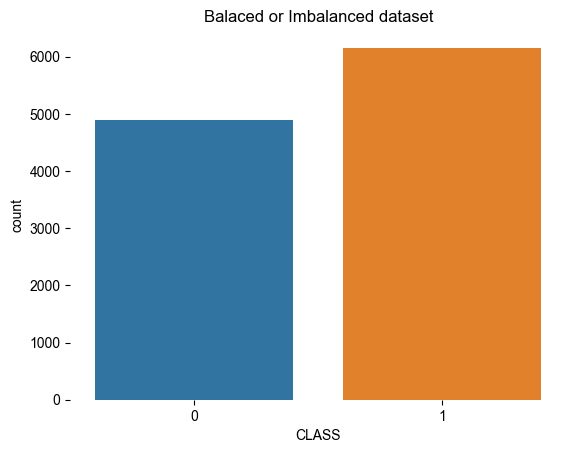

In [15]:
import seaborn as sns
from seaborn import objects 
sns.countplot(x=df1["CLASS"]).set(title='Balaced or Imbalanced dataset')
sns.despine(left=True, right=True, bottom=True, top=True)
sns.set_style('white')

from IPython.display import Markdown
#plt.savefig('CountPlot.png',dpi=300, bbox_inches='tight')


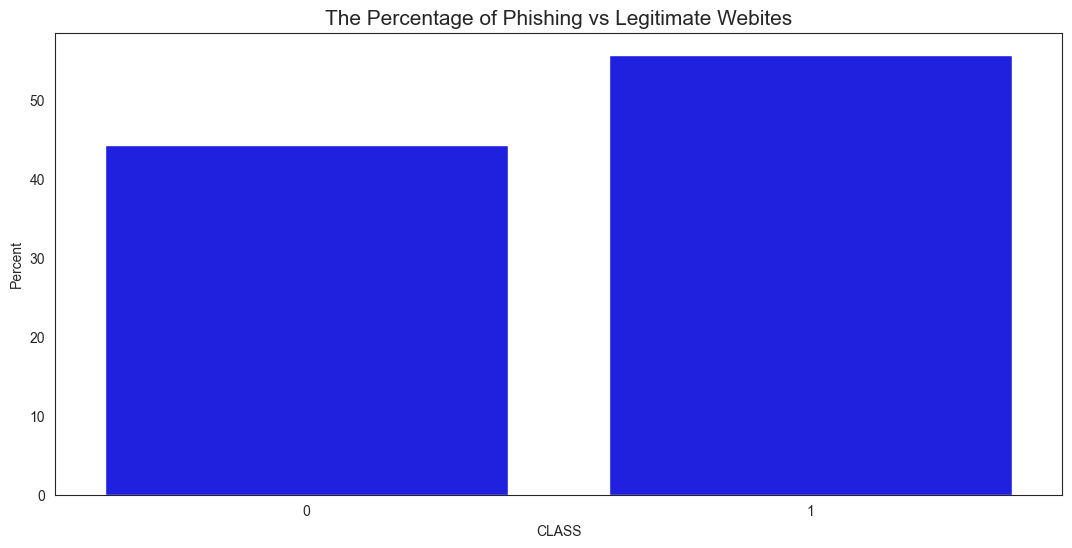

In [16]:
###Check if data is blanced (Legit vs Phising)
plt.figure(figsize=(13, 6))
ax = sns.barplot(x="CLASS", y="CLASS", data=df1, estimator=lambda x: len(x) / len(df1) * 100, color = 'Blue')
ax.set(ylabel="Percent");
ax.set_title('The Percentage of Phishing vs Legitimate Webites', size = 15);
plt.savefig('resultpercentageplot.png', dpi=300, bbox_inches='tight');
#plt.savefig('PerntageOfPhish_Legit.png',dpi=300, bbox_inches='tight')


The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values as you can see the percentages above 


> #### A heatmap is a graphical representation of data that uses colors to represent values in a two-dimensional matrix. Heatmaps are often used to visualize patterns in data, such as the distribution of values across different categories or time periods.

> In a heat map, each cell of the matrix is assigned a color based on its value, with brighter or darker colors indicating higher or lower values, respectively.

> A correlation heatmap is a visual representation of the correlation matrix, which shows the pairwise correlation coefficients between variables. The correlation coefficient is a statistical measure that indicates the strength and direction of the linear relationship between two variables.

 > A correlation heatmap is a useful tool for exploring the relationships between variables 
    and identifying patterns in the data.
 > It can also help in identifying which variables are most strongly
    related to each other, 
    which can be useful in feature selection or dimensionality reduction.

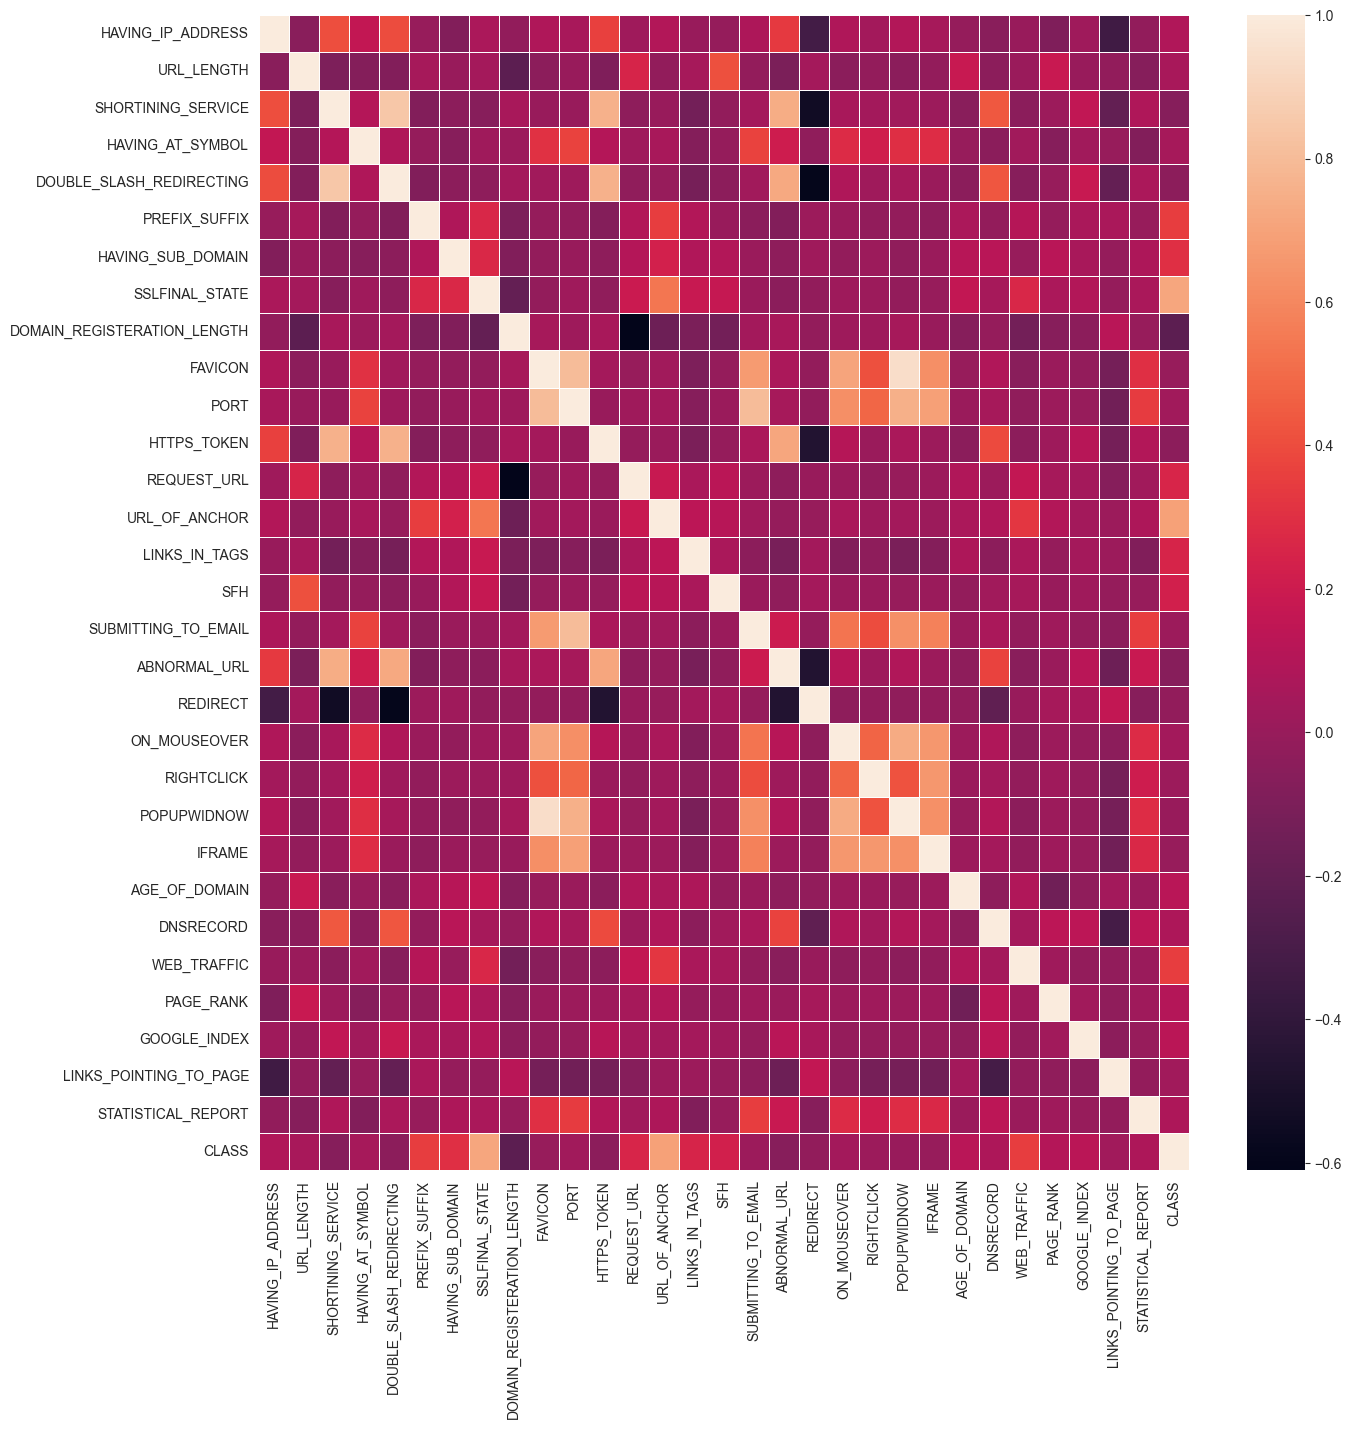

In [17]:
### Heapmap including all the 30 features
plt.figure(figsize=(15, 15))
sns.heatmap(df1.corr(), linewidths=.5)
plt.savefig('HEATMAP.png',dpi=300, bbox_inches='tight')

Note that feature `popUpWindow` and `favicon` are highly correlated. Looking at the definitions of these features from the Data description, we can say that, for websites where favicon is loaded from external links the pop-up window mostly contains text field. This is said just by seeing the high correlation. Dropping one of the features or not is an experimental decision.

Note that some features are negatively correlated but the color index minimum correlation is upto -0.6. Negative correlations are where one feature marks it as phishing and other don't.

> ### Pie Chart Showing the percentage of Phishing websites and Legitimate websites.
> Phishing- 0
> Legitimate - 1

> ###### A pie chart is a circular graphical representation of data, divided into slices to illustrate numerical proportions. Each slice represents a category or a portion of the whole, and its size is proportional to the value it represents. The entire circle represents 100% of the data, and the slices are usually color-coded to make them easier to distinguish. Pie charts are commonly used to show percentages or proportions in a simple and easy-to-understand way, making them useful for presenting data to a wide audience.

> THhis PieChart is showing the 

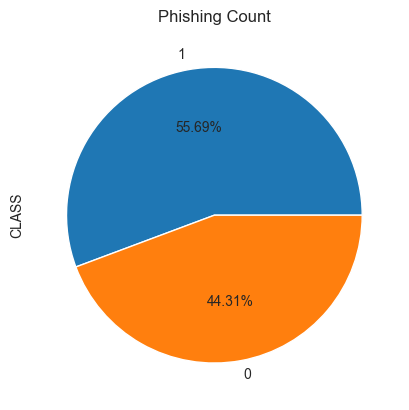

<Figure size 640x480 with 0 Axes>

In [18]:
##Here the pie chart is showing the portion of each category

df1['CLASS'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()
plt.savefig('PieChart.png',dpi=300, bbox_inches='tight')

#### Diving df1 dataframe into independent features(X)  and dependent or target feature(y) named (CLASS)

In [19]:
### Divivding the whole dataset into dependent and independent variables
X1= df1.drop(columns='CLASS')                    ###Dependent variable
y1=df1['CLASS']                                  ###Independent variable




In [20]:
X1 ,y1

(       HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
 0                     -1           1                   1                 1   
 1                      1           1                   1                 1   
 2                      1           0                   1                 1   
 3                      1           0                   1                 1   
 4                      1           0                  -1                 1   
 ...                  ...         ...                 ...               ...   
 11050                  1          -1                   1                -1   
 11051                 -1           1                   1                -1   
 11052                  1          -1                   1                 1   
 11053                 -1          -1                   1                 1   
 11054                 -1          -1                   1                 1   
 
        DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  H

# MODELLING 💇‍♀️

We will be using a simple tree based classifier and no hyper-parameter tuning to model and test our dataset. Note that we replace -1 with 0 and 0 marks phishing website.

## Train Test Split

#### Splitting whole dataset into training and testing set

In [21]:
train_X1=df1.iloc[0:7738,0:30]
train_X1

HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
0                    -1           1                   1                 1   
1                     1           1                   1                 1   
2                     1           0                   1                 1   
3                     1           0                   1                 1   
4                     1           0                  -1                 1   
...                 ...         ...                 ...               ...   
7733                 -1          -1                   1                 1   
7734                  1          -1                  -1                 1   
7735                 -1          -1                   1                 1   
7736                 -1          -1                   1                 1   
7737                 -1          -1                   1                 1   

      DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  HAVING_SUB_DOMAIN  \
0                           -1             -1                 -1   
1                            1             -1                  0   
2                            1             -1                 -1   
3                            1             -1                 -1   
4                            1             -1                  1   
...                        ...            ...                ...   
7733                         1              1                  1   
7734                        -1              1                  1   
7735                         1              1                 -1   
7736                         1             -1                 -1   
7737                         1             -1                  0   

      SSLFINAL_STATE  DOMAIN_REGISTERATION_LENGTH  FAVICON  ...  RIGHTCLICK  \
0                 -1                           -1        1  ...           1   
1                  1                           -1        1  ...           1   
2                 -1                           -1        1  ...           1   
3                 -1                            1        1  ...           1   
4                  1                           -1        1  ...           1   
...              ...                          ...      ...  ...         ...   
7733              -1                           -1        1  ...           1   
7734               1                            1        1  ...           1   
7735               1                           -1        1  ...           1   
7736               1                           -1        1  ...           1   
7737               1                            1        1  ...           1   

      POPUPWIDNOW  IFRAME  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  \
0               1       1             -1         -1           -1         -1   
1               1       1             -1         -1            0         -1   
2               1       1              1         -1            1         -1   
3               1       1             -1         -1            1         -1   
4              -1       1             -1         -1            0         -1   
...           ...     ...            ...        ...          ...        ...   
7733            1       1             -1          1           -1          1   
7734            1       1             -1         -1            1          1   
7735            1       1             -1          1            1         -1   
7736            1       1             -1          1            1         -1   
7737            1       1             -1          1            0          1   

      GOOGLE_INDEX  LINKS_POINTING_TO_PAGE  STATISTICAL_REPORT  
0                1                       1                  -1  
1                1                       1                   1  
2                1                       0                  -1  
3                1                      -1                   1  
4                1                       

In [22]:
test_X1=df1.iloc[7738:,0:30]
test_X1

HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
7738                  -1          -1                   1                 1   
7739                  -1          -1                   1                -1   
7740                  -1          -1                   1                -1   
7741                  -1          -1                   1                 1   
7742                   1          -1                   1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  HAVING_SUB_DOMAIN  \
7738                          1             -1                  0   
7739                          1             -1                  0   
7740                          1             -1                  1   
7741                          1             -1                  1   
7742                          1             -1                  0   
...                         ...            ...                ...   
11050                         1              1                  1   
11051                        -1             -1                  1   
11052                         1             -1                  1   
11053                         1             -1                 -1   
11054                         1             -1                 -1   

       SSLFINAL_STATE  DOMAIN_REGISTERATION_LENGTH  FAVICON  ...  RIGHTCLICK  \
7738               -1                            1       -1  ...           1   
7739               -1                            1       -1  ...          -1   
7740                1                           -1       -1  ...           1   
7741                0                           -1        1  ...           1   
7742               -1                           -1        1  ...           1   
...               ...                          ...      ...  ...         ...   
11050               1                           -1       -1  ...          -1   
11051              -1                           -1       -1  ...           1   
11052              -1                           -1        1  ...           1   
11053              -1                            1       -1  ...           1   
11054              -1                            1        1  ...           1   

       POPUPWIDNOW  IFRAME  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  \
7738            -1       1             -1          1           -1          1   
7739            -1      -1             -1          1           -1          1   
7740            -1      -1             -1          1            1          1   
7741             1       1             -1          1           -1         -1   
7742             1       1             -1          1            1          1   
...            ...     ...            ...        ...          ...        ...   
11050           -1      -1              1          1           -1         -1   
11051           -1       1              1          1            1          1   
11052            1       1              1          1            1         -1   
11053           -1       1              1          1            1         -1   
11054            1       1             -1          1           -1         -1   

       GOOGLE_INDEX  LINKS_POINTING_TO_PAGE  STATISTICAL_REPORT  
7738              1                       1                   1  
7739              1                       0                   1  
7740              1                       1                   1  
7741              1                       1            

In [23]:
train_y1=df1.iloc[0:7738,30]
train_y1

0       0
1       0
2       0
3       0
4       1
       ..
7733    1
7734    1
7735    1
7736    1
7737    0
Name: CLASS, Length: 7738, dtype: int64

In [24]:
test_y1=df1.iloc[7738:,30]
test_y1

7738     0
7739     0
7740     1
7741     0
7742     0
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: CLASS, Length: 3317, dtype: int64

In [25]:
print("Training set has {} samples.".format(train_X1.shape[0]))
print("Testing set has {} samples.".format(test_X1.shape[0]))
print('Printing shape of train_X,train_y,test_X,test_y')
train_X1.shape,train_y1.shape,test_X1.shape,test_y1.shape

Training set has 7738 samples.
Testing set has 3317 samples.
Printing shape of train_X,train_y,test_X,test_y


((7738, 30), (7738,), (3317, 30), (3317,))

In [26]:
#to store model  performance for the original dataset with all features

ml_model_Train = []
accuracy_Train = []
f1_score_Train = []
recall_Train = []
precision_Train = []
#function to call for storing the results

def storeResults_Train(model,a,b,c,d):
    ml_model_Train.append(model)
    accuracy_Train.append(round(a, 3))
    f1_score_Train.append(round(b, 3))
    recall_Train.append(round(c, 3))
    precision_Train.append(round(d, 3))






In [27]:
ml_model_Test = []
accuracy_Test = []
f1_score_Test = []
recall_Test = []
precision_Test = []




def storeResults_Test(model,a,b,c,d):
    ml_model_Test.append(model)
    accuracy_Test.append(round(a, 3))
    f1_score_Test.append(round(b, 3))
    recall_Test.append(round(c, 3))
    precision_Test.append(round(d, 3))


### Modelling the dataset using all the factor features

## Model_1 Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [30]:
clf = DecisionTreeClassifier()
clf.fit(train_X1, train_y1)

DecisionTreeClassifier()

In [31]:
# plt.figure(figsize=(50,50))
# plot_tree(clf, filled=True)
# plt.show()

In [32]:
plt.savefig('decision_tree.png')

<Figure size 640x480 with 0 Axes>

In [33]:
root_feature_idx = clf.tree_.feature[0]
root_threshold = clf.tree_.threshold[0]

# Print the root node information
print("Root node:")
print("Feature index:", root_feature_idx)
print("Threshold:", root_threshold)

Root node:
Feature index: 7
Threshold: 0.5


In [34]:
# Get the indices of the leaf nodes
leaf_indices = clf.tree_.children_left == -1

# Get the class probabilities and sample counts for each leaf node
leaf_probs = clf.tree_.value[leaf_indices].squeeze()
leaf_counts = clf.tree_.n_node_samples[leaf_indices]

# Print the class probabilities and sample counts for each leaf node
print("Leaf nodes:")
for i, (probs, count) in enumerate(zip(leaf_probs, leaf_counts)):
    print(f"Leaf {i}: Class probabilities: {probs}, Sample count: {count}")

Leaf nodes:
Leaf 0: Class probabilities: [2117.    0.], Sample count: 2117
Leaf 1: Class probabilities: [24.  0.], Sample count: 24
Leaf 2: Class probabilities: [0. 4.], Sample count: 4
Leaf 3: Class probabilities: [4. 0.], Sample count: 4
Leaf 4: Class probabilities: [0. 6.], Sample count: 6
Leaf 5: Class probabilities: [236.   0.], Sample count: 236
Leaf 6: Class probabilities: [22.  0.], Sample count: 22
Leaf 7: Class probabilities: [9. 0.], Sample count: 9
Leaf 8: Class probabilities: [2. 0.], Sample count: 2
Leaf 9: Class probabilities: [0. 5.], Sample count: 5
Leaf 10: Class probabilities: [6. 0.], Sample count: 6
Leaf 11: Class probabilities: [32.  0.], Sample count: 32
Leaf 12: Class probabilities: [0. 1.], Sample count: 1
Leaf 13: Class probabilities: [1. 0.], Sample count: 1
Leaf 14: Class probabilities: [60.  0.], Sample count: 60
Leaf 15: Class probabilities: [54.  0.], Sample count: 54
Leaf 16: Class probabilities: [8. 0.], Sample count: 8
Leaf 17: Class probabilities: [5.

In [35]:
X1 ,y1

(       HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
 0                     -1           1                   1                 1   
 1                      1           1                   1                 1   
 2                      1           0                   1                 1   
 3                      1           0                   1                 1   
 4                      1           0                  -1                 1   
 ...                  ...         ...                 ...               ...   
 11050                  1          -1                   1                -1   
 11051                 -1           1                   1                -1   
 11052                  1          -1                   1                 1   
 11053                 -1          -1                   1                 1   
 11054                 -1          -1                   1                 1   
 
        DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  H

In [36]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=30)
tree.fit(X1, y1)

#predicting the target value from the model for the samples

y_train_tree = tree.predict(train_X1)
y_test_tree = tree.predict(test_X1)



Decision Tree : Accuracy on training Data: 0.989
Decision Tree : Accuracy on test Data: 0.991

Decision Tree : f1_score on training Data: 0.990
Decision Tree : f1_score on test Data: 0.992

Decision Tree : Recall on training Data: 0.990
Decision Tree : Recall on test Data: 0.990

Decision Tree : precision on training Data: 0.990
Decision Tree : precision on test Data: 0.994
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1464
           1       0.99      0.99      0.99      1853

    accuracy                           0.99      3317
   macro avg       0.99      0.99      0.99      3317
weighted avg       0.99      0.99      0.99      3317



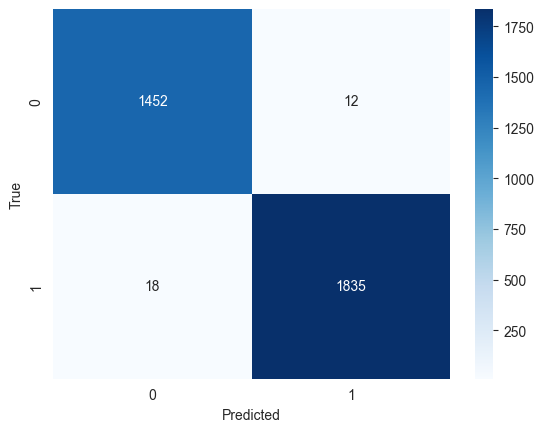

In [37]:
acc_train_tree = metrics.accuracy_score(train_y1,y_train_tree)
acc_test_tree = metrics.accuracy_score(test_y1,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()
f1_score_train_tree = metrics.f1_score(train_y1,y_train_tree)
f1_score_test_tree = metrics.f1_score(test_y1,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(train_y1,y_train_tree)
recall_score_test_tree = metrics.recall_score(test_y1,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()
precision_score_train_tree = metrics.precision_score(train_y1,y_train_tree)
precision_score_test_tree = metrics.precision_score(test_y1,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

print(metrics.classification_report(test_y1, y_test_tree))

# Create confusion matrix
cm = confusion_matrix(test_y1, y_test_tree)
# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



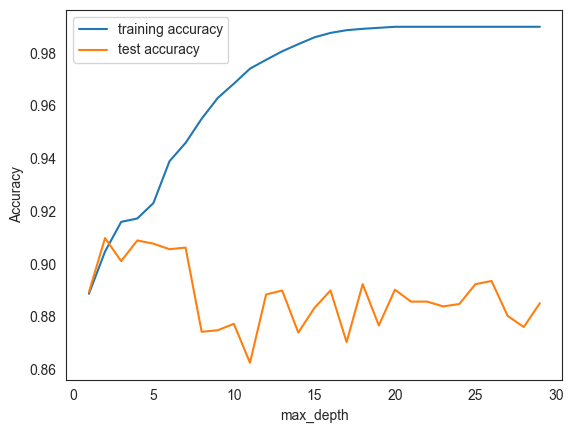

In [38]:
training_accuracy = []
test_accuracy = []

depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(train_X1, train_y1)
    # record training set accuracy
    training_accuracy.append(tree_test.score(train_X1, train_y1))
    # record generalization accuracy
    
    
    test_accuracy.append(tree_test.score(test_X1, test_y1))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();
storeResults_Train('Decision Tree',acc_train_tree,f1_score_train_tree,
             recall_score_train_tree,precision_score_train_tree)

storeResults_Test('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_test_tree,precision_score_test_tree)


## Model_2 Random Forest : Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(train_X1,train_y1)
y_train_forest = forest.predict(train_X1)
y_test_forest = forest.predict(test_X1) 

Random Forest : Accuracy on training Data: 0.990
Random Forest : Accuracy on test Data: 0.917

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.927

Random Forest : Recall on training Data: 0.993
Random Forest : Recall on test Data: 0.938

Random Forest : precision on training Data: 0.989
Random Forest : precision on test Data: 0.994
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1464
           1       0.92      0.94      0.93      1853

    accuracy                           0.92      3317
   macro avg       0.92      0.91      0.92      3317
weighted avg       0.92      0.92      0.92      3317



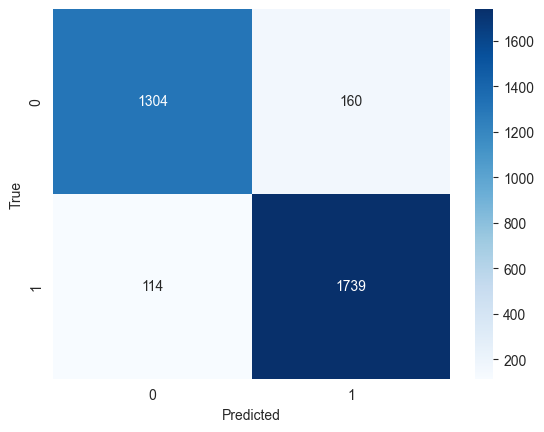

In [40]:
acc_train_forest = metrics.accuracy_score(train_y1,y_train_forest)
acc_test_forest = metrics.accuracy_score(test_y1,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(train_y1,y_train_forest)
f1_score_test_forest = metrics.f1_score(test_y1,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()
recall_score_train_forest = metrics.recall_score(train_y1,y_train_forest)
recall_score_test_forest = metrics.recall_score(test_y1,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(train_y1,y_train_forest)
precision_score_test_forest = metrics.precision_score(test_y1,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

print(metrics.classification_report(test_y1, y_test_forest))
# Create confusion matrix
cm = confusion_matrix(test_y1, y_test_forest)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


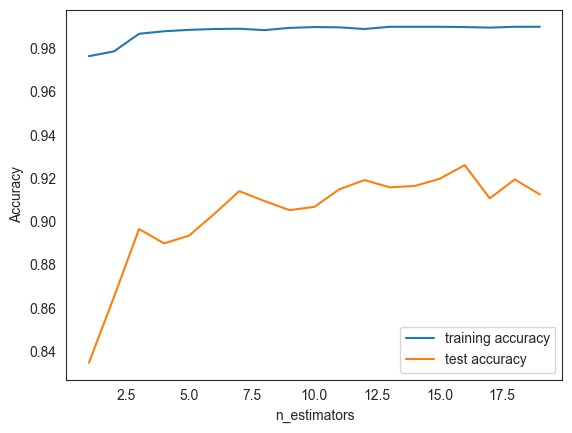

In [41]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(train_X1, train_y1)
    # record training set accuracy
    training_accuracy.append(forest_test.score(train_X1, train_y1))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(test_X1, test_y1))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

storeResults_Train('Random Forest',acc_train_forest,f1_score_train_forest,
             recall_score_train_forest,precision_score_train_forest)
storeResults_Test('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_test_forest,precision_score_test_forest)

## Model_3 Gradient Boost Classifier

In [42]:
#  Gradient Boost Classifier Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(train_X1,train_y1)
y_train_gbc = gbc.predict(train_X1)
y_test_gbc = gbc.predict(test_X1)

Gradient Boost: Accuracy on training Data: 0.990
Gradient Boost: Accuracy on test Data: 0.904

Gradient Boost : f1_score on training Data: 0.991
Gradient Boost : f1_score on test Data: 0.915

Gradient Boost : Recall on training Data: 0.995
Gradient Boost : Recall on test Data: 0.995

Gradient Boost : precision on training Data: 0.986
Gradient Boost : precision on test Data: 0.986
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1464
           1       0.90      0.93      0.92      1853

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



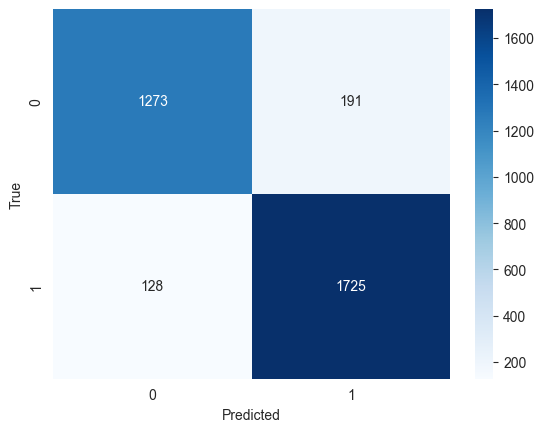

In [43]:
acc_train_gbc = metrics.accuracy_score(train_y1,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(test_y1,y_test_gbc)
print("Gradient Boost: Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boost: Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(train_y1,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(test_y1,y_test_gbc)
print("Gradient Boost : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boost : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(train_y1,y_train_gbc)
recall_score_test_gbc = metrics.recall_score(test_y1,y_test_gbc)
print("Gradient Boost : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boost : Recall on test Data: {:.3f}".format(recall_score_train_gbc))
print()

precision_score_train_gbc = metrics.precision_score(train_y1,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(test_y1,y_test_gbc)
print("Gradient Boost : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boost : precision on test Data: {:.3f}".format(precision_score_train_gbc))

print(metrics.classification_report(test_y1, y_test_gbc))
# Create confusion matrix
cm = confusion_matrix(test_y1, y_test_gbc)
# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

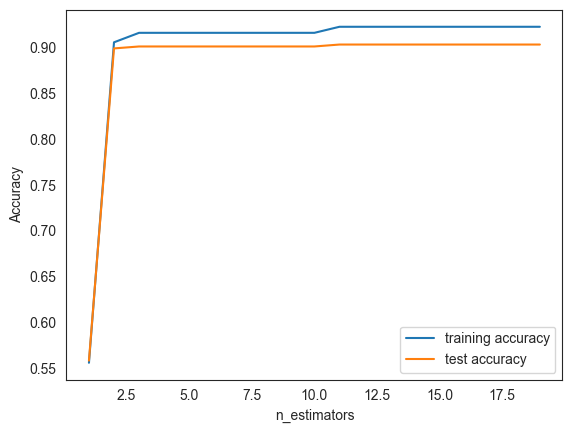

In [44]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    GB_test =  GradientBoostingClassifier(n_estimators=n)

    GB_test.fit(train_X1, train_y1)
    # record training set accuracy
    training_accuracy.append(GB_test.score(train_X1, train_y1))
    # record generalization accuracy
    test_accuracy.append(GB_test.score(test_X1, test_y1))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();


storeResults_Train('Gradient Boost ',acc_train_gbc,f1_score_train_gbc,
             recall_score_train_gbc,precision_score_train_gbc)
storeResults_Test('Gradient Boost ',acc_test_gbc,f1_score_test_gbc,
             recall_score_test_gbc,precision_score_test_gbc)

### Model_4  Extreme Gradient Boosting Classifier

In [45]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Extreme Gradient Boost: Accuracy on training Data: 0.986
Extreme Gradient Boost: Accuracy on test Data: 0.970

Extreme Gradient Boost : f1_score on training Data: 0.987
Extreme Gradient Boost : f1_score on test Data: 0.974

Extreme Gradient Boost : Recall on training Data: 0.991
Extreme Gradient Boost : Recall on test Data: 0.991

Extreme Gradient Boost : precision on training Data: 0.983
Extreme Gradient Boost : precision on test Data: 0.983
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1460
           1       0.97      0.98      0.97      1857

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



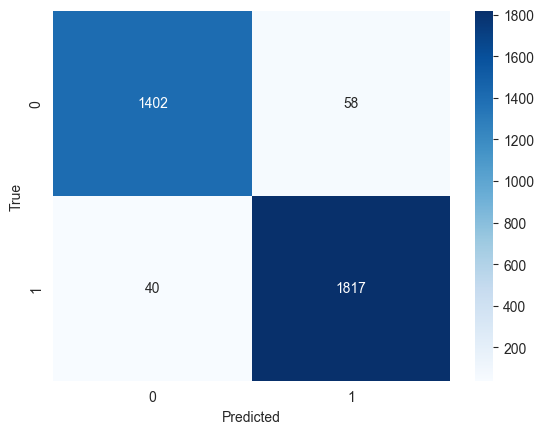

In [46]:
# split data into train and test sets
seed = 2
test_size = 0.3
train_X1, test_X1, train_y1, test_y1 = train_test_split(X1, y1, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(train_X1, train_y1)
# make predictions for test data
y_train_xgbc=model.predict(train_X1)
y_test_xgbc = model.predict(test_X1)






acc_train_xgbc = metrics.accuracy_score(train_y1,y_train_xgbc)
acc_test_xgbc = metrics.accuracy_score(test_y1,y_test_xgbc)
print("Extreme Gradient Boost: Accuracy on training Data: {:.3f}".format(acc_train_xgbc))
print("Extreme Gradient Boost: Accuracy on test Data: {:.3f}".format(acc_test_xgbc))
print()
f1_score_train_xgbc = metrics.f1_score(train_y1,y_train_xgbc)
f1_score_test_xgbc = metrics.f1_score(test_y1,y_test_xgbc)
print("Extreme Gradient Boost : f1_score on training Data: {:.3f}".format(f1_score_train_xgbc))
print("Extreme Gradient Boost : f1_score on test Data: {:.3f}".format(f1_score_test_xgbc))
print()
recall_score_train_xgbc = metrics.recall_score(train_y1,y_train_xgbc)
recall_score_test_xgbc = metrics.recall_score(test_y1,y_test_xgbc)
print("Extreme Gradient Boost : Recall on training Data: {:.3f}".format(recall_score_train_xgbc))
print("Extreme Gradient Boost : Recall on test Data: {:.3f}".format(recall_score_train_xgbc))
print()
precision_score_train_xgbc = metrics.precision_score(train_y1,y_train_xgbc)
precision_score_test_xgbc = metrics.precision_score(test_y1,y_test_xgbc)
print("Extreme Gradient Boost : precision on training Data: {:.3f}".format(precision_score_train_xgbc))
print("Extreme Gradient Boost : precision on test Data: {:.3f}".format(precision_score_train_xgbc))




# Create confusion matrix
cm = confusion_matrix(test_y1, y_test_xgbc)

print(metrics.classification_report(test_y1, y_test_xgbc))
# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


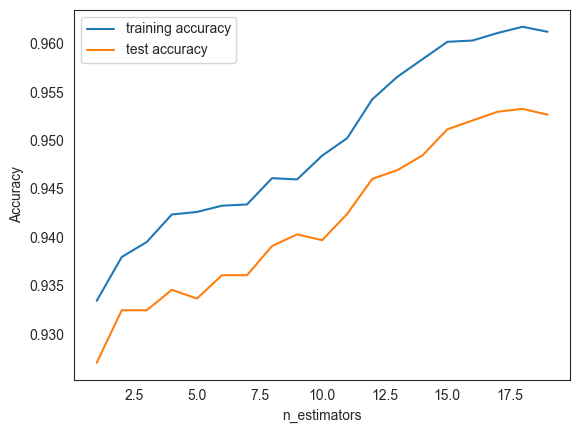

In [47]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    XGB_test =  XGBClassifier(n_estimators=n)

    XGB_test.fit(train_X1, train_y1)
    # record training set accuracy
    training_accuracy.append(XGB_test.score(train_X1, train_y1))
    # record generalization accuracy
    test_accuracy.append(XGB_test.score(test_X1, test_y1))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

storeResults_Train('Extreme Gradient Boost',acc_train_xgbc,f1_score_train_xgbc,
             recall_score_train_xgbc,precision_score_train_xgbc)

# Store the rows for the Model $ Extreme Gradient  Boosting Classifier
storeResults_Test('Extreme Gradient Boost',acc_test_xgbc,f1_score_test_xgbc,
             recall_score_test_xgbc,precision_score_test_xgbc)


In [48]:
#creating dataframe
Result1_Train = pd.DataFrame({ 'ML Model' : ml_model_Train,
                        'Accuracy' : accuracy_Train,
                        'f1_score' : f1_score_Train,
                        'Recall'   : recall_Train,
                        'Precision': precision_Train,
                        })
print('Modelling using all the 30 features on Train Dataset')


#Sorting the datafram on accuracy
S_Result1_Train=Result1_Train.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)
S_Result1_Train
#S_Result1.to_csv('S_Result1.csv')


Modelling using all the 30 features on Train Dataset


ML Model  Accuracy  f1_score  Recall  Precision
0           Random Forest     0.990     0.991   0.993      0.989
1         Gradient Boost      0.990     0.991   0.995      0.986
2           Decision Tree     0.989     0.990   0.990      0.990
3  Extreme Gradient Boost     0.986     0.987   0.991      0.983

In [49]:
#creating dataframe
Result1_Test = pd.DataFrame({ 'ML Model' : ml_model_Test,
                        'Accuracy' : accuracy_Test,
                        'f1_score' : f1_score_Test,
                        'Recall'   : recall_Test,
                        'Precision': precision_Test,
                        })
print('Modelling using all the 30 features on Testing Data')

#Result1.to_csv('Result1.csv')

S_Result1_Test=Result1_Test.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)
S_Result1_Test


Modelling using all the 30 features on Testing Data


ML Model  Accuracy  f1_score  Recall  Precision
0           Decision Tree     0.991     0.992   0.990      0.994
1  Extreme Gradient Boost     0.970     0.974   0.978      0.969
2           Random Forest     0.917     0.927   0.938      0.994
3         Gradient Boost      0.904     0.915   0.931      0.900

> The performance of all the four  models 
> (Gradient Boost , Extreme Gradient Boost , Random Forest , Decision Tree )  


  

 >> ### ML Model             Accuracy 
>	### Gradient Boost-> 	        { 0.973}
>	### Extreme Gradient Boost->   {0.970}
>	### Random Forest ->          { 0.970}
>	### Decision Tree	->        { 0.992}	

 > ### Prediction Using the most optimal Model (having Best Accuracy)

In [50]:
#make prediction using gbc classifier because it has good accuracy

gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

In [51]:
# fit the model 
gbc.fit(train_X1,train_y1)
y_train_gbc_pred = gbc.predict(train_X1)
y_test_gbc_pred = gbc.predict(test_X1)

y_test_gbc_pred , test_y1



(array([1, 0, 0, ..., 1, 1, 1], dtype=int64),
 1629    0
 6775    0
 8207    0
 8499    0
 6476    1
        ..
 4632    0
 1199    0
 179     1
 6530    1
 7096    1
 Name: CLASS, Length: 3317, dtype: int64)

In [52]:
acc_train_gbc_pred = metrics.accuracy_score(train_y1,y_train_gbc_pred)
acc_test_gbc_pred = metrics.accuracy_score(test_y1,y_test_gbc_pred)
print("Gradient Boost: Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boost: Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc_pred = metrics.f1_score(train_y1,y_train_gbc_pred)
f1_score_test_gbc_pred = metrics.f1_score(test_y1,y_test_gbc_pred)
print("Gradient Boost : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boost : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()
recall_score_train_gbc_pred = metrics.recall_score(train_y1,y_train_gbc_pred)
recall_score_test_gbc_pred = metrics.recall_score(test_y1,y_test_gbc_pred)
print("Gradient Boost : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boost : Recall on test Data: {:.3f}".format(recall_score_train_gbc))
print()

precision_score_train_gbc_pred= metrics.precision_score(train_y1,y_train_gbc_pred)
precision_score_test_gbc_pred = metrics.precision_score(test_y1,y_test_gbc_pred)
print("Gradient Boost : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boost : precision on test Data: {:.3f}".format(precision_score_train_gbc))


Gradient Boost: Accuracy on training Data: 0.990
Gradient Boost: Accuracy on test Data: 0.904

Gradient Boost : f1_score on training Data: 0.991
Gradient Boost : f1_score on test Data: 0.915

Gradient Boost : Recall on training Data: 0.995
Gradient Boost : Recall on test Data: 0.995

Gradient Boost : precision on training Data: 0.986
Gradient Boost : precision on test Data: 0.986


Text(0.5, 427.9555555555555, 'Predicted')

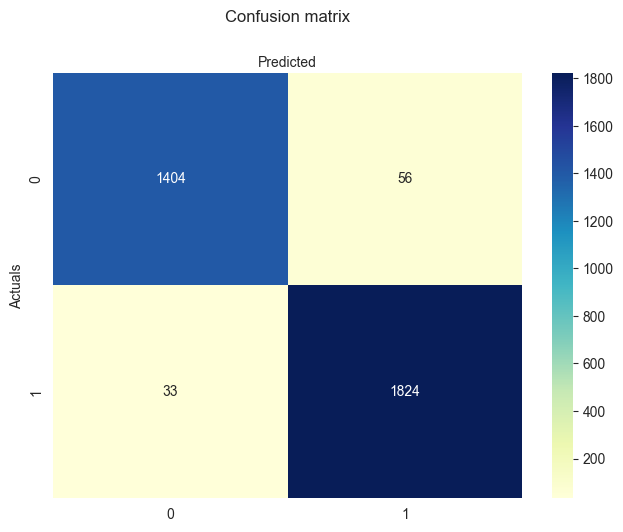

In [53]:
confusion_matrix = metrics.confusion_matrix(test_y1,y_test_gbc_pred)
confusion_matrix

class_names = [0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

# Dimensionality Reduction  and Feature Selection 


   > ### Variance Threshold (Filter Method)

   > ### Correlation with the Target Feature(Filter Method)
   
   > ### Random Forest(Embedded Method) 
   
   > ### Sequential Feature Selection( Wrapper Method)
   
   

# Method 1 -Variance Threshold
#          (Filter method)

>  In this method(Filter Method) we will be using the intrinsic property of the features  depending upon which type of method we are using.Likewise in variance Threshold method we will be using the Variances of each feature. 

.> Steps involved
> We first calculate the variance of each features
> Assume that feature with high variance may contain more info for training a classifier or regressor.


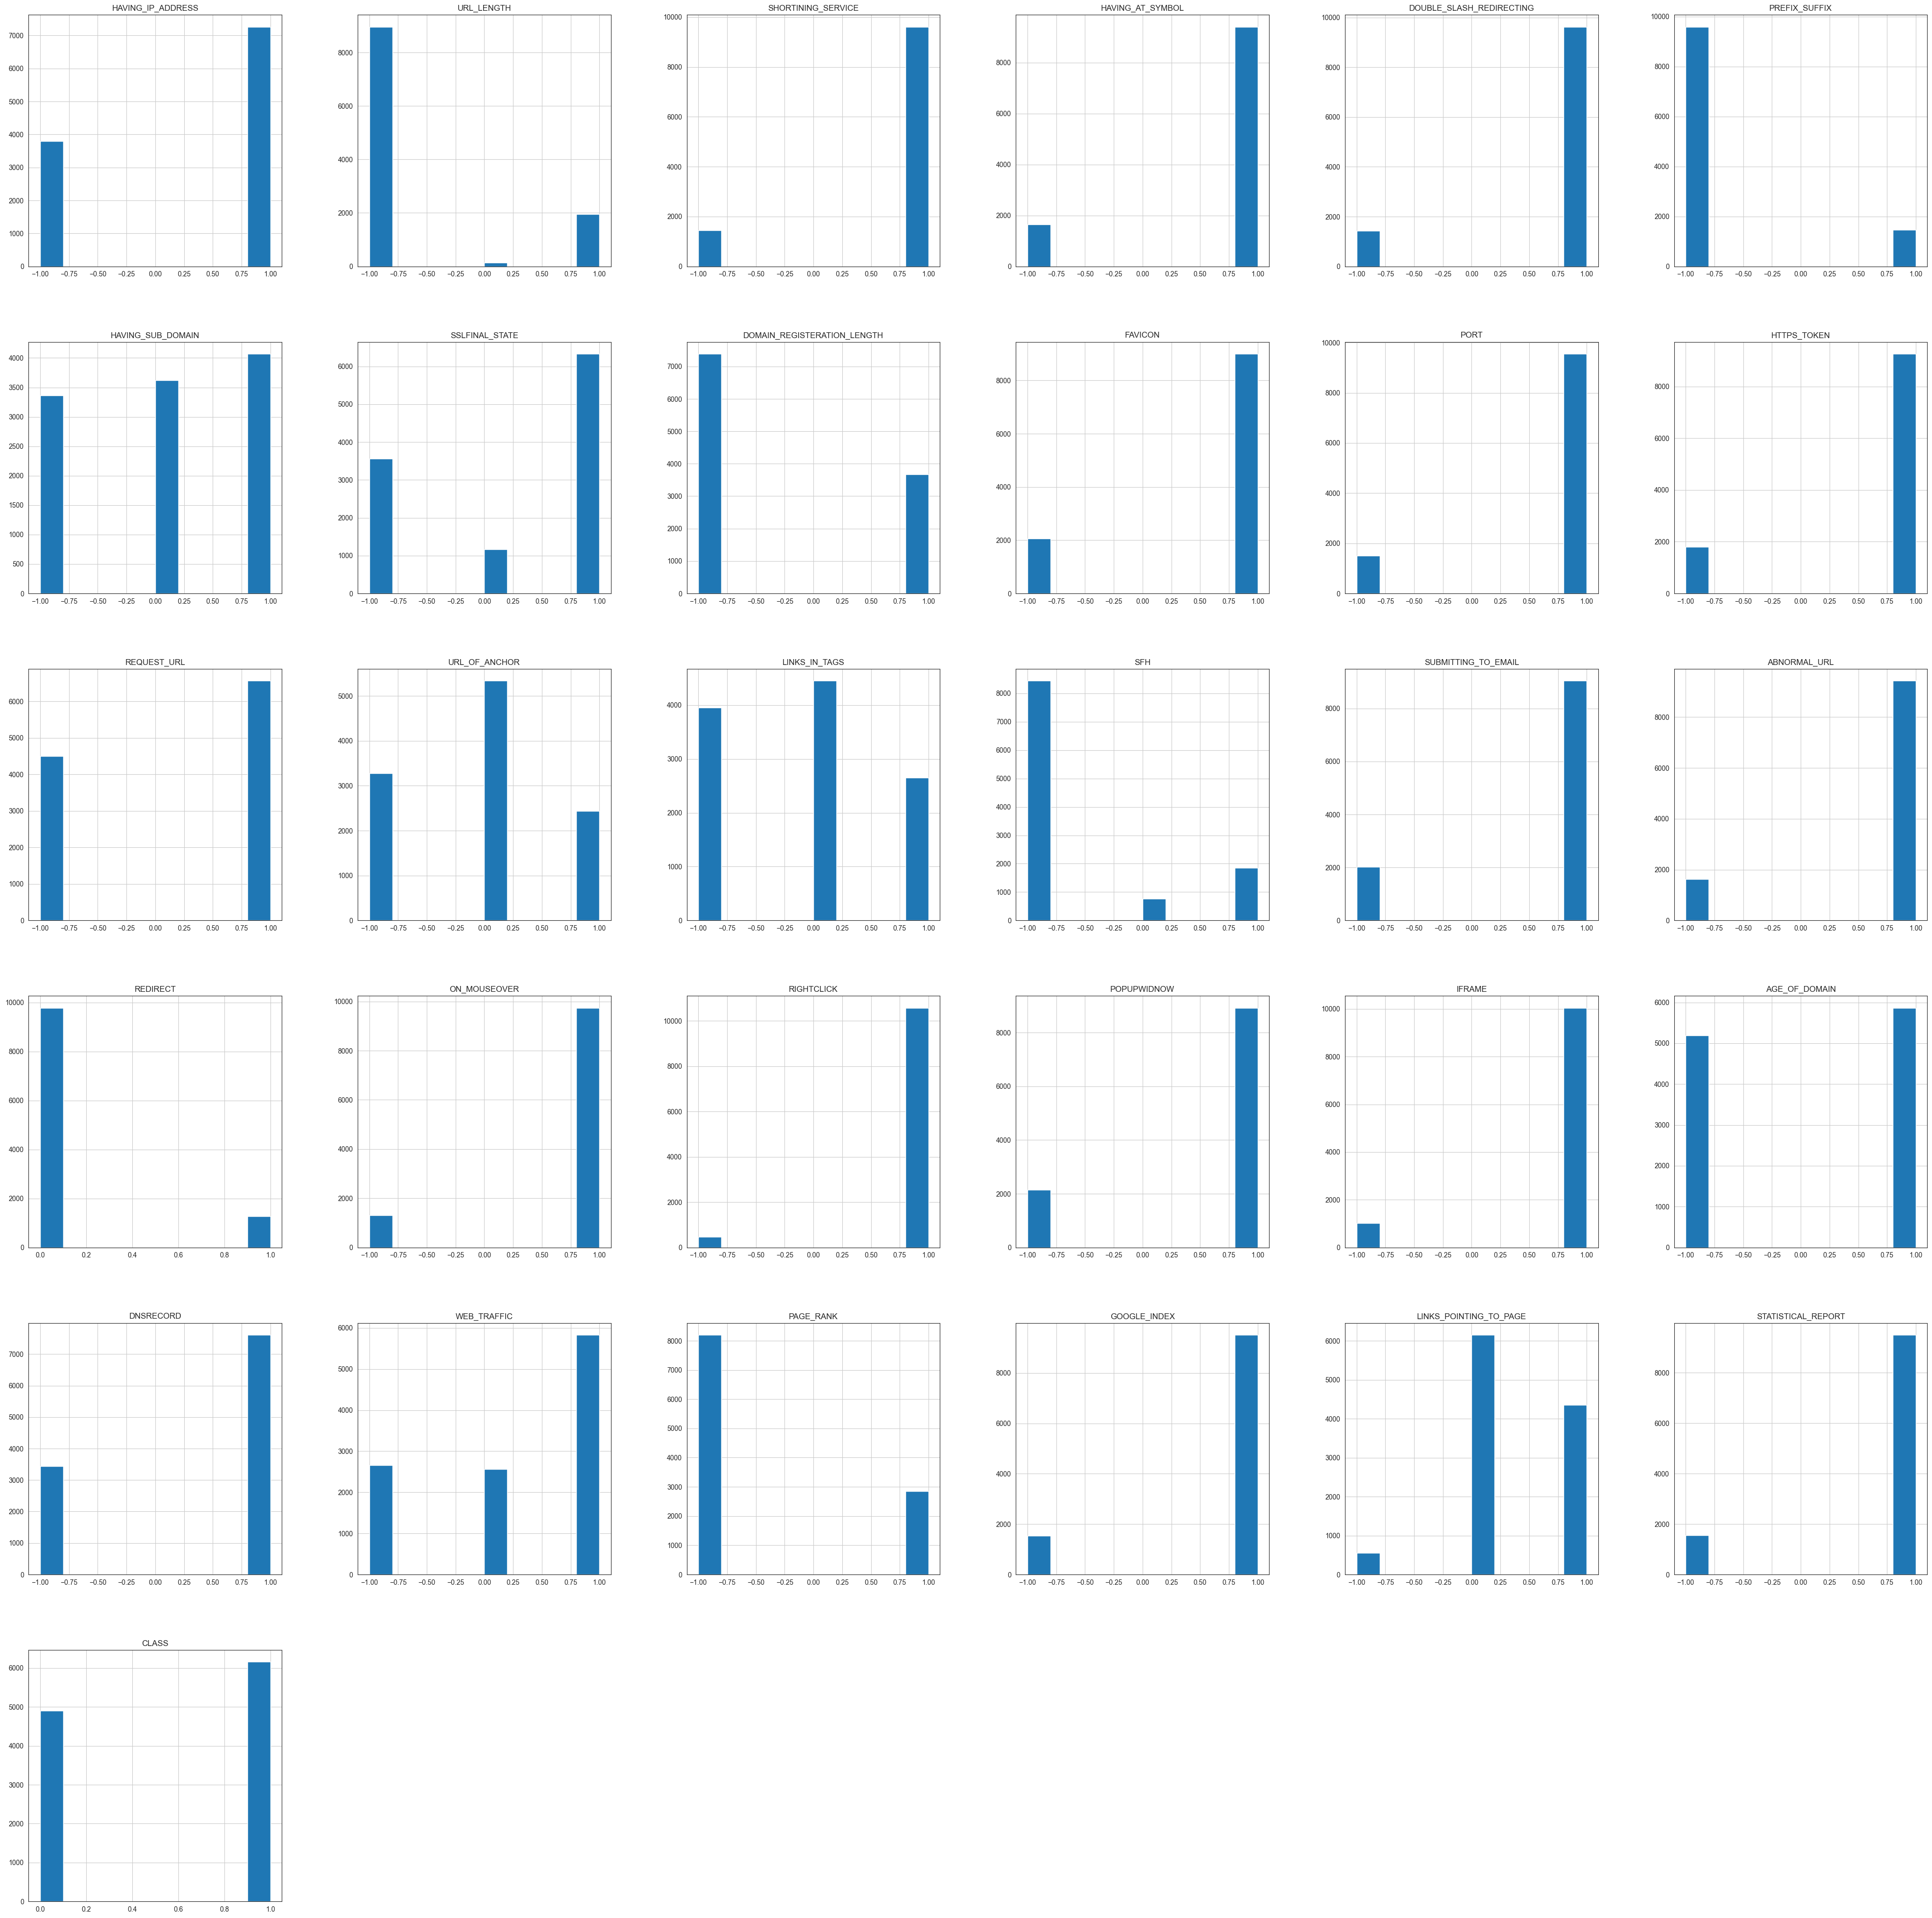

In [54]:
## Feature Distribution doe Each Features
from sklearn.feature_selection import VarianceThreshold
df1.hist(figsize=(50,50),bins = 10)
plt.title("Features Distribution")
plt.show()

In [55]:
df1

HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
0                     -1           1                   1                 1   
1                      1           1                   1                 1   
2                      1           0                   1                 1   
3                      1           0                   1                 1   
4                      1           0                  -1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  HAVING_SUB_DOMAIN  \
0                            -1             -1                 -1   
1                             1             -1                  0   
2                             1             -1                 -1   
3                             1             -1                 -1   
4                             1             -1                  1   
...                         ...            ...                ...   
11050                         1              1                  1   
11051                        -1             -1                  1   
11052                         1             -1                  1   
11053                         1             -1                 -1   
11054                         1             -1                 -1   

       SSLFINAL_STATE  DOMAIN_REGISTERATION_LENGTH  FAVICON  ...  POPUPWIDNOW  \
0                  -1                           -1        1  ...            1   
1                   1                           -1        1  ...            1   
2                  -1                           -1        1  ...            1   
3                  -1                            1        1  ...            1   
4                   1                           -1        1  ...           -1   
...               ...                          ...      ...  ...          ...   
11050               1                           -1       -1  ...           -1   
11051              -1                           -1       -1  ...           -1   
11052              -1                           -1        1  ...            1   
11053              -1                            1       -1  ...           -1   
11054              -1                            1        1  ...            1   

       IFRAME  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  GOOGLE_INDEX  \
0           1             -1         -1           -1         -1             1   
1           1             -1         -1            0         -1             1   
2           1              1         -1            1         -1             1   
3           1             -1         -1            1         -1             1   
4           1             -1         -1            0         -1             1   
...       ...            ...        ...          ...        ...           ...   
11050      -1              1          1           -1         -1             1   
11051       1              1          1            1          1             1   
11052       1              1          1            1         -1             1   
11053       1              1          1            1         -1             1   
11054       1             -1          1           -1         -1            -1   

       LINKS_POINTING_TO_PAGE  STATISTICAL_REPORT  CLASS  
0                           1                  -1      0  
1                           1                   1      0  
2                           0                  -1      0  
3                          -1                   1      0  


In [56]:
X2=df1.drop(columns='CLASS')
X2

HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
0                     -1           1                   1                 1   
1                      1           1                   1                 1   
2                      1           0                   1                 1   
3                      1           0                   1                 1   
4                      1           0                  -1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  HAVING_SUB_DOMAIN  \
0                            -1             -1                 -1   
1                             1             -1                  0   
2                             1             -1                 -1   
3                             1             -1                 -1   
4                             1             -1                  1   
...                         ...            ...                ...   
11050                         1              1                  1   
11051                        -1             -1                  1   
11052                         1             -1                  1   
11053                         1             -1                 -1   
11054                         1             -1                 -1   

       SSLFINAL_STATE  DOMAIN_REGISTERATION_LENGTH  FAVICON  ...  RIGHTCLICK  \
0                  -1                           -1        1  ...           1   
1                   1                           -1        1  ...           1   
2                  -1                           -1        1  ...           1   
3                  -1                            1        1  ...           1   
4                   1                           -1        1  ...           1   
...               ...                          ...      ...  ...         ...   
11050               1                           -1       -1  ...          -1   
11051              -1                           -1       -1  ...           1   
11052              -1                           -1        1  ...           1   
11053              -1                            1       -1  ...           1   
11054              -1                            1        1  ...           1   

       POPUPWIDNOW  IFRAME  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  \
0                1       1             -1         -1           -1         -1   
1                1       1             -1         -1            0         -1   
2                1       1              1         -1            1         -1   
3                1       1             -1         -1            1         -1   
4               -1       1             -1         -1            0         -1   
...            ...     ...            ...        ...          ...        ...   
11050           -1      -1              1          1           -1         -1   
11051           -1       1              1          1            1          1   
11052            1       1              1          1            1         -1   
11053           -1       1              1          1            1         -1   
11054            1       1             -1          1           -1         -1   

       GOOGLE_INDEX  LINKS_POINTING_TO_PAGE  STATISTICAL_REPORT  
0                 1                       1                  -1  
1                 1                       1                   1  
2                 1                       0                  -1  
3                 1                      -1            

In [57]:
y2=df1['CLASS']
y2

0        0
1        0
2        0
3        0
4        1
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: CLASS, Length: 11055, dtype: int64

In [58]:
train_X2=df1.iloc[0:7738,0:30]
train_X2

HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
0                    -1           1                   1                 1   
1                     1           1                   1                 1   
2                     1           0                   1                 1   
3                     1           0                   1                 1   
4                     1           0                  -1                 1   
...                 ...         ...                 ...               ...   
7733                 -1          -1                   1                 1   
7734                  1          -1                  -1                 1   
7735                 -1          -1                   1                 1   
7736                 -1          -1                   1                 1   
7737                 -1          -1                   1                 1   

      DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  HAVING_SUB_DOMAIN  \
0                           -1             -1                 -1   
1                            1             -1                  0   
2                            1             -1                 -1   
3                            1             -1                 -1   
4                            1             -1                  1   
...                        ...            ...                ...   
7733                         1              1                  1   
7734                        -1              1                  1   
7735                         1              1                 -1   
7736                         1             -1                 -1   
7737                         1             -1                  0   

      SSLFINAL_STATE  DOMAIN_REGISTERATION_LENGTH  FAVICON  ...  RIGHTCLICK  \
0                 -1                           -1        1  ...           1   
1                  1                           -1        1  ...           1   
2                 -1                           -1        1  ...           1   
3                 -1                            1        1  ...           1   
4                  1                           -1        1  ...           1   
...              ...                          ...      ...  ...         ...   
7733              -1                           -1        1  ...           1   
7734               1                            1        1  ...           1   
7735               1                           -1        1  ...           1   
7736               1                           -1        1  ...           1   
7737               1                            1        1  ...           1   

      POPUPWIDNOW  IFRAME  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  \
0               1       1             -1         -1           -1         -1   
1               1       1             -1         -1            0         -1   
2               1       1              1         -1            1         -1   
3               1       1             -1         -1            1         -1   
4              -1       1             -1         -1            0         -1   
...           ...     ...            ...        ...          ...        ...   
7733            1       1             -1          1           -1          1   
7734            1       1             -1         -1            1          1   
7735            1       1             -1          1            1         -1   
7736            1       1             -1          1            1         -1   
7737            1       1             -1          1            0          1   

      GOOGLE_INDEX  LINKS_POINTING_TO_PAGE  STATISTICAL_REPORT  
0                1                       1                  -1  
1                1                       1                   1  
2                1                       0                  -1  
3                1                      -1                   1  
4                1                       

In [59]:
test_X2=df1.iloc[7738:,0:30]
test_X2

HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
7738                  -1          -1                   1                 1   
7739                  -1          -1                   1                -1   
7740                  -1          -1                   1                -1   
7741                  -1          -1                   1                 1   
7742                   1          -1                   1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  HAVING_SUB_DOMAIN  \
7738                          1             -1                  0   
7739                          1             -1                  0   
7740                          1             -1                  1   
7741                          1             -1                  1   
7742                          1             -1                  0   
...                         ...            ...                ...   
11050                         1              1                  1   
11051                        -1             -1                  1   
11052                         1             -1                  1   
11053                         1             -1                 -1   
11054                         1             -1                 -1   

       SSLFINAL_STATE  DOMAIN_REGISTERATION_LENGTH  FAVICON  ...  RIGHTCLICK  \
7738               -1                            1       -1  ...           1   
7739               -1                            1       -1  ...          -1   
7740                1                           -1       -1  ...           1   
7741                0                           -1        1  ...           1   
7742               -1                           -1        1  ...           1   
...               ...                          ...      ...  ...         ...   
11050               1                           -1       -1  ...          -1   
11051              -1                           -1       -1  ...           1   
11052              -1                           -1        1  ...           1   
11053              -1                            1       -1  ...           1   
11054              -1                            1        1  ...           1   

       POPUPWIDNOW  IFRAME  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  \
7738            -1       1             -1          1           -1          1   
7739            -1      -1             -1          1           -1          1   
7740            -1      -1             -1          1            1          1   
7741             1       1             -1          1           -1         -1   
7742             1       1             -1          1            1          1   
...            ...     ...            ...        ...          ...        ...   
11050           -1      -1              1          1           -1         -1   
11051           -1       1              1          1            1          1   
11052            1       1              1          1            1         -1   
11053           -1       1              1          1            1         -1   
11054            1       1             -1          1           -1         -1   

       GOOGLE_INDEX  LINKS_POINTING_TO_PAGE  STATISTICAL_REPORT  
7738              1                       1                   1  
7739              1                       0                   1  
7740              1                       1                   1  
7741              1                       1            

In [60]:
train_y2=df1.iloc[0:7738,30]
train_y2

0       0
1       0
2       0
3       0
4       1
       ..
7733    1
7734    1
7735    1
7736    1
7737    0
Name: CLASS, Length: 7738, dtype: int64

In [61]:
test_y2=df1.iloc[7738:,30]
test_y2

7738     0
7739     0
7740     1
7741     0
7742     0
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: CLASS, Length: 3317, dtype: int64

In [62]:
#import libraries and function(modules)
from sklearn.model_selection import cross_val_score
### Import Train and split method from model selection; do 70 & 30 % split up


print("Training set has {} samples.".format(train_X2.shape[0]))
print("Testing set has {} samples.".format(test_X2.shape[0]))
print('Printing shape of train_X2,train_y2,test_X2,test_y2')
train_X2.shape,train_y2.shape,test_X2.shape,test_y2.shape

Training set has 7738 samples.
Testing set has 3317 samples.
Printing shape of train_X2,train_y2,test_X2,test_y2


((7738, 30), (7738,), (3317, 30), (3317,))

In [63]:
###Calculating variances of each attribute 
variances = X1.var()
print(round(variances,3))

HAVING_IP_ADDRESS              0.902
URL_LENGTH                     0.587
SHORTINING_SERVICE             0.454
HAVING_AT_SYMBOL               0.509
DOUBLE_SLASH_REDIRECTING       0.450
PREFIX_SUFFIX                  0.460
HAVING_SUB_DOMAIN              0.668
SSLFINAL_STATE                 0.832
DOMAIN_REGISTERATION_LENGTH    0.887
FAVICON                        0.605
PORT                           0.470
HTTPS_TOKEN                    0.544
REQUEST_URL                    0.965
URL_OF_ANCHOR                  0.511
LINKS_IN_TAGS                  0.584
SFH                            0.576
SUBMITTING_TO_EMAIL            0.596
ABNORMAL_URL                   0.503
REDIRECT                       0.102
ON_MOUSEOVER                   0.419
RIGHTCLICK                     0.165
POPUPWIDNOW                    0.624
IFRAME                         0.333
AGE_OF_DOMAIN                  0.996
DNSRECORD                      0.858
WEB_TRAFFIC                    0.685
PAGE_RANK                      0.766
G

In [64]:
average_variance = variances.mean()

print(np.round(average_variance,2))

0.58


In [65]:
constant_filter = VarianceThreshold(threshold=0.58)
constant_filter.fit(train_X2)

VarianceThreshold(threshold=0.58)

In [66]:

constant_filter.get_support().sum()

13

In [67]:
constant_list = [ not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True]

In [68]:

### attributes we have dropped 
X2.columns[constant_list]






Index(['SHORTINING_SERVICE', 'HAVING_AT_SYMBOL', 'DOUBLE_SLASH_REDIRECTING',
       'PREFIX_SUFFIX', 'PORT', 'HTTPS_TOKEN', 'URL_OF_ANCHOR',
       'LINKS_IN_TAGS', 'SFH', 'ABNORMAL_URL', 'REDIRECT', 'ON_MOUSEOVER',
       'RIGHTCLICK', 'IFRAME', 'GOOGLE_INDEX', 'LINKS_POINTING_TO_PAGE',
       'STATISTICAL_REPORT'],
      dtype='object')

In [69]:

train_X2_filter = constant_filter.transform(train_X2)
test_X2_filter = constant_filter.transform(test_X2)
train_X2_filter.shape, test_X2_filter.shape, train_X2.shape , test_X2.shape 


((7738, 13), (3317, 13), (7738, 30), (3317, 30))

In [70]:
#to store model  performance 

ml_model2_Train = []
accuracy2_Train = []
f1_score2_Train = []
recall2_Train = []
precision2_Train = []
#function to call for storing the results

def storeResults2_Train(model,a,b,c,d):
    ml_model2_Train.append(model)
    accuracy2_Train.append(round(a, 3))
    f1_score2_Train.append(round(b, 3))
    recall2_Train.append(round(c, 3))
    precision2_Train.append(round(d ,3))

In [71]:

ml_model2_Test = []
accuracy2_Test = []
f1_score2_Test = []
recall2_Test = []
precision2_Test = []
#function to call for storing the results

def storeResults2_Test(model,a,b,c,d):
    ml_model2_Test.append(model)
    accuracy2_Test.append(round(a, 3))
    f1_score2_Test.append(round(b, 3))
    recall2_Test.append(round(c, 3))
    precision2_Test.append(round(d ,3))

Decision Tree2 : Accuracy on training Data: 0.954
Decision Tree2 : Accuracy on test Data: 0.781

Decision Tree2 : f1_score on training Data: 0.958
Decision Tree2: f1_score on test Data: 0.815

Decision Tree2 : Recall on training Data: 0.961
Decision Tree2 : Recall on test Data: 0.865

Decision Tree2 : precision on training Data: 0.956
Decision Tree2 : precision on test Data: 0.771
              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1464
           1       0.77      0.87      0.82      1853

    accuracy                           0.78      3317
   macro avg       0.78      0.77      0.77      3317
weighted avg       0.78      0.78      0.78      3317



Text(0.5, 427.9555555555555, 'Predicted')

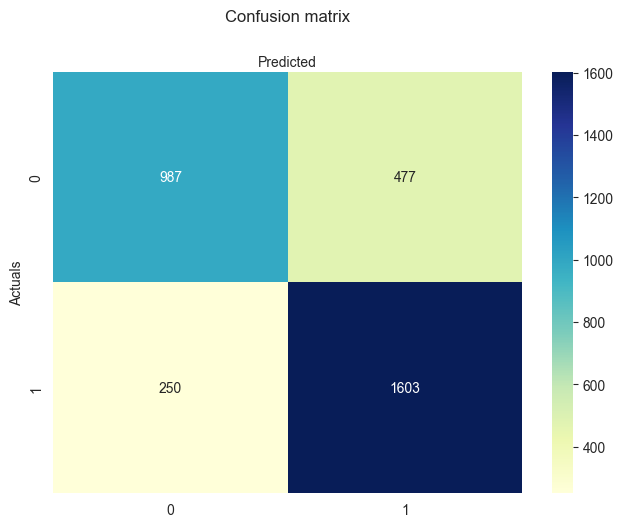

In [72]:
# fit the model 
tree.fit(train_X2_filter, train_y2)
#predicting the target value from the model for the samples

y_train_tree2 = tree.predict(train_X2_filter)
y_test_tree2 = tree.predict(test_X2_filter)
acc_train_tree2 = metrics.accuracy_score(train_y2,y_train_tree2)
acc_test_tree2 = metrics.accuracy_score(test_y2,y_test_tree2)
print("Decision Tree2 : Accuracy on training Data: {:.3f}".format(acc_train_tree2))
print("Decision Tree2 : Accuracy on test Data: {:.3f}".format(acc_test_tree2))
print()
f1_score_train_tree2 = metrics.f1_score(train_y2,y_train_tree2)
f1_score_test_tree2 = metrics.f1_score(test_y2,y_test_tree2)
print("Decision Tree2 : f1_score on training Data: {:.3f}".format(f1_score_train_tree2))
print("Decision Tree2: f1_score on test Data: {:.3f}".format(f1_score_test_tree2))
print()
recall_score_train_tree2 = metrics.recall_score(train_y2,y_train_tree2)
recall_score_test_tree2 = metrics.recall_score(test_y2,y_test_tree2)
print("Decision Tree2 : Recall on training Data: {:.3f}".format(recall_score_train_tree2))
print("Decision Tree2 : Recall on test Data: {:.3f}".format(recall_score_test_tree2))
print()
precision_score_train_tree2 = metrics.precision_score(train_y2,y_train_tree2)
precision_score_test_tree2 = metrics.precision_score(test_y2,y_test_tree2)
print("Decision Tree2 : precision on training Data: {:.3f}".format(precision_score_train_tree2))
print("Decision Tree2 : precision on test Data: {:.3f}".format(precision_score_test_tree2))


print(metrics.classification_report(test_y2, y_test_tree2))

confusion_matrix = metrics.confusion_matrix(test_y2,y_test_tree2)
confusion_matrix

class_names = [0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

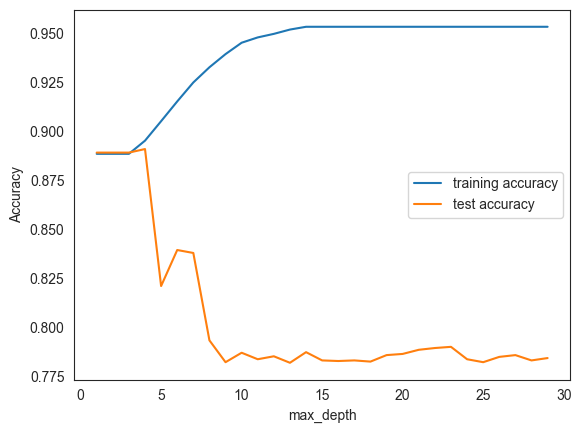

In [73]:
training_accuracy = []
test_accuracy = []

depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(train_X2_filter, train_y2)
    # record training set accuracy
    training_accuracy.append(tree_test.score(train_X2_filter, train_y2))
    # record generalization accuracy
    
    
    test_accuracy.append(tree_test.score(test_X2_filter, test_y2))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()


storeResults2_Train('Decision Tree2',acc_train_tree2,f1_score_train_tree2,
             recall_score_train_tree2,precision_score_train_tree2)
storeResults2_Test('Decision Tree2',acc_test_tree2,f1_score_test_tree2,
             recall_score_test_tree2,precision_score_test_tree2)

# Model_3  Random Forest : Classifier

Random Forest2 : Accuracy on training Data: 0.953
Random Forest2 : Accuracy on test Data: 0.822

Random Forest2 : f1_score on training Data: 0.958
Random Forest2: f1_score on test Data: 0.848

Random Forest2 : Recall on training Data: 0.965
Random Forest2 : Recall on test Data: 0.889

Random Forest2 : precision on training Data: 0.951
Random Forest2 : precision on test Data: 0.771
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1464
           1       0.81      0.89      0.85      1853

    accuracy                           0.82      3317
   macro avg       0.83      0.81      0.82      3317
weighted avg       0.82      0.82      0.82      3317



Text(0.5, 427.9555555555555, 'Predicted')

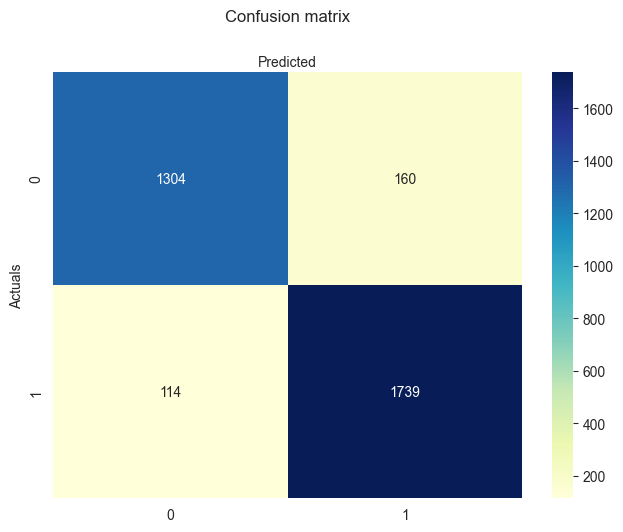

In [74]:


# instantiate the model
forest = RandomForestClassifier(n_estimators=10)
# fit the model 
forest.fit(train_X2_filter,train_y2)
y_train_forest2 = forest.predict(train_X2_filter)
y_test_forest2 = forest.predict(test_X2_filter)

acc_train_forest2 = metrics.accuracy_score(train_y2,y_train_forest2)
acc_test_forest2 = metrics.accuracy_score(test_y2,y_test_forest2)
print("Random Forest2 : Accuracy on training Data: {:.3f}".format(acc_train_forest2))
print("Random Forest2 : Accuracy on test Data: {:.3f}".format(acc_test_forest2))
print()
f1_score_train_forest2 = metrics.f1_score(train_y2,y_train_forest2)
f1_score_test_forest2 = metrics.f1_score(test_y2,y_test_forest2)
print("Random Forest2 : f1_score on training Data: {:.3f}".format(f1_score_train_forest2))
print("Random Forest2: f1_score on test Data: {:.3f}".format(f1_score_test_forest2))
print()
recall_score_train_forest2 = metrics.recall_score(train_y2,y_train_forest2)
recall_score_test_forest2 = metrics.recall_score(test_y2,y_test_forest2)
print("Random Forest2 : Recall on training Data: {:.3f}".format(recall_score_train_forest2))
print("Random Forest2 : Recall on test Data: {:.3f}".format(recall_score_test_forest2))
print()
precision_score_train_forest2 = metrics.precision_score(train_y2,y_train_forest2)
precision_score_test_forest2 = metrics.precision_score(test_y2,y_test_tree2)
print("Random Forest2 : precision on training Data: {:.3f}".format(precision_score_train_forest2))
print("Random Forest2 : precision on test Data: {:.3f}".format(precision_score_test_forest2))
print(metrics.classification_report(test_y2, y_test_forest2))

# Create confusion matrix
confusion_matrix = metrics.confusion_matrix(test_y2,y_test_forest)
confusion_matrix
class_names = [0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')


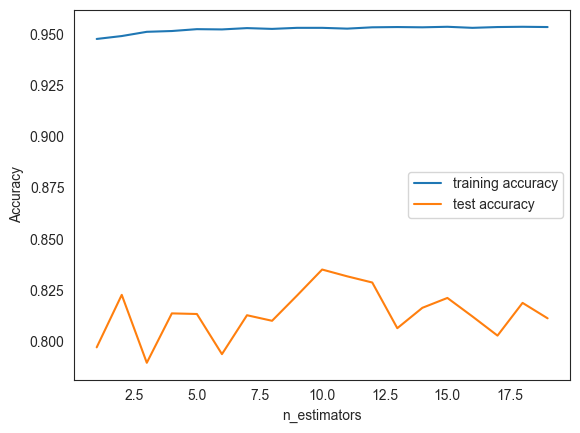

In [75]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(train_X2_filter, train_y2)
    # record training set accuracy
    training_accuracy.append(forest_test.score(train_X2_filter, train_y2))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(test_X2_filter, test_y2))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();
storeResults2_Train('Random Forest2',acc_train_forest2,f1_score_train_forest2,
             recall_score_train_forest2,precision_score_train_forest2)

storeResults2_Test('Random Forest2',acc_test_forest2,f1_score_test_forest2,
             recall_score_test_forest2,precision_score_test_forest2)

# Model_3  Gradient Boost

Gradient Boost2: Accuracy on training Data: 0.951
Gradient Boost2: Accuracy on test Data: 0.802

Gradient Boost2 : f1_score on training Data: 0.956
Gradient Boost2 : f1_score on test Data: 0.835

Gradient Boost2 : Recall on training Data: 0.961
Gradient Boost2 : Recall on test Data: 0.896

Gradient Boost2 : precision on training Data: 0.952
Gradient Boost2 : precision on test Data: 0.782
              precision    recall  f1-score   support

           0       0.84      0.68      0.75      1464
           1       0.78      0.90      0.84      1853

    accuracy                           0.80      3317
   macro avg       0.81      0.79      0.79      3317
weighted avg       0.81      0.80      0.80      3317



Text(0.5, 427.9555555555555, 'Predicted')

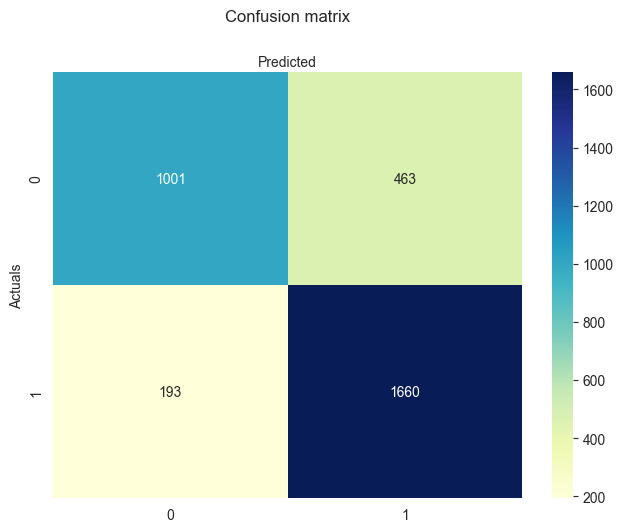

In [76]:
#  Gradient Boost Classifier Model
from sklearn.ensemble import GradientBoostingClassifier
# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
# fit the model 
gbc.fit(train_X2_filter,train_y2)
y_train_gbc2 = gbc.predict(train_X2_filter)
y_test_gbc2 = gbc.predict(test_X2_filter)


acc_train_gbc2 = metrics.accuracy_score(train_y2,y_train_gbc2)
acc_test_gbc2 = metrics.accuracy_score(test_y2,y_test_gbc2)
print("Gradient Boost2: Accuracy on training Data: {:.3f}".format(acc_train_gbc2))
print("Gradient Boost2: Accuracy on test Data: {:.3f}".format(acc_test_gbc2))
print()
f1_score_train_gbc2 = metrics.f1_score(train_y2,y_train_gbc2)
f1_score_test_gbc2 = metrics.f1_score(test_y2,y_test_gbc2)
print("Gradient Boost2 : f1_score on training Data: {:.3f}".format(f1_score_train_gbc2))
print("Gradient Boost2 : f1_score on test Data: {:.3f}".format(f1_score_test_gbc2))
print()
recall_score_train_gbc2 = metrics.recall_score(train_y2,y_train_gbc2)
recall_score_test_gbc2 = metrics.recall_score(test_y2,y_test_gbc2)
print("Gradient Boost2 : Recall on training Data: {:.3f}".format(recall_score_train_gbc2))
print("Gradient Boost2 : Recall on test Data: {:.3f}".format(recall_score_test_gbc2))
print()
precision_score_train_gbc2 = metrics.precision_score(train_y2,y_train_gbc2)
precision_score_test_gbc2 = metrics.precision_score(test_y2,y_test_gbc2)
print("Gradient Boost2 : precision on training Data: {:.3f}".format(precision_score_train_gbc2))
print("Gradient Boost2 : precision on test Data: {:.3f}".format(precision_score_test_gbc2))

print(metrics.classification_report(test_y2, y_test_gbc2))

# Create confusion matrix
confusion_matrix = metrics.confusion_matrix(test_y2,y_test_gbc2)
confusion_matrix

class_names = [0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

Text(0.5, 427.9555555555555, 'Predicted')

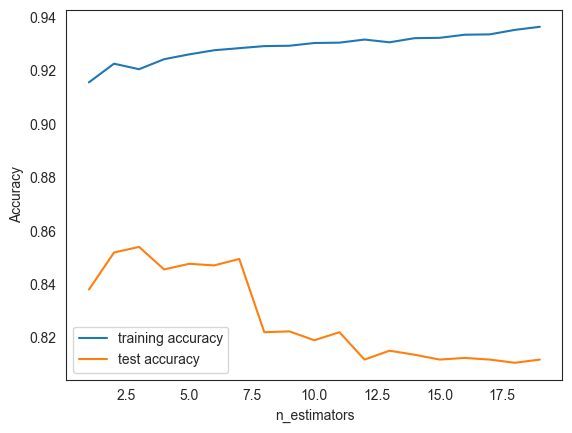

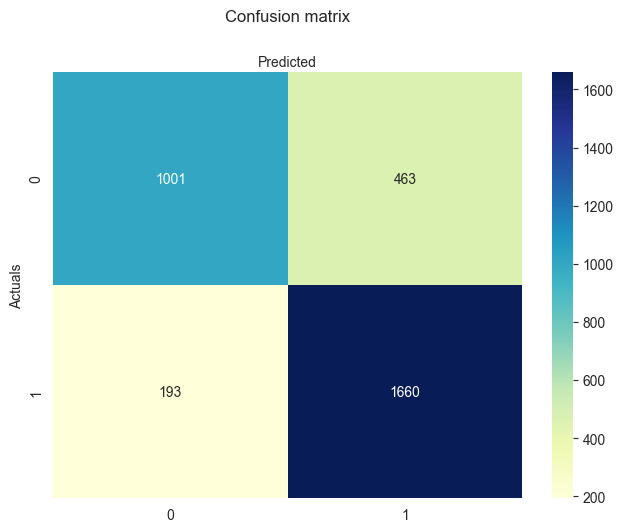

In [77]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    XGB_test =  XGBClassifier(n_estimators=n)

    XGB_test.fit(train_X2_filter, train_y2)
    # record training set accuracy
    training_accuracy.append(XGB_test.score(train_X2_filter, train_y2))
    # record generalization accuracy
    test_accuracy.append(XGB_test.score(test_X2_filter, test_y2))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

storeResults2_Train('Gradient Boost2 ',acc_train_gbc2,f1_score_train_gbc2,
             recall_score_train_gbc2,precision_score_train_gbc2)

storeResults2_Test('Gradient Boost2 ',acc_test_gbc2,f1_score_test_gbc2,
             recall_score_test_gbc2,precision_score_test_gbc2)

# Create confusion matrix
confusion_matrix = metrics.confusion_matrix(test_y2,y_test_gbc2)
confusion_matrix

class_names = [0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

# Model_4  Extreme Gradient Booosting 

Extreme Gradient Boost2: Accuracy on training Data: 0.953
Extreme Gradient Boost2: Accuracy on test Data: 0.810

Extreme Gradient Boost2 : f1_score on training Data: 0.958
Extreme Gradient Boost2: f1_score on test Data: 0.842

Extreme Gradient Boost2 : Recall on training Data: 0.963
Extreme Gradient Boost2 : Recall on test Data: 0.906

Extreme Gradient Boost2: precision on training Data: 0.952
Extreme Gradient Boost2: precision on test Data: 0.786
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1464
           1       0.79      0.91      0.84      1853

    accuracy                           0.81      3317
   macro avg       0.82      0.80      0.80      3317
weighted avg       0.82      0.81      0.81      3317



Text(0.5, 427.9555555555555, 'Predicted')

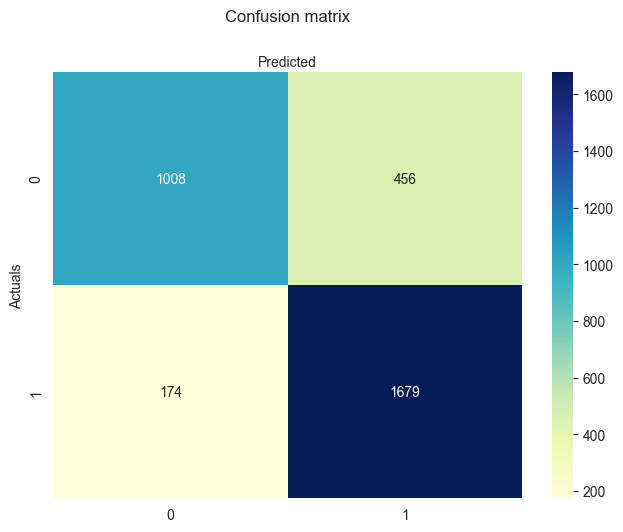

In [78]:
# fit model no training data
model = XGBClassifier()
model.fit(train_X2_filter, train_y2)
# make predictions for test data
y_train_xgbc2=model.predict(train_X2_filter)
y_test_xgbc2 = model.predict(test_X2_filter)

acc_train_xgbc2= metrics.accuracy_score(train_y2,y_train_xgbc2)
acc_test_xgbc2= metrics.accuracy_score(test_y2,y_test_xgbc2)
print("Extreme Gradient Boost2: Accuracy on training Data: {:.3f}".format(acc_train_xgbc2))
print("Extreme Gradient Boost2: Accuracy on test Data: {:.3f}".format(acc_test_xgbc2))
print()
f1_score_train_xgbc2 = metrics.f1_score(train_y2,y_train_xgbc2)
f1_score_test_xgbc2 = metrics.f1_score(test_y2,y_test_xgbc2)
print("Extreme Gradient Boost2 : f1_score on training Data: {:.3f}".format(f1_score_train_xgbc2))
print("Extreme Gradient Boost2: f1_score on test Data: {:.3f}".format(f1_score_test_xgbc2))
print()
recall_score_train_xgbc2 = metrics.recall_score(train_y2,y_train_xgbc2)
recall_score_test_xgbc2 = metrics.recall_score(test_y2,y_test_xgbc2)
print("Extreme Gradient Boost2 : Recall on training Data: {:.3f}".format(recall_score_train_xgbc2))
print("Extreme Gradient Boost2 : Recall on test Data: {:.3f}".format(recall_score_test_xgbc2))
print()
precision_score_train_xgbc2 = metrics.precision_score(train_y2,y_train_xgbc2)
precision_score_test_xgbc2 = metrics.precision_score(test_y2,y_test_xgbc2)
print("Extreme Gradient Boost2: precision on training Data: {:.3f}".format(precision_score_train_xgbc2))
print("Extreme Gradient Boost2: precision on test Data: {:.3f}".format(precision_score_test_xgbc2))

print(metrics.classification_report(test_y2, y_test_xgbc2))

confusion_matrix = metrics.confusion_matrix(test_y2,y_test_xgbc2)
confusion_matrix

class_names = [0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

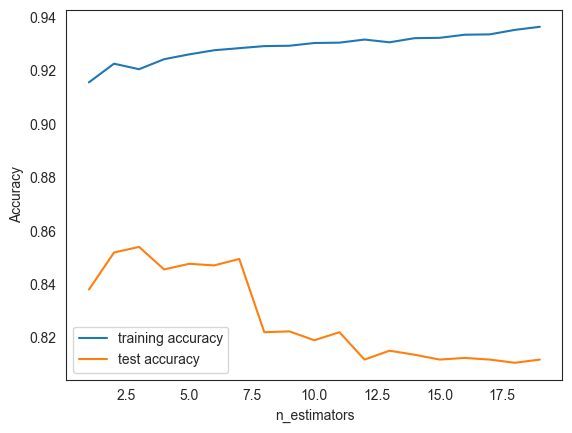

In [79]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    XGB_test =  XGBClassifier(n_estimators=n)

    XGB_test.fit(train_X2_filter, train_y2)
    # record training set accuracy
    training_accuracy.append(XGB_test.score(train_X2_filter, train_y2))
    # record generalization accuracy
    test_accuracy.append(XGB_test.score(test_X2_filter, test_y2))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();


# Store the rows for the Model $ Extreme Gradient  Boosting Classifier
storeResults2_Train('Extreme Gradient Boost2',acc_train_xgbc2,f1_score_train_xgbc2,
             recall_score_train_xgbc2,precision_score_train_xgbc2)

# Store the rows for the Model $ Extreme Gradient  Boosting Classifier
storeResults2_Test('Extreme Gradient Boost2',acc_test_xgbc2,f1_score_test_xgbc2,
             recall_score_test_xgbc2,precision_score_test_xgbc2)


In [80]:
#creating dataframe
Result2_Train = pd.DataFrame({ 'ML Model2_' : ml_model2_Train,
                        'Accuracy2' : accuracy2_Train,
                        'f1_score2' : f1_score2_Train,
                        'Recall2'   : recall2_Train,
                        'Precision2': precision2_Train,
                        })
#Sorting the datafram on accuracy
S_Result2_Train=Result2_Train.sort_values(by=['Accuracy2', 'f1_score2'],ascending=False).reset_index(drop=True)
print(" Variance Threshold Feature Selection on 13 features(Train):")
S_Result2_Train

 Variance Threshold Feature Selection on 13 features(Train):


ML Model2_  Accuracy2  f1_score2  Recall2  Precision2
0           Decision Tree2      0.954      0.958    0.961       0.956
1           Random Forest2      0.953      0.958    0.965       0.951
2  Extreme Gradient Boost2      0.953      0.958    0.963       0.952
3         Gradient Boost2       0.951      0.956    0.961       0.952

In [81]:
#creating dataframe
Result2_Test = pd.DataFrame({ 'ML Model2' : ml_model2_Test,
                        'Accuracy2' : accuracy2_Test,
                        'f1_score2' : f1_score2_Test,
                        'Recall2'   : recall2_Test,
                        'Precision2': precision2_Test,
                        })
#Sorting the datafram on accuracy
S_Result2_Test=Result2_Test.sort_values(by=['Accuracy2', 'f1_score2'],ascending=False).reset_index(drop=True)
print("Variance Threshold Feature Selection on 13 features(Test):")
S_Result2_Test

Variance Threshold Feature Selection on 13 features(Test):


ML Model2  Accuracy2  f1_score2  Recall2  Precision2
0           Random Forest2      0.822      0.848    0.889       0.771
1  Extreme Gradient Boost2      0.810      0.842    0.906       0.786
2         Gradient Boost2       0.802      0.835    0.896       0.782
3           Decision Tree2      0.781      0.815    0.865       0.771

# Method-2   Correlation Analysis(Feature Selection)

> ### Feature Selection Using Correlation Analysis (Filter Method)
> ### Correlation analysis is a statistical term that is used to find an association between all independent attributes and the dependent (target) attribute. In our work, the correlation was applied to datasets. 




> The correlation coefficient is the most common measure used in correlation analysis. It ranges from -1 to +1, with a correlation coefficient of -1 indicating a perfect negative relationship between the two variables, a correlation coefficient of +1 indicating a perfect positive relationship, and a correlation coefficient of 0 indicating no relationship.


> There are two types of correlation analysis: Pearson correlation and Spearman correlation. Pearson correlation is used to measure the strength of a linear relationship between two continuous variables, while Spearman correlation is used to measure the strength of a monotonic relationship between two variables, which may not necessarily be linear.

In [82]:
print(np.round(df1.corr(method='pearson'),2)['CLASS'].sort_values()) 

DOMAIN_REGISTERATION_LENGTH   -0.23
SHORTINING_SERVICE            -0.07
ABNORMAL_URL                  -0.06
DOUBLE_SLASH_REDIRECTING      -0.04
HTTPS_TOKEN                   -0.04
REDIRECT                      -0.02
POPUPWIDNOW                    0.00
FAVICON                       -0.00
IFRAME                        -0.00
RIGHTCLICK                     0.01
SUBMITTING_TO_EMAIL            0.02
LINKS_POINTING_TO_PAGE         0.03
ON_MOUSEOVER                   0.04
PORT                           0.04
HAVING_AT_SYMBOL               0.05
URL_LENGTH                     0.06
DNSRECORD                      0.08
STATISTICAL_REPORT             0.08
HAVING_IP_ADDRESS              0.09
PAGE_RANK                      0.10
AGE_OF_DOMAIN                  0.12
GOOGLE_INDEX                   0.13
SFH                            0.22
REQUEST_URL                    0.25
LINKS_IN_TAGS                  0.25
HAVING_SUB_DOMAIN              0.30
WEB_TRAFFIC                    0.35
PREFIX_SUFFIX               

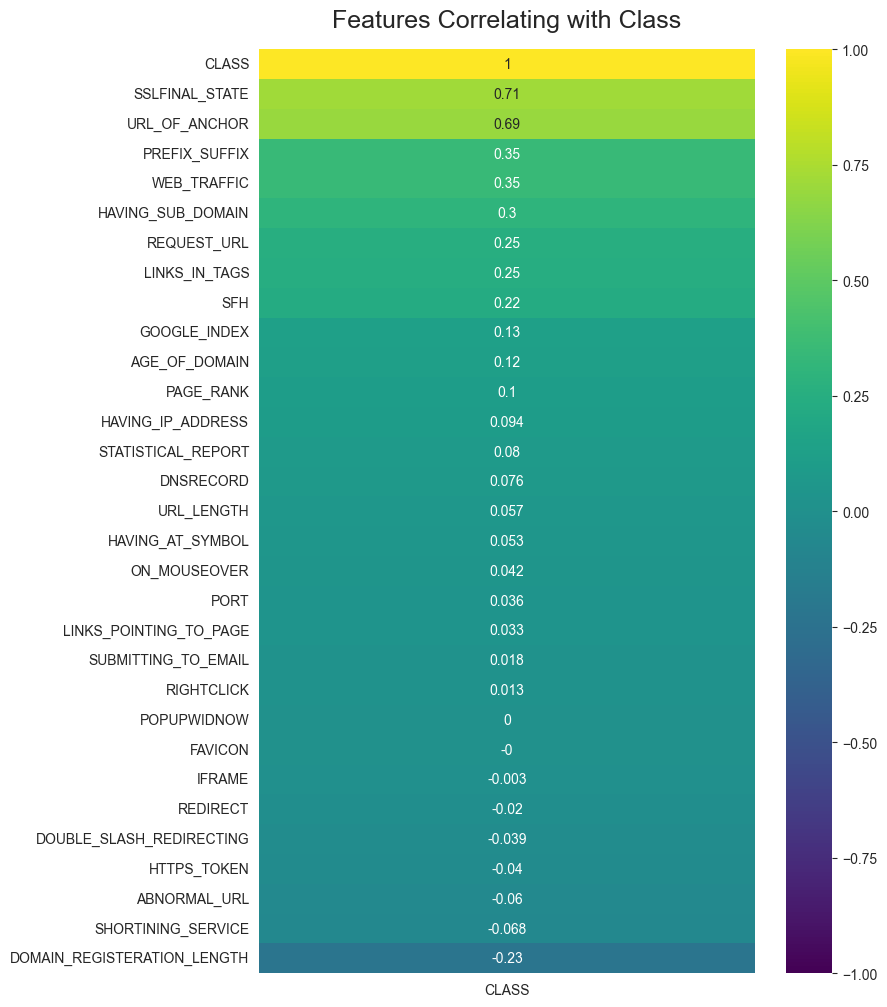

In [83]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(np.round(df1.corr(),3)[['CLASS']].sort_values(by='CLASS', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Class', fontdict={'fontsize':18}, pad=16);
#plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')


<AxesSubplot: title={'center': 'Correlation with Target'}>

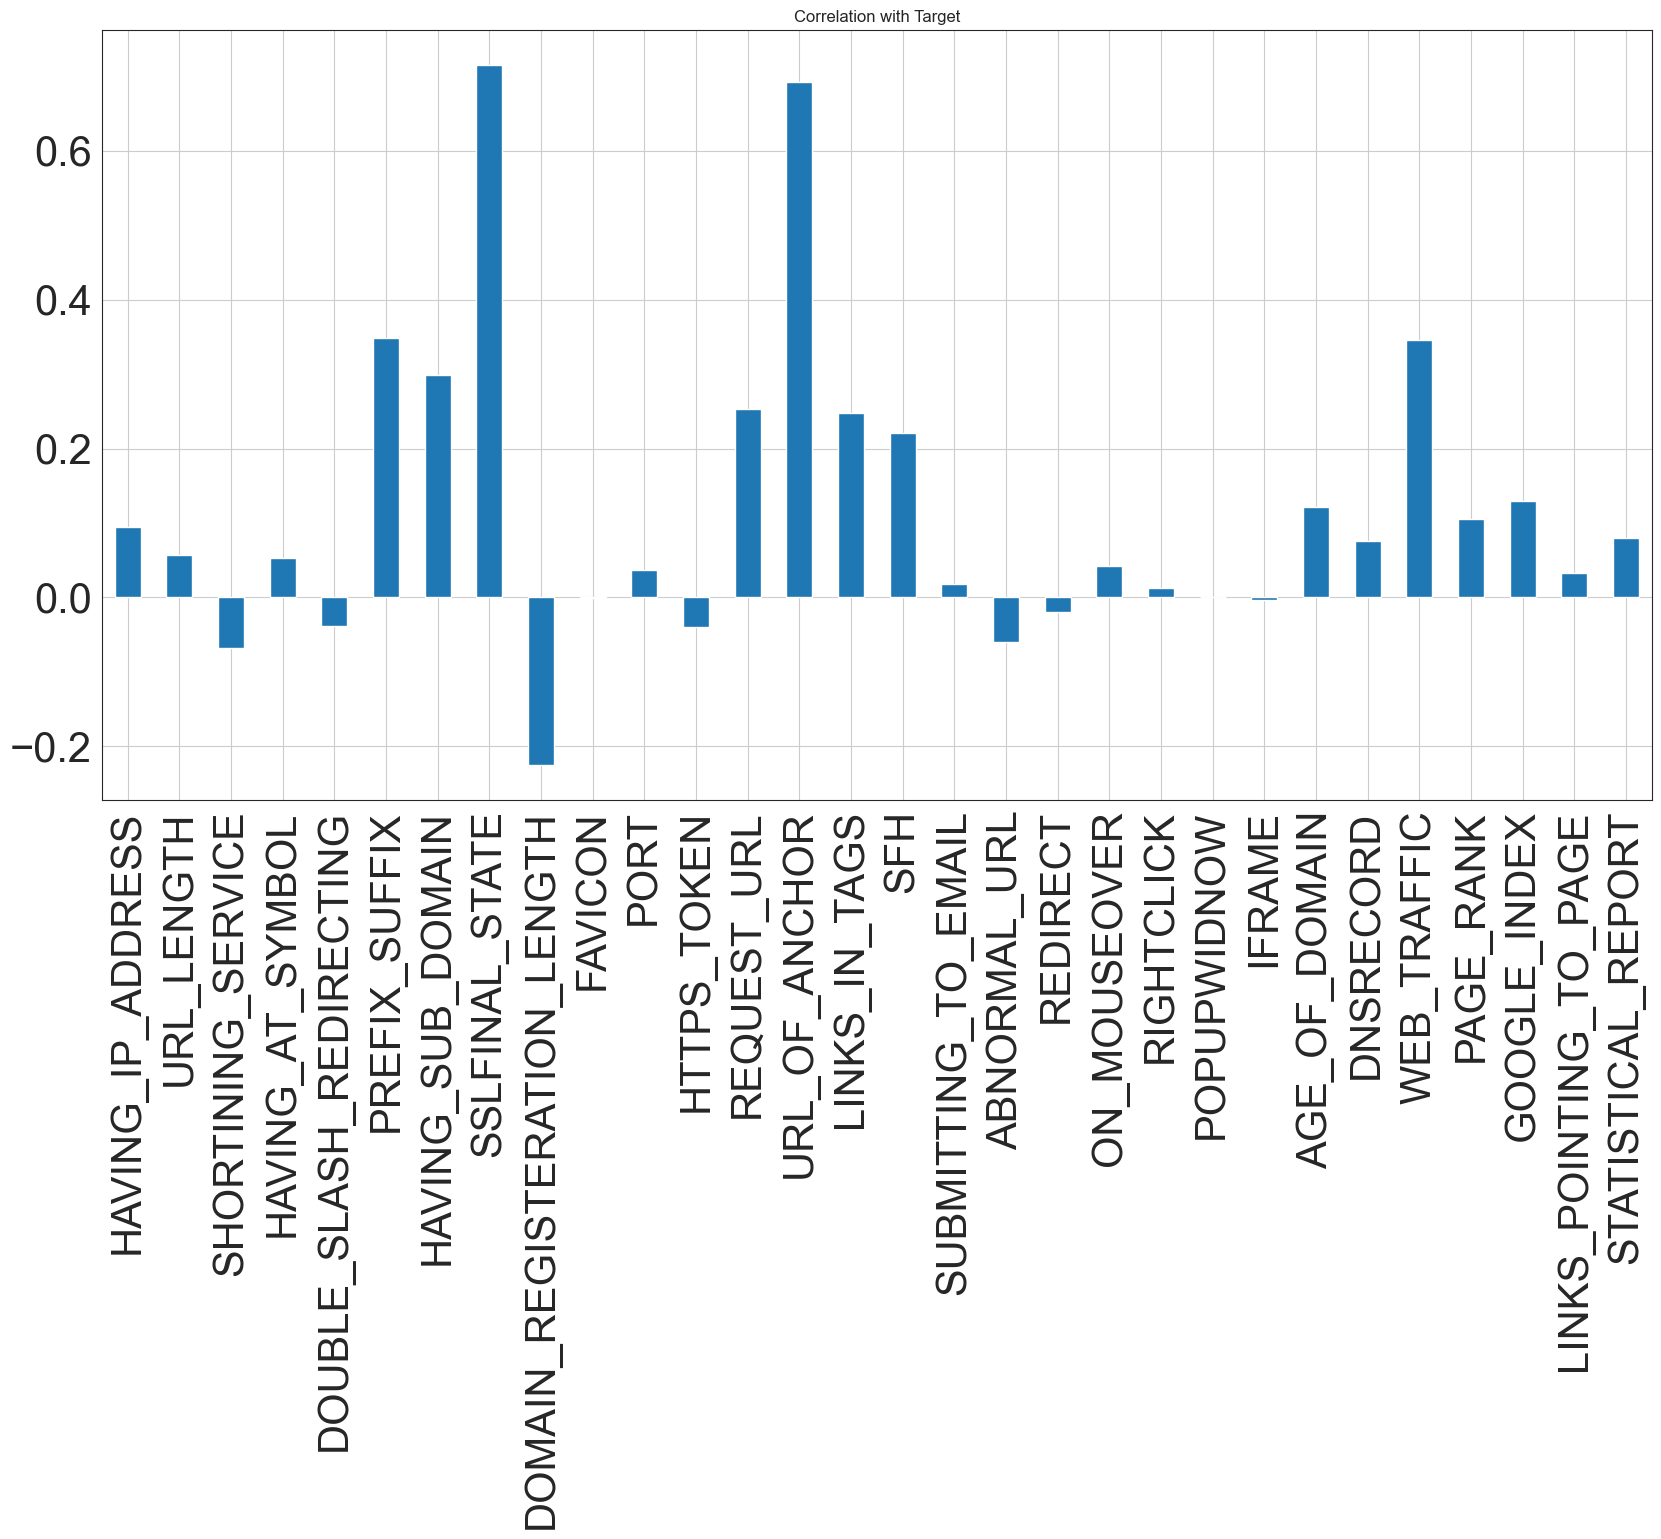

In [84]:
#### CORRELATION With the Target Feature
X=df1.drop(['CLASS'],axis=1)
X.corrwith(df1['CLASS']).plot.bar(
        figsize = (20, 10), title = "Correlation with Target", fontsize = 30,
        rot = 90, grid = True)

Above correlation values of each of 30 features with the target feature CLASS we found that columns

> ### Correlation values with the Target
DOMAIN_REGISTERATION_LENGTH   -0.23
SHORTINING_SERVICE            -0.07
ABNORMAL_URL                  -0.06
HAVING_AT_SYMBOL               0.05
URL_LENGTH                     0.06
DNSRECORD                      0.08
STATISTICAL_REPORT             0.08
HAVING_IP_ADDRESS              0.09
PAGE_RANK                      0.10
AGE_OF_DOMAIN                  0.12
GOOGLE_INDEX                   0.13
SFH                            0.22
REQUEST_URL                    0.25
LINKS_IN_TAGS                  0.25
HAVING_SUB_DOMAIN              0.30
WEB_TRAFFIC                    0.35
PREFIX_SUFFIX                  0.35
URL_OF_ANCHOR                  0.69
SSLFINAL_STATE                 0.71


>  Out of 30 features in the original dataframe after calculating Pearson Correlation Coeff and after visualization through correlation_Heatmap we have found the correlation values are ranging from lowest -0.23 for features(DOMAIN_REGISTERATION_LENGTH) to highest for feature(SSLFINAL_STATE = 0.71)
We have set the threshold frequency 0.05 for consideration of features as more relevant features and droping columns with coefficient values below the threshold saqme for negative values and actually taking mod(0.05) as our threshod value.
After feature selection baesd on Correlation Analysis using Pearsons Correlation Coefficient betwwen features and the target features we found that our independent features set has been reduced from 30 features to 19 features.



<AxesSubplot: >

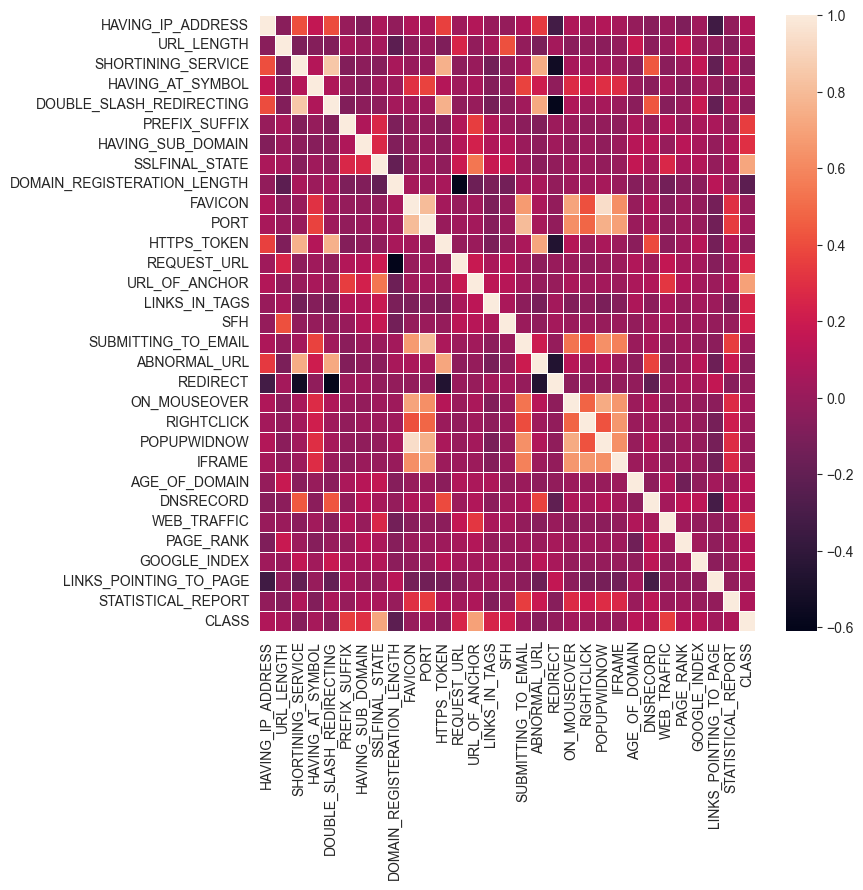

In [85]:
                  ### CORRELATION HEATMAP to show the pairwise  correlation between different features
plt.figure(figsize=(8, 8))
sns.heatmap(df1.corr(), linewidths=.5)
#plt.savefig(Heap_MAP_corr.png', dpi=300, bbox_inches='tight')


> ### CountPlot for each attribute 

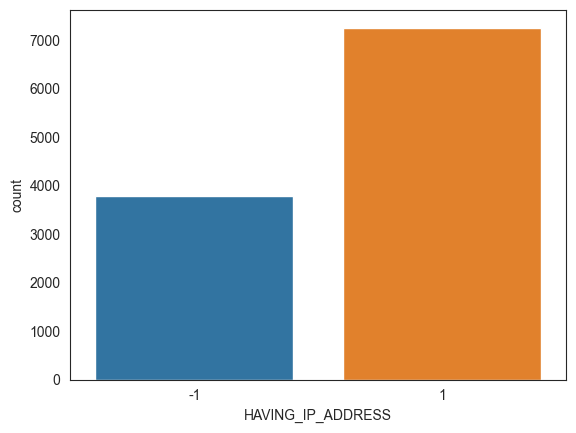

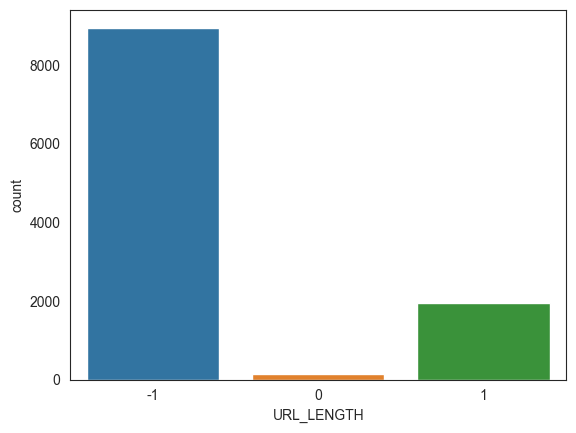

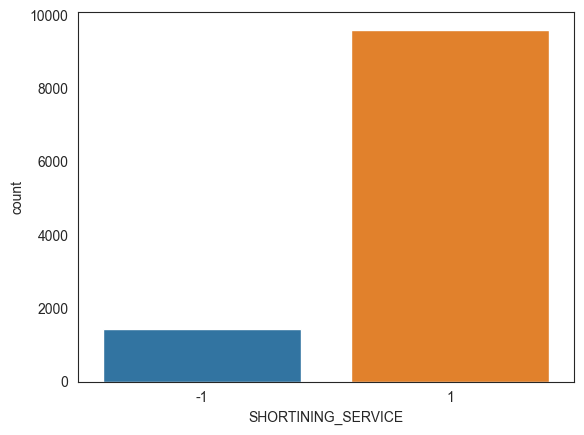

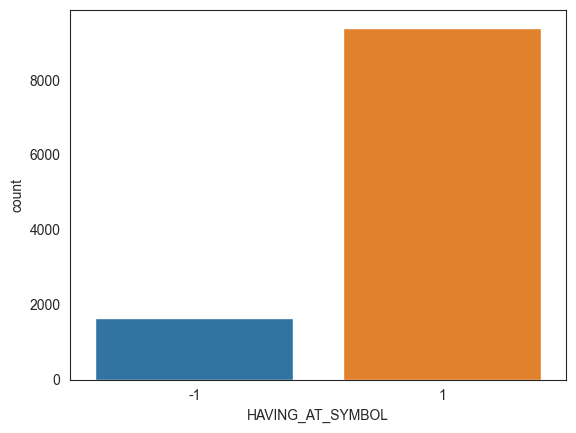

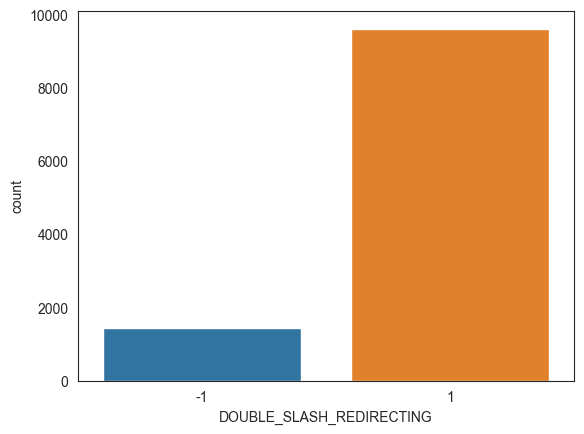

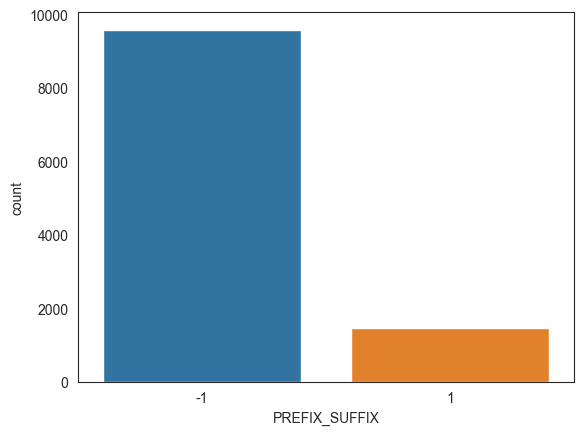

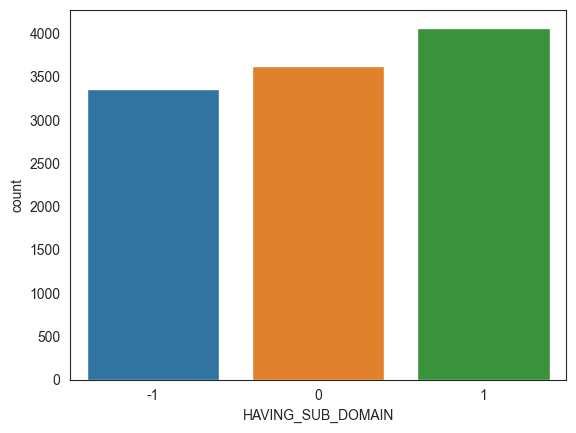

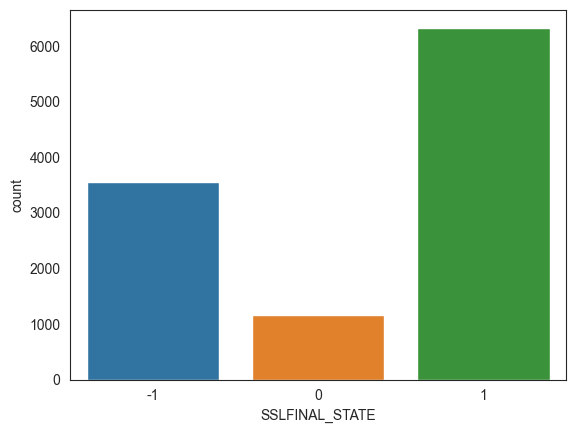

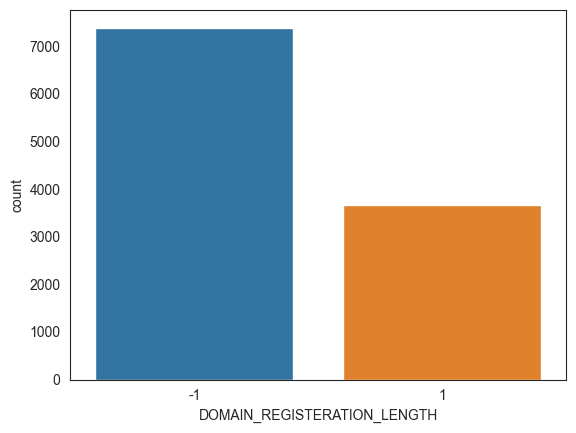

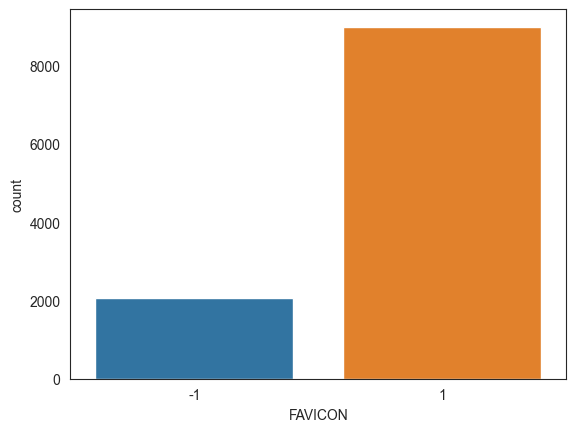

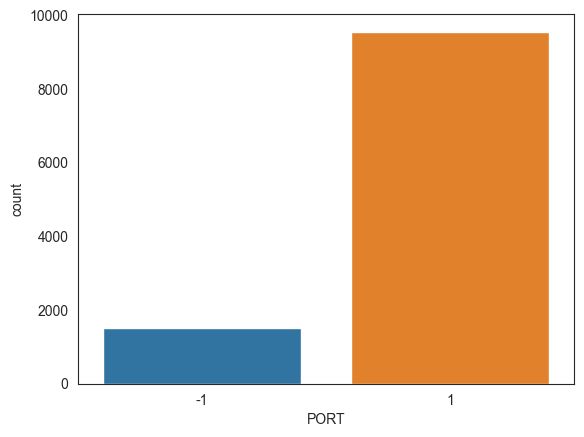

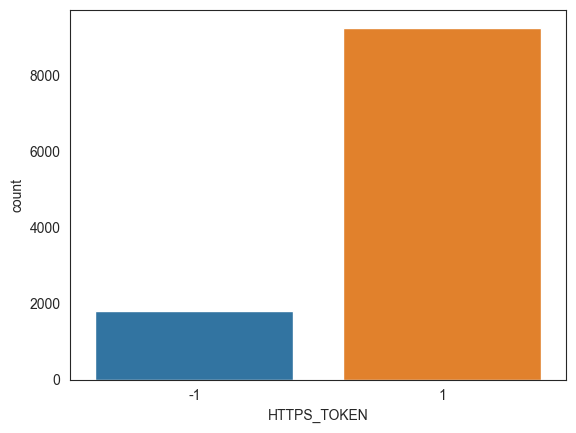

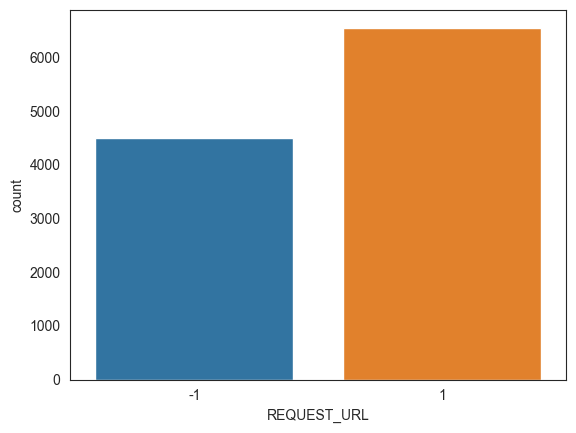

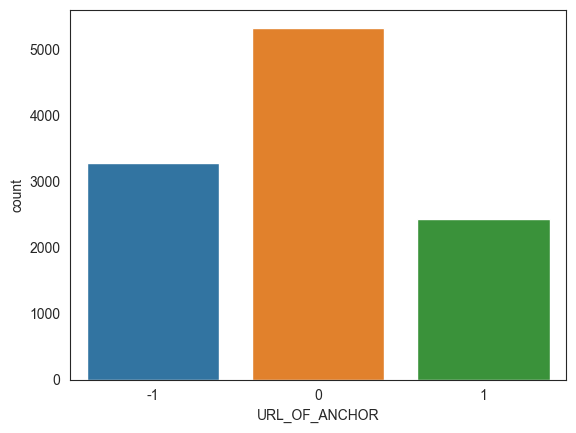

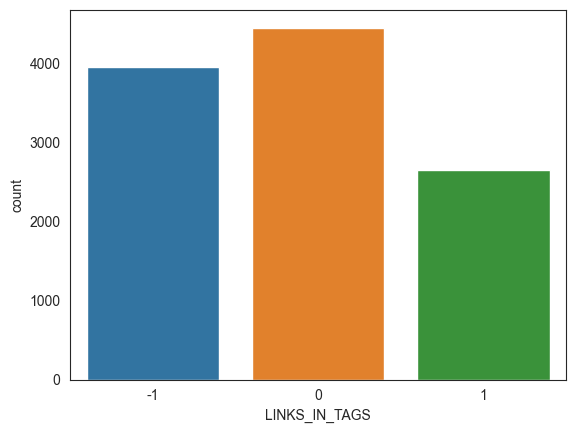

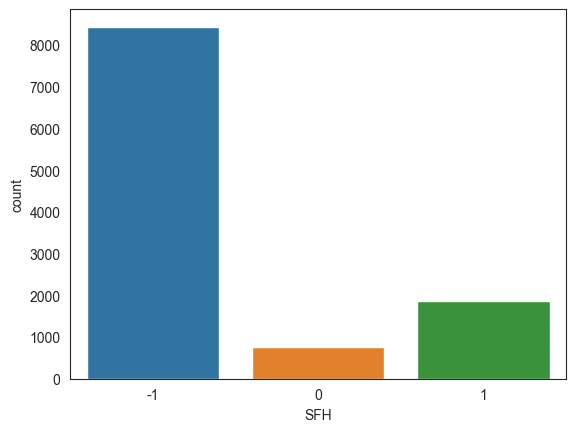

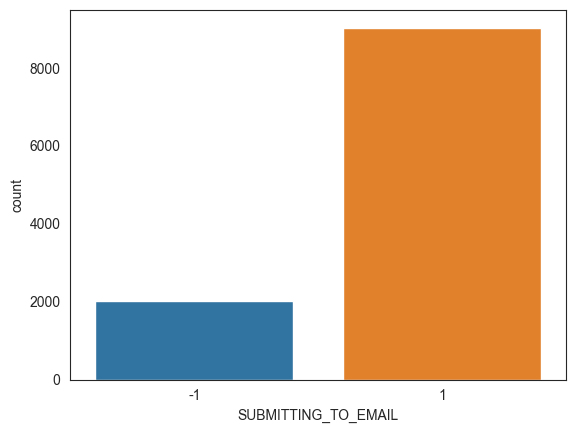

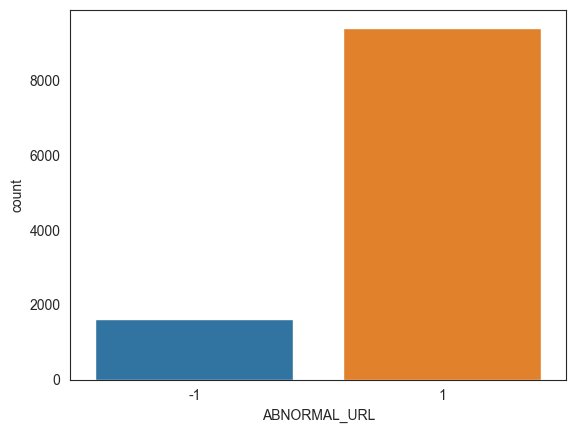

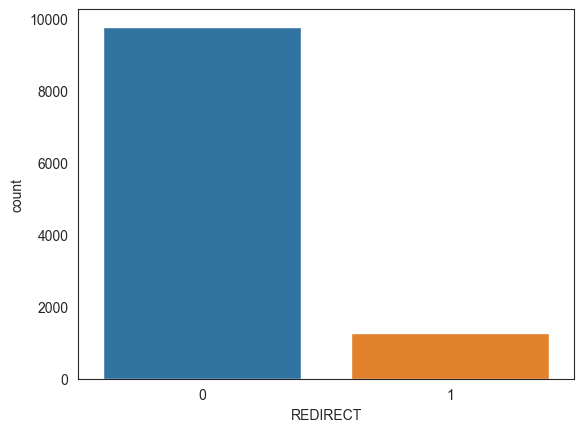

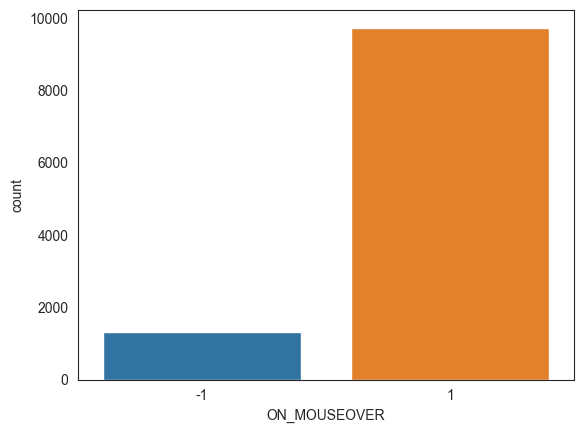

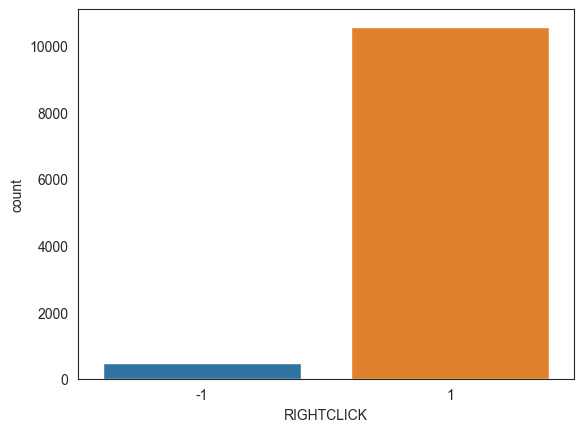

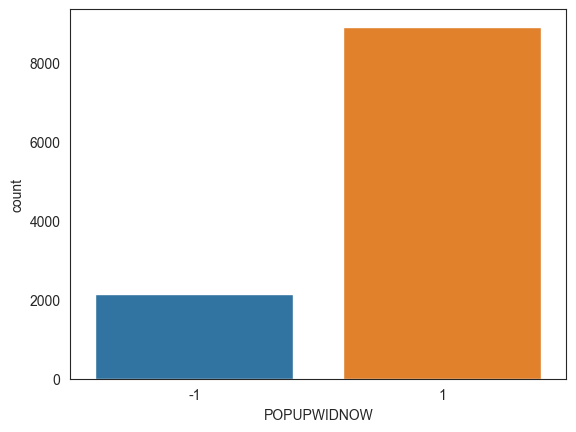

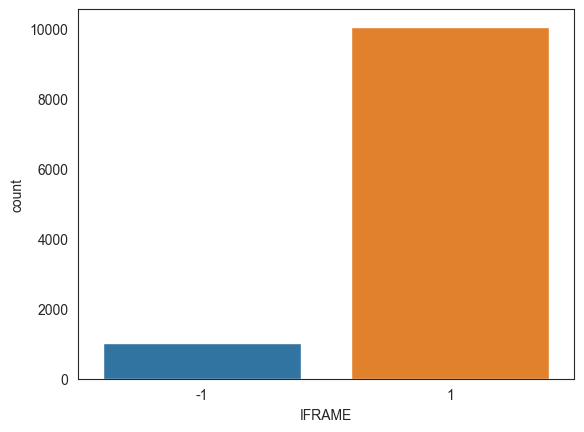

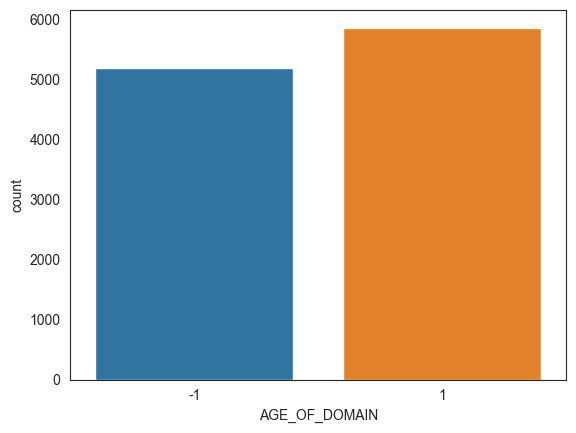

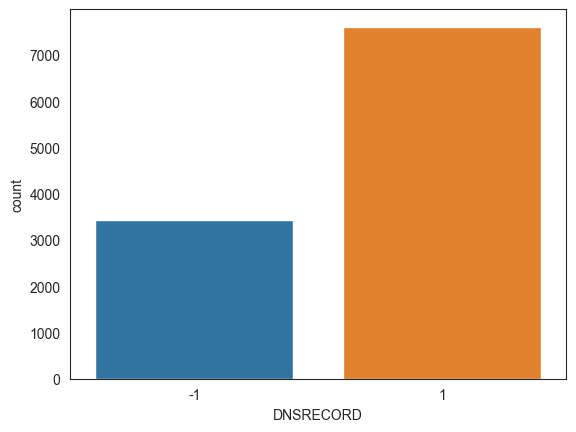

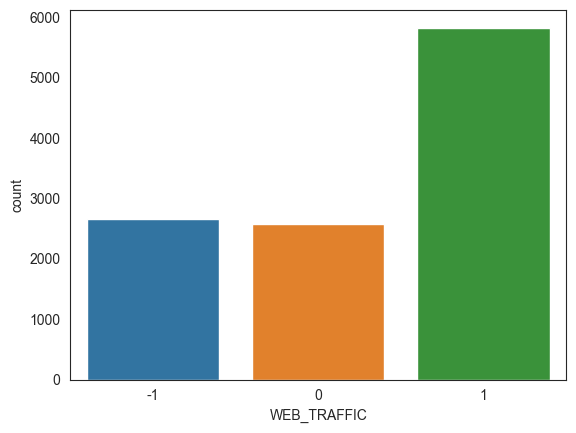

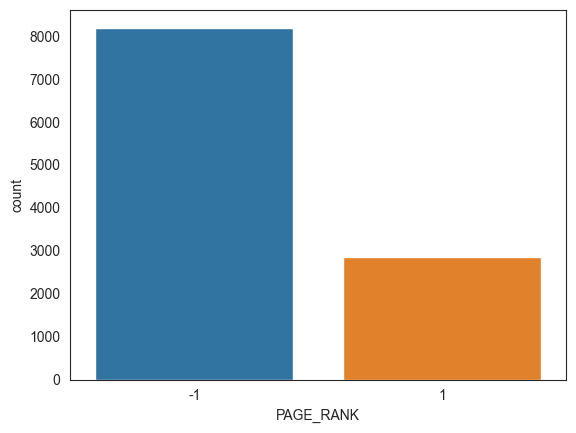

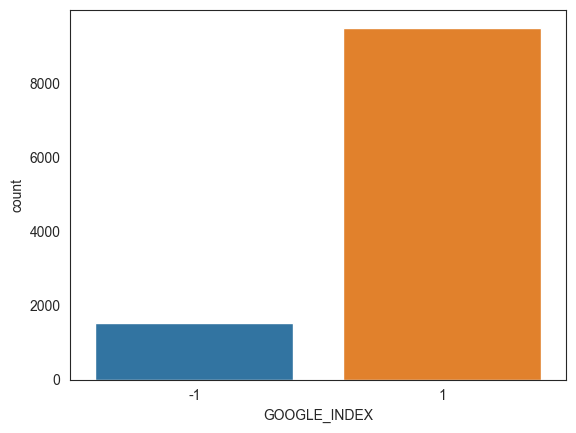

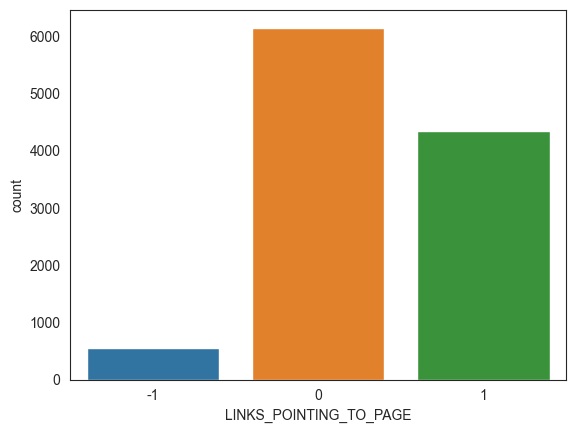

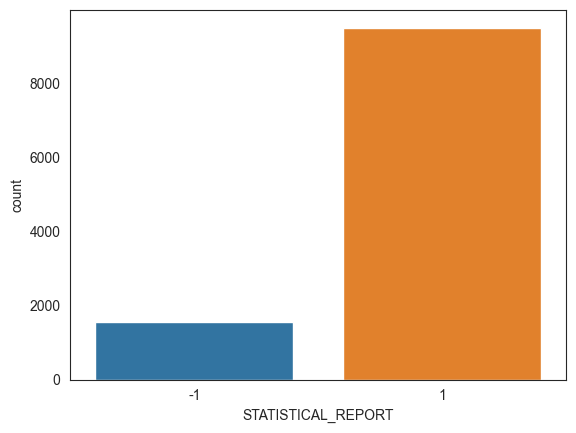

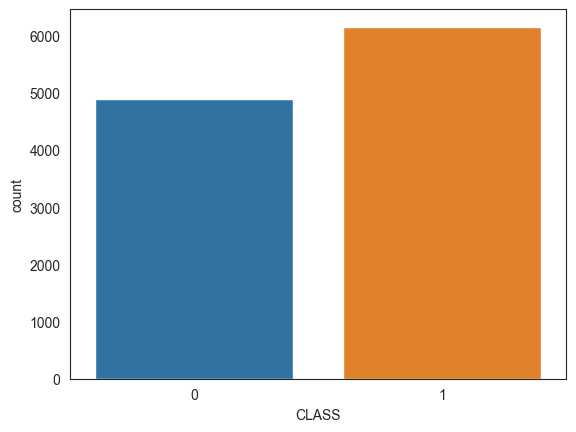

In [86]:
       ### COUNT_PLOT for each attribute/columns

df11 = df1.select_dtypes([np.int, np.float])
for i, col in enumerate(df11.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df11)
    plt.show()

In [87]:
df1



HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
0                     -1           1                   1                 1   
1                      1           1                   1                 1   
2                      1           0                   1                 1   
3                      1           0                   1                 1   
4                      1           0                  -1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  HAVING_SUB_DOMAIN  \
0                            -1             -1                 -1   
1                             1             -1                  0   
2                             1             -1                 -1   
3                             1             -1                 -1   
4                             1             -1                  1   
...                         ...            ...                ...   
11050                         1              1                  1   
11051                        -1             -1                  1   
11052                         1             -1                  1   
11053                         1             -1                 -1   
11054                         1             -1                 -1   

       SSLFINAL_STATE  DOMAIN_REGISTERATION_LENGTH  FAVICON  ...  POPUPWIDNOW  \
0                  -1                           -1        1  ...            1   
1                   1                           -1        1  ...            1   
2                  -1                           -1        1  ...            1   
3                  -1                            1        1  ...            1   
4                   1                           -1        1  ...           -1   
...               ...                          ...      ...  ...          ...   
11050               1                           -1       -1  ...           -1   
11051              -1                           -1       -1  ...           -1   
11052              -1                           -1        1  ...            1   
11053              -1                            1       -1  ...           -1   
11054              -1                            1        1  ...            1   

       IFRAME  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  GOOGLE_INDEX  \
0           1             -1         -1           -1         -1             1   
1           1             -1         -1            0         -1             1   
2           1              1         -1            1         -1             1   
3           1             -1         -1            1         -1             1   
4           1             -1         -1            0         -1             1   
...       ...            ...        ...          ...        ...           ...   
11050      -1              1          1           -1         -1             1   
11051       1              1          1            1          1             1   
11052       1              1          1            1         -1             1   
11053       1              1          1            1         -1             1   
11054       1             -1          1           -1         -1            -1   

       LINKS_POINTING_TO_PAGE  STATISTICAL_REPORT  CLASS  
0                           1                  -1      0  
1                           1                   1      0  
2                           0                  -1      0  
3                          -1                   1      0  


In [88]:
# # calculate Pearson's correlation coefficient between target and each feature
# corr_matrix = df1.corr(method='pearson')
# pearsons_coefficients = corr_matrix['CLASSLABEL'].drop('CLASSLABEL')

# # print the results
# print("Pearson's coefficients:")
# print(np.round(pearsons_coefficients,2))

In [89]:
# pearson_coeff=list(np.round(pearsons_coefficients,2))
# pearson_coeff

In [90]:
# cols=df1.columns.drop('CLASSLABEL')
# cols

In [91]:
# df_corr_pearson=pd.DataFrame(pearson_coeff,columns=['Coeff'],index=cols)
# df_corr_pearson

In [92]:
Filtered_df=df1.drop(['DOUBLE_SLASH_REDIRECTING','HTTPS_TOKEN','REDIRECT','POPUPWIDNOW','FAVICON','IFRAME','RIGHTCLICK','SUBMITTING_TO_EMAIL','LINKS_POINTING_TO_PAGE','ON_MOUSEOVER','PORT'],axis=1)
Filtered_df
Filtered_df.to_csv('Filtered_df.csv')

> Above dataframe is filtered dataset after removing 11 least Correlated features with the target variable.

> Having Now the best 19 features associated with the target feature(Class)


In [93]:
print(emoji.emojize('Yeah!!! , We have reduced subset of features of Dataset  :thumbs_up:'))

Yeah!!! , We have reduced subset of features of Dataset  👍


In [94]:
### New Independent features set
X3=Filtered_df.iloc[:,0:19]
X3

HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
0                     -1           1                   1                 1   
1                      1           1                   1                 1   
2                      1           0                   1                 1   
3                      1           0                   1                 1   
4                      1           0                  -1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       PREFIX_SUFFIX  HAVING_SUB_DOMAIN  SSLFINAL_STATE  \
0                 -1                 -1              -1   
1                 -1                  0               1   
2                 -1                 -1              -1   
3                 -1                 -1              -1   
4                 -1                  1               1   
...              ...                ...             ...   
11050              1                  1               1   
11051             -1                  1              -1   
11052             -1                  1              -1   
11053             -1                 -1              -1   
11054             -1                 -1              -1   

       DOMAIN_REGISTERATION_LENGTH  REQUEST_URL  URL_OF_ANCHOR  LINKS_IN_TAGS  \
0                               -1            1             -1              1   
1                               -1            1              0             -1   
2                               -1            1              0             -1   
3                                1           -1              0              0   
4                               -1            1              0              0   
...                            ...          ...            ...            ...   
11050                           -1            1              1              1   
11051                           -1            1             -1             -1   
11052                           -1            1              0             -1   
11053                            1           -1             -1              1   
11054                            1           -1             -1              0   

       SFH  ABNORMAL_URL  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  \
0       -1            -1             -1         -1           -1         -1   
1       -1             1             -1         -1            0         -1   
2       -1            -1              1         -1            1         -1   
3       -1             1             -1         -1            1         -1   
4       -1             1             -1         -1            0         -1   
...    ...           ...            ...        ...          ...        ...   
11050   -1             1              1          1           -1         -1   
11051    0            -1              1          1            1          1   
11052   -1             1              1          1            1         -1   
11053   -1             1              1          1            1         -1   
11054   -1             1             -1          1           -1         -1   

       GOOGLE_INDEX  STATISTICAL_REPORT  
0                 1                  -1  
1                 1                   1  
2                 1                  -1  
3                 1                   1  
4                 1                   1  
...             ...                 ...  
11050             1                   1  
11051             1                   1  
11052             1                   1  
11053             1            

In [95]:
### same target feature
y3=Filtered_df.iloc[:,19]
y3

0        0
1        0
2        0
3        0
4        1
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: CLASS, Length: 11055, dtype: int64

In [96]:
train_X3=X3.iloc[0:7738,0:19]
train_X3

HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
0                    -1           1                   1                 1   
1                     1           1                   1                 1   
2                     1           0                   1                 1   
3                     1           0                   1                 1   
4                     1           0                  -1                 1   
...                 ...         ...                 ...               ...   
7733                 -1          -1                   1                 1   
7734                  1          -1                  -1                 1   
7735                 -1          -1                   1                 1   
7736                 -1          -1                   1                 1   
7737                 -1          -1                   1                 1   

      PREFIX_SUFFIX  HAVING_SUB_DOMAIN  SSLFINAL_STATE  \
0                -1                 -1              -1   
1                -1                  0               1   
2                -1                 -1              -1   
3                -1                 -1              -1   
4                -1                  1               1   
...             ...                ...             ...   
7733              1                  1              -1   
7734              1                  1               1   
7735              1                 -1               1   
7736             -1                 -1               1   
7737             -1                  0               1   

      DOMAIN_REGISTERATION_LENGTH  REQUEST_URL  URL_OF_ANCHOR  LINKS_IN_TAGS  \
0                              -1            1             -1              1   
1                              -1            1              0             -1   
2                              -1            1              0             -1   
3                               1           -1              0              0   
4                              -1            1              0              0   
...                           ...          ...            ...            ...   
7733                           -1            1              1              0   
7734                            1            1              0              0   
7735                           -1            1              0              0   
7736                           -1            1              0              1   
7737                            1            1             -1             -1   

      SFH  ABNORMAL_URL  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  \
0      -1            -1             -1         -1           -1         -1   
1      -1             1             -1         -1            0         -1   
2      -1            -1              1         -1            1         -1   
3      -1             1             -1         -1            1         -1   
4      -1             1             -1         -1            0         -1   
...   ...           ...            ...        ...          ...        ...   
7733   -1             1             -1          1           -1          1   
7734   -1             1             -1         -1            1          1   
7735   -1             1             -1          1            1         -1   
7736   -1             1             -1          1            1         -1   
7737   -1             1             -1          1            0          1   

      GOOGLE_INDEX  STATISTICAL_REPORT  
0                1                  -1  
1                1                   1  
2                1                  -1  
3                1                   1  
4                1                   1  
...            ...                 ...  
7733             1                   1  
7734             1                   1  
7735             1                   1  
7736             1                   1  
7737             1                   1  

[7738

In [97]:
test_X3=X3.iloc[7738:,0:19]
test_X3

HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
7738                  -1          -1                   1                 1   
7739                  -1          -1                   1                -1   
7740                  -1          -1                   1                -1   
7741                  -1          -1                   1                 1   
7742                   1          -1                   1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       PREFIX_SUFFIX  HAVING_SUB_DOMAIN  SSLFINAL_STATE  \
7738              -1                  0              -1   
7739              -1                  0              -1   
7740              -1                  1               1   
7741              -1                  1               0   
7742              -1                  0              -1   
...              ...                ...             ...   
11050              1                  1               1   
11051             -1                  1              -1   
11052             -1                  1              -1   
11053             -1                 -1              -1   
11054             -1                 -1              -1   

       DOMAIN_REGISTERATION_LENGTH  REQUEST_URL  URL_OF_ANCHOR  LINKS_IN_TAGS  \
7738                             1           -1             -1              1   
7739                             1           -1             -1              0   
7740                            -1            1              1              1   
7741                            -1            1             -1             -1   
7742                            -1            1              0              0   
...                            ...          ...            ...            ...   
11050                           -1            1              1              1   
11051                           -1            1             -1             -1   
11052                           -1            1              0             -1   
11053                            1           -1             -1              1   
11054                            1           -1             -1              0   

       SFH  ABNORMAL_URL  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  \
7738    -1             1             -1          1           -1          1   
7739     0             1             -1          1           -1          1   
7740    -1            -1             -1          1            1          1   
7741    -1             1             -1          1           -1         -1   
7742    -1             1             -1          1            1          1   
...    ...           ...            ...        ...          ...        ...   
11050   -1             1              1          1           -1         -1   
11051    0            -1              1          1            1          1   
11052   -1             1              1          1            1         -1   
11053   -1             1              1          1            1         -1   
11054   -1             1             -1          1           -1         -1   

       GOOGLE_INDEX  STATISTICAL_REPORT  
7738              1                   1  
7739              1                   1  
7740              1                   1  
7741              1                   1  
7742              1                   1  
...             ...                 ...  
11050             1                   1  
11051             1                   1  
11052             1                   1  
11053             1            

In [98]:
train_y3=df1.iloc[0:7738,30]
train_y3

0       0
1       0
2       0
3       0
4       1
       ..
7733    1
7734    1
7735    1
7736    1
7737    0
Name: CLASS, Length: 7738, dtype: int64

In [99]:
test_y3=df1.iloc[7738:,30]
test_y3

7738     0
7739     0
7740     1
7741     0
7742     0
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: CLASS, Length: 3317, dtype: int64

In [100]:
### Import Train and split method from model selection; do 70 & 30 % split up


print("Training set has {} samples.".format(train_X3.shape[0]))
print("Testing set has {} samples.".format(test_X3.shape[0]))
print('Printing shape of train_X3,train_Y3,test_X3,test_Y3')
train_X3.shape,train_y3.shape,test_X3.shape,test_y3.shape

Training set has 7738 samples.
Testing set has 3317 samples.
Printing shape of train_X3,train_Y3,test_X3,test_Y3


((7738, 19), (7738,), (3317, 19), (3317,))

### Modelling the dataset using only 19  factor features

In [101]:
#to store model  performance 

ml_model3_Train = []
accuracy3_Train = []
f1_score3_Train= []
recall3_Train = []
precision3_Train = []
#function to call for storing the results

def storeResults3_Train(model,a,b,c,d):
    ml_model3_Train.append(model)
    accuracy3_Train.append(round(a, 3))
    f1_score3_Train.append(round(b, 3))
    recall3_Train.append(round(c, 3))
    precision3_Train.append(round(d ,3))

In [102]:
#to store model  performance 

ml_model3_Test = []
accuracy3_Test = []
f1_score3_Test= []
recall3_Test = []
precision3_Test = []
#function to call for storing the results

def storeResults3_Test(model3,a,b,c,d):
    ml_model3_Test.append(model3)
    accuracy3_Test.append(round(a, 3))
    f1_score3_Test.append(round(b, 3))
    recall3_Test.append(round(c, 3))
    precision3_Test.append(round(d ,3))

### ---------Decision Tree Classifier------

In [103]:
# instantiate the model 
tree = DecisionTreeClassifier(max_depth=20)

# fit the model 
tree.fit(train_X3, train_y3)
#predicting the target value from the model for the samples
y_train_tree3 = tree.predict(train_X3)
y_test_tree3 = tree.predict(test_X3)


acc_train_tree3 = metrics.accuracy_score(train_y3,y_train_tree3)
acc_test_tree3 = metrics.accuracy_score(test_y3,y_test_tree3)
print("Decision Tree3 : Accuracy on training Data: {:.3f}".format(acc_train_tree3))
print("Decision3 Tree3 : Accuracy on test Data: {:.3f}".format(acc_test_tree3))
print()
f1_score_train_tree3 = metrics.f1_score(train_y3,y_train_tree3)
f1_score_test_tree3 = metrics.f1_score(test_y3,y_test_tree3)
print("Decision Tree3 : f1_score on training Data: {:.3f}".format(f1_score_train_tree3))
print("Decision Tree3 : f1_score on test Data: {:.3f}".format(f1_score_test_tree3))
print()
recall_score_train_tree3 = metrics.recall_score(train_y3,y_train_tree3)
recall_score_test_tree3= metrics.recall_score(test_y3,y_test_tree3)
print("Decision3 Tree3 : Recall on training Data: {:.3f}".format(recall_score_train_tree3))
print("Decision3 Tree3 : Recall on test Data: {:.3f}".format(recall_score_test_tree3))
print()
precision_score_train_tree3 = metrics.precision_score(train_y3,y_train_tree3)
precision_score_test_tree3 = metrics.precision_score(test_y3,y_test_tree3)
print("Decision Tree3 : precision on training Data: {:.3f}".format(precision_score_train_tree3))
print("Decision Tree3 : precision on test Data: {:.3f}".format(precision_score_test_tree3))

print(metrics.classification_report(test_y3, y_test_tree3))

Decision Tree3 : Accuracy on training Data: 0.983
Decision3 Tree3 : Accuracy on test Data: 0.875

Decision Tree3 : f1_score on training Data: 0.985
Decision Tree3 : f1_score on test Data: 0.886

Decision3 Tree3 : Recall on training Data: 0.983
Decision3 Tree3 : Recall on test Data: 0.870

Decision Tree3 : precision on training Data: 0.987
Decision Tree3 : precision on test Data: 0.902
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1464
           1       0.90      0.87      0.89      1853

    accuracy                           0.87      3317
   macro avg       0.87      0.88      0.87      3317
weighted avg       0.88      0.87      0.87      3317



In [104]:
training_accuracy = []
test_accuracy = []

depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(train_X3, train_y3)
    # record training set accuracy
    training_accuracy.append(tree_test.score(train_X3, train_y3))
    # record generalization accuracy
    
    
    test_accuracy.append(tree_test.score(test_X3, test_y3))
    
storeResults3_Train('Decision Tree3',acc_train_tree3,f1_score_train_tree3,
             recall_score_train_tree3,precision_score_train_tree3)
storeResults3_Test('Decision Tree3',acc_test_tree3,f1_score_test_tree3,
             recall_score_test_tree3,precision_score_test_tree3)

# Model_2 Random Forest Model

Random Forest3 : Accuracy on training Data: 0.983
Random Forest3 : Accuracy on test Data: 0.909

Random Forest3: f1_score on training Data: 0.985
Random Forest3 : f1_score on test Data: 0.920

Random Forest3 : Recall on training Data: 0.985
Random Forest3 : Recall on test Data: 0.943

Random Forest3 : precision on training Data: 0.984
Random Forest3 : precision on test Data: 0.902
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1464
           1       0.90      0.94      0.92      1853

    accuracy                           0.91      3317
   macro avg       0.91      0.90      0.91      3317
weighted avg       0.91      0.91      0.91      3317



Text(0.5, 427.9555555555555, 'Predicted')

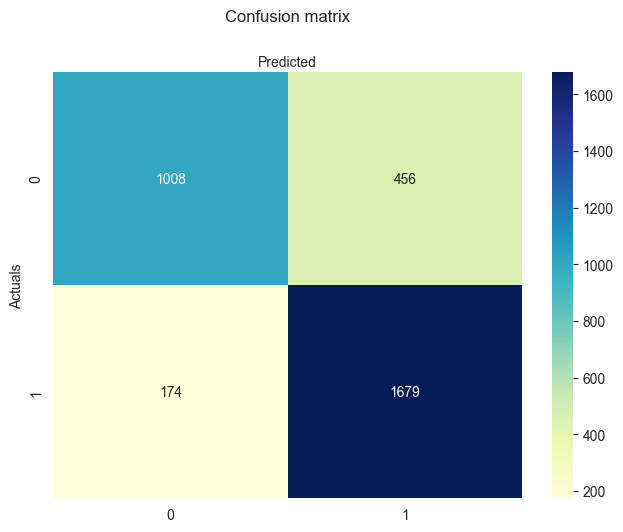

In [105]:
# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(train_X3,train_y3)
y_train_forest3 = forest.predict(train_X3)
y_test_forest3 = forest.predict(test_X3)




acc_train_forest3 = metrics.accuracy_score(train_y3,y_train_forest3)
acc_test_forest3 = metrics.accuracy_score(test_y3,y_test_forest3)
print("Random Forest3 : Accuracy on training Data: {:.3f}".format(acc_train_forest3))
print("Random Forest3 : Accuracy on test Data: {:.3f}".format(acc_test_forest3))
print()
f1_score_train_forest3 = metrics.f1_score(train_y3,y_train_forest3)
f1_score_test_forest3 = metrics.f1_score(test_y3,y_test_forest3)
print("Random Forest3: f1_score on training Data: {:.3f}".format(f1_score_train_forest3))
print("Random Forest3 : f1_score on test Data: {:.3f}".format(f1_score_test_forest3))
print()
recall_score_train_forest3 = metrics.recall_score(train_y3,y_train_forest3)
recall_score_test_forest3 = metrics.recall_score(test_y3,y_test_forest3)
print("Random Forest3 : Recall on training Data: {:.3f}".format(recall_score_train_forest3))
print("Random Forest3 : Recall on test Data: {:.3f}".format(recall_score_test_forest3))
print()
precision_score_train_forest3 = metrics.precision_score(train_y3,y_train_forest3)
precision_score_test_forest3 = metrics.precision_score(test_y3,y_test_tree3)
print("Random Forest3 : precision on training Data: {:.3f}".format(precision_score_train_forest3))
print("Random Forest3 : precision on test Data: {:.3f}".format(precision_score_test_forest3))

print(metrics.classification_report(test_y3, y_test_forest3))

#confusion_matrix = metrics.confusion_matrix(test_y1,y_test_gbc_pred)
confusion_matrix

class_names = [0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

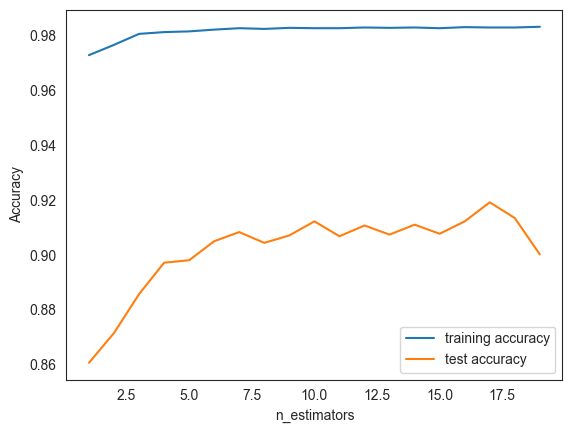

In [106]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    forest_test = RandomForestClassifier(n_estimators=n)

    forest_test.fit(train_X3, train_y3)
    # record training set accuracy
    training_accuracy.append(forest_test.score(train_X3, train_y3))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(test_X3, test_y3))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

storeResults3_Train('Random Forest3',acc_train_forest3,f1_score_train_forest3,
             recall_score_train_forest3,precision_score_train_forest3)

storeResults3_Test('Random Forest3',acc_test_forest3,f1_score_test_forest3,
             recall_score_test_forest3,precision_score_test_forest3)

# Model_3 Gradient Boost

Gradient Boost3: Accuracy on training Data: 0.982
Gradient Boost3: Accuracy on test Data: 0.910

Gradient Boost3 : f1_score on training Data: 0.984
Gradient Boost3 : f1_score on test Data: 0.920

Gradient Boost3 : Recall on training Data: 0.987
Gradient Boost3 : Recall on test Data: 0.933

Gradient Boost3 : precision on training Data: 0.981
Gradient Boost3 : precision on test Data: 0.908
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1464
           1       0.91      0.93      0.92      1853

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



Text(0.5, 427.9555555555555, 'Predicted')

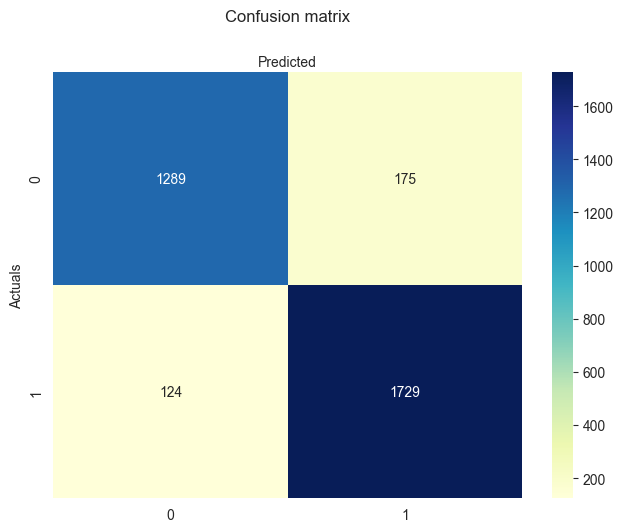

In [107]:
# fit the model 
gbc.fit(train_X3,train_y3)

y_train_gbc3 = gbc.predict(train_X3)
y_test_gbc3 = gbc.predict(test_X3)

acc_train_gbc3 = metrics.accuracy_score(train_y3,y_train_gbc3)
acc_test_gbc3 = metrics.accuracy_score(test_y3,y_test_gbc3)
print("Gradient Boost3: Accuracy on training Data: {:.3f}".format(acc_train_gbc3))
print("Gradient Boost3: Accuracy on test Data: {:.3f}".format(acc_test_gbc3))
print()
f1_score_train_gbc3 = metrics.f1_score(train_y3,y_train_gbc3)
f1_score_test_gbc3 = metrics.f1_score(test_y3,y_test_gbc3)
print("Gradient Boost3 : f1_score on training Data: {:.3f}".format(f1_score_train_gbc3))
print("Gradient Boost3 : f1_score on test Data: {:.3f}".format(f1_score_test_gbc3))
print()
recall_score_train_gbc3 = metrics.recall_score(train_y3,y_train_gbc3)
recall_score_test_gbc3 = metrics.recall_score(test_y3,y_test_gbc3)
print("Gradient Boost3 : Recall on training Data: {:.3f}".format(recall_score_train_gbc3))
print("Gradient Boost3 : Recall on test Data: {:.3f}".format(recall_score_test_gbc3))
print()
precision_score_train_gbc3 = metrics.precision_score(train_y3,y_train_gbc3)
precision_score_test_gbc3 = metrics.precision_score(test_y3,y_test_gbc3)
print("Gradient Boost3 : precision on training Data: {:.3f}".format(precision_score_train_gbc3))
print("Gradient Boost3 : precision on test Data: {:.3f}".format(precision_score_test_gbc3))

print(metrics.classification_report(test_y3, y_test_gbc3))

storeResults3_Train('Gradient Boost3 ',acc_train_gbc3,f1_score_train_gbc3,
             recall_score_train_gbc3,precision_score_train_gbc3)

storeResults3_Test('Gradient Boost3 ',acc_test_gbc3,f1_score_test_gbc3,
             recall_score_test_gbc3,precision_score_test_gbc3)


confusion_matrix = metrics.confusion_matrix(test_y3,y_test_gbc3)
confusion_matrix

class_names = [0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

# Model_4  Extreme Gradient Boosting

Extreme Gradient Boost3: Accuracy on training Data: 0.979
Extreme Gradient Boost3: Accuracy on test Data: 0.961

Extreme Gradient Boost3 : f1_score on training Data: 0.981
Extreme Gradient Boost3 : f1_score on test Data: 0.965

Extreme Gradient Boost3 : Recall on training Data: 0.985
Extreme Gradient Boost3: Recall on test Data: 0.966

Extreme Gradient Boost3 : precision on training Data: 0.978
Extreme Gradient Boost3 : precision on test Data: 0.964
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1460
           1       0.96      0.97      0.97      1857

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



Text(0.5, 427.9555555555555, 'Predicted')

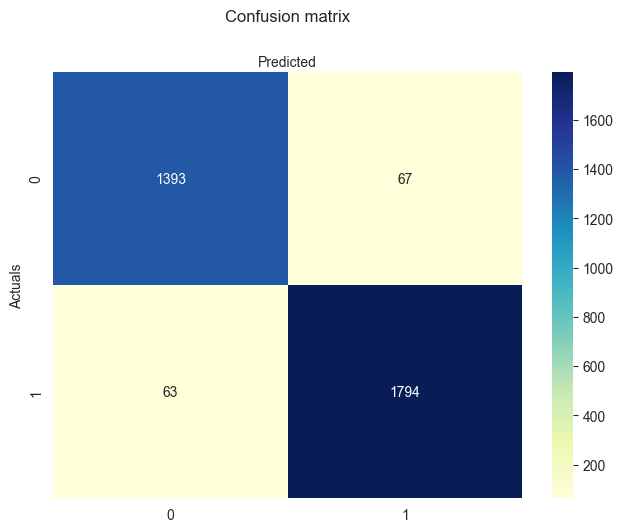

In [108]:
# split data into train and test sets
seed = 2
test_size = 0.3
train_X3, test_X3, train_y3, test_y3 = train_test_split(X3, y3, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(train_X3, train_y3)
# make predictions for test data
y_train_xgbc3=model.predict(train_X3)
y_test_xgbc3 = model.predict(test_X3)


acc_train_xgbc3 = metrics.accuracy_score(train_y3,y_train_xgbc3)
acc_test_xgbc3 = metrics.accuracy_score(test_y3,y_test_xgbc3)
print("Extreme Gradient Boost3: Accuracy on training Data: {:.3f}".format(acc_train_xgbc3))
print("Extreme Gradient Boost3: Accuracy on test Data: {:.3f}".format(acc_test_xgbc3))
print()

f1_score_train_xgbc3 = metrics.f1_score(train_y3,y_train_xgbc3)
f1_score_test_xgbc3 = metrics.f1_score(test_y3,y_test_xgbc3)
print("Extreme Gradient Boost3 : f1_score on training Data: {:.3f}".format(f1_score_train_xgbc3))
print("Extreme Gradient Boost3 : f1_score on test Data: {:.3f}".format(f1_score_test_xgbc3))
print()

recall_score_train_xgbc3 = metrics.recall_score(train_y3,y_train_xgbc3)
recall_score_test_xgbc3 = metrics.recall_score(test_y3,y_test_xgbc3)
print("Extreme Gradient Boost3 : Recall on training Data: {:.3f}".format(recall_score_train_xgbc3))
print("Extreme Gradient Boost3: Recall on test Data: {:.3f}".format(recall_score_test_xgbc3))
print()

precision_score_train_xgbc3 = metrics.precision_score(train_y3,y_train_xgbc3)
precision_score_test_xgbc3 = metrics.precision_score(test_y3,y_test_xgbc3)
print("Extreme Gradient Boost3 : precision on training Data: {:.3f}".format(precision_score_train_xgbc3))
print("Extreme Gradient Boost3 : precision on test Data: {:.3f}".format(precision_score_test_xgbc3))

print(metrics.classification_report(test_y3, y_test_xgbc3))

confusion_matrix = metrics.confusion_matrix(test_y3,y_test_xgbc3)
confusion_matrix

class_names = [0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

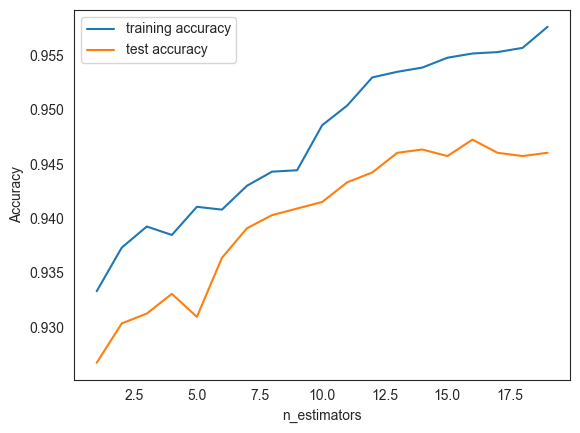

In [109]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    XGB_test =  XGBClassifier(n_estimators=n)

    XGB_test.fit(train_X3, train_y3)
    # record training set accuracy
    training_accuracy.append(XGB_test.score(train_X3, train_y3))
    # record generalization accuracy
    test_accuracy.append(XGB_test.score(test_X3, test_y3))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

# Store the rows for the Model $ Extreme Gradient  Boosting Classifier
storeResults3_Train('Extreme Gradient Boost3',acc_train_xgbc3,f1_score_train_xgbc3,
             recall_score_train_xgbc3,precision_score_train_xgbc3)
# Store the rows for the Model $ Extreme Gradient  Boosting Classifier
storeResults3_Test('Extreme Gradient Boost3',acc_test_xgbc3,f1_score_test_xgbc3,
             recall_score_test_xgbc3,precision_score_test_xgbc3)



In [110]:
#creating dataframe
Result3_Train = pd.DataFrame({ 'ML Model3' : ml_model3_Train,
                        'Accuracy3' : accuracy3_Train,
                        'f1_score3' : f1_score3_Train,
                        'Recall3'   : recall3_Train,
                        'Precision3': precision3_Train,
                      })
S_Result3_Train=Result3_Train.sort_values(by=['Accuracy3', 'f1_score3'],ascending=False).reset_index(drop=True)
print("Coorelation Analysis And Modelling on Reduced 19 features Traint Set")
S_Result3_Train

Coorelation Analysis And Modelling on Reduced 19 features Traint Set


ML Model3  Accuracy3  f1_score3  Recall3  Precision3
0           Decision Tree3      0.983      0.985    0.983       0.987
1           Random Forest3      0.983      0.985    0.985       0.984
2         Gradient Boost3       0.982      0.984    0.987       0.981
3  Extreme Gradient Boost3      0.979      0.981    0.985       0.978

In [111]:
#creating dataframe
Result3_Test= pd.DataFrame({ 'ML Model3' : ml_model3_Test,
                        'Accuracy3' : accuracy3_Test,
                        'f1_score3' : f1_score3_Test,
                        'Recall3'   : recall3_Test,
                        'Precision3': precision3_Test,
                      })

#Sorting the datafram on accuracy
S_Result3_Test=Result3_Test.sort_values(by=['Accuracy3', 'f1_score3'],ascending=False).reset_index(drop=True)
print("Coorelation Analysis And Modelling on Reduced 19 features Test Set")
S_Result3_Test

Coorelation Analysis And Modelling on Reduced 19 features Test Set


ML Model3  Accuracy3  f1_score3  Recall3  Precision3
0  Extreme Gradient Boost3      0.961      0.965    0.966       0.964
1         Gradient Boost3       0.910      0.920    0.933       0.908
2           Random Forest3      0.909      0.920    0.943       0.902
3           Decision Tree3      0.875      0.886    0.870       0.902

In [112]:


#Result3.to_csv('Result3.csv')


#  Method_3 Feature Selection
# Embedded Method (RandomForestClassifier)

> Use the feature_importances_ attribute of the trained Random Forest Classifier to get the importance score of each feature. This attribute returns 
an array of importance scores, one for each feature in the dataset.

> Sort the importance scores in descending order.

> Select the top N features based on their importance scores.

> Train a new Random Forest Classifier using only the selected features.

> Evaluate the performance of the new  Classifier using the testing set

Random Forest Classifier  Feature Selection Method helps us to
find most important features in the dataset having high Feature importance Score.
By selecting the most important features, 
we can reduce the complexity of the model and improve its performance. Random Forest Classifier can also help us identify the most important features in the dataset, 
which can be useful for gaining insights into the problem domain.

RF_Selected_df from df1
Xrf1 , yrf1

> ### Random Forest Classifier can be used for feature selection in machine learning. 

> Feature selection is the process of selecting the most relevant features 

> from a dataset to improve the performance of a machine learning model.

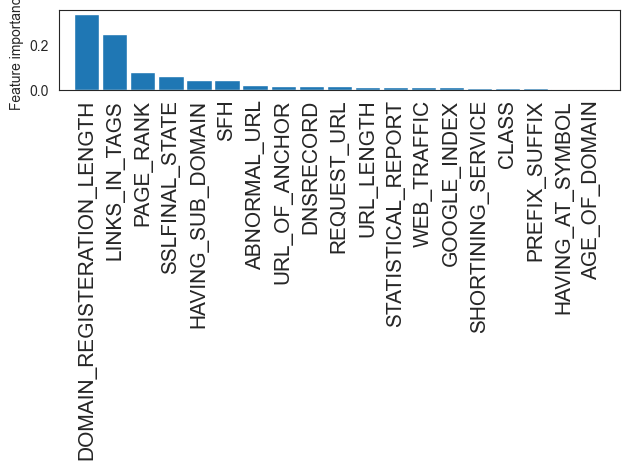

In [113]:
### Random Forest Classifier can be used for feature selection in machine learning. 
#Feature selection is the process of selecting the most relevant features 
#from a dataset to improve the performance of a machine learning model.

from sklearn.ensemble import RandomForestClassifier



forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(train_X3, train_y3)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

plt.ylabel('Feature importance')
plt.rcParams["figure.autolayout"] = True

plt.bar(range(train_X3.shape[1]),importances[indices],align='center',width=0.9)
plt.rcParams["figure.figsize"]=(20,20)
feat_labels = Filtered_df.columns[1:]
plt.xticks(range(train_X3.shape[1]), feat_labels[indices], rotation=90,fontsize=15)
plt.yticks(fontsize=10)
plt.xlim([-1, train_X3.shape[1]])

plt.tight_layout()
#plt.savefig('feature-importance.pdf', dpi=300)
plt.show()

In [114]:
indices = np.argsort(importances)[::-1]
print(np.round(importances[indices],4))



[0.3444 0.2526 0.0818 0.0631 0.0453 0.0435 0.0216 0.0204 0.0182 0.0172
 0.015  0.0141 0.0141 0.0133 0.0091 0.007  0.0069 0.0065 0.006 ]


In [115]:
filter_importance=[]
for i in importances[indices]:
    if i>=0.02:
        filter_importance.append(i)
        
        
print(np.round(filter_importance,4))
        
        

[0.3444 0.2526 0.0818 0.0631 0.0453 0.0435 0.0216 0.0204]


In [116]:
RF_Selected_df=df1[['DOMAIN_REGISTERATION_LENGTH','LINKS_IN_TAGS','PAGE_RANK','SSLFINAL_STATE','SFH','HAVING_SUB_DOMAIN','ABNORMAL_URL','URL_OF_ANCHOR','CLASS']]
RF_Selected_df.head()

DOMAIN_REGISTERATION_LENGTH  LINKS_IN_TAGS  PAGE_RANK  SSLFINAL_STATE  SFH  \
0                           -1              1         -1              -1   -1   
1                           -1             -1         -1               1   -1   
2                           -1             -1         -1              -1   -1   
3                            1              0         -1              -1   -1   
4                           -1              0         -1               1   -1   

   HAVING_SUB_DOMAIN  ABNORMAL_URL  URL_OF_ANCHOR  CLASS  
0                 -1            -1             -1      0  
1                  0             1              0      0  
2                 -1            -1              0      0  
3                 -1             1              0      0  
4                  1             1              0      1

In [117]:
X4=RF_Selected_df.iloc[:,0:8]
X4

DOMAIN_REGISTERATION_LENGTH  LINKS_IN_TAGS  PAGE_RANK  SSLFINAL_STATE  \
0                               -1              1         -1              -1   
1                               -1             -1         -1               1   
2                               -1             -1         -1              -1   
3                                1              0         -1              -1   
4                               -1              0         -1               1   
...                            ...            ...        ...             ...   
11050                           -1              1         -1               1   
11051                           -1             -1          1              -1   
11052                           -1             -1         -1              -1   
11053                            1              1         -1              -1   
11054                            1              0         -1              -1   

       SFH  HAVING_SUB_DOMAIN  ABNORMAL_URL  URL_OF_ANCHOR  
0       -1                 -1            -1             -1  
1       -1                  0             1              0  
2       -1                 -1            -1              0  
3       -1                 -1             1              0  
4       -1                  1             1              0  
...    ...                ...           ...            ...  
11050   -1                  1             1              1  
11051    0                  1            -1             -1  
11052   -1                  1             1              0  
11053   -1                 -1             1             -1  
11054   -1                 -1             1             -1  

[11055 rows x 8 columns]

In [118]:
y4=RF_Selected_df.iloc[:,8]
y4

0        0
1        0
2        0
3        0
4        1
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: CLASS, Length: 11055, dtype: int64

In [119]:
train_X4=X4.iloc[0:7738,0:8]
train_X4.head()

DOMAIN_REGISTERATION_LENGTH  LINKS_IN_TAGS  PAGE_RANK  SSLFINAL_STATE  SFH  \
0                           -1              1         -1              -1   -1   
1                           -1             -1         -1               1   -1   
2                           -1             -1         -1              -1   -1   
3                            1              0         -1              -1   -1   
4                           -1              0         -1               1   -1   

   HAVING_SUB_DOMAIN  ABNORMAL_URL  URL_OF_ANCHOR  
0                 -1            -1             -1  
1                  0             1              0  
2                 -1            -1              0  
3                 -1             1              0  
4                  1             1              0

In [120]:
test_X4=X4.iloc[7738:,0:8]
test_X4

DOMAIN_REGISTERATION_LENGTH  LINKS_IN_TAGS  PAGE_RANK  SSLFINAL_STATE  \
7738                             1              1          1              -1   
7739                             1              0          1              -1   
7740                            -1              1          1               1   
7741                            -1             -1         -1               0   
7742                            -1              0          1              -1   
...                            ...            ...        ...             ...   
11050                           -1              1         -1               1   
11051                           -1             -1          1              -1   
11052                           -1             -1         -1              -1   
11053                            1              1         -1              -1   
11054                            1              0         -1              -1   

       SFH  HAVING_SUB_DOMAIN  ABNORMAL_URL  URL_OF_ANCHOR  
7738    -1                  0             1             -1  
7739     0                  0             1             -1  
7740    -1                  1            -1              1  
7741    -1                  1             1             -1  
7742    -1                  0             1              0  
...    ...                ...           ...            ...  
11050   -1                  1             1              1  
11051    0                  1            -1             -1  
11052   -1                  1             1              0  
11053   -1                 -1             1             -1  
11054   -1                 -1             1             -1  

[3317 rows x 8 columns]

In [121]:
train_y4=df1.iloc[0:7738,30]
train_y4

0       0
1       0
2       0
3       0
4       1
       ..
7733    1
7734    1
7735    1
7736    1
7737    0
Name: CLASS, Length: 7738, dtype: int64

In [122]:
test_y4=df1.iloc[7738:,30]
test_y4

7738     0
7739     0
7740     1
7741     0
7742     0
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: CLASS, Length: 3317, dtype: int64

In [123]:


print("Training set has {} samples.".format(train_X4.shape[0]))
print("Testing set has {} samples.".format(test_X4.shape[0]))
print('Printing shape of train_X4,train_Y4,test_X4,test_Y4')
train_X4.shape,train_y4.shape,test_X4.shape,test_y4.shape

Training set has 7738 samples.
Testing set has 3317 samples.
Printing shape of train_X4,train_Y4,test_X4,test_Y4


((7738, 8), (7738,), (3317, 8), (3317,))

In [124]:
#to store model  performance 

ml_model4_Train = []
accuracy4_Train = []
f1_score4_Train = []
recall4_Train = []
precision4_Train = []
#function to call for storing the results

def storeResults4_Train(model4,a,b,c,d):
    ml_model4_Train.append(model4)
    accuracy4_Train.append(round(a, 3))
    f1_score4_Train.append(round(b, 3))
    recall4_Train.append(round(c, 3))
    precision4_Train.append(round(d ,3))

In [125]:
#to store model  performance 

ml_model4_Test = []
accuracy4_Test = []
f1_score4_Test = []
recall4_Test = []
precision4_Test = []
#function to call for storing the results

def storeResults4_Test(model4,a,b,c,d):
    ml_model4_Test.append(model4)
    accuracy4_Test.append(round(a, 3))
    f1_score4_Test.append(round(b, 3))
    recall4_Test.append(round(c, 3))
    precision4_Test.append(round(d ,3))

# Model_1 Decision Tree Model

In [126]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier
# instantiate the model 
tree = DecisionTreeClassifier(max_depth=15)
# fit the model 
tree.fit(train_X4, train_y4)
#predicting the target value from the model for the samples
y_train_tree4 = tree.predict(train_X4)
y_test_tree4 = tree.predict(test_X4)


Decision Tree4 : Accuracy on training Data: 0.934
Decision Tree4 : Accuracy on test Data: 0.919

Decision Tree4 : f1_score on training Data: 0.942
Decision Tree4 : f1_score on test Data: 0.930

Decision Tree4 : Recall on training Data: 0.960
Decision Tree4 : Recall on test Data: 0.958

Decision Tree4 : precision on training Data: 0.925
Decision Tree4 : precision on test Data: 0.903
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1464
           1       0.90      0.96      0.93      1853

    accuracy                           0.92      3317
   macro avg       0.92      0.91      0.92      3317
weighted avg       0.92      0.92      0.92      3317



Text(0.5, 1990.5555555555557, 'Predicted')

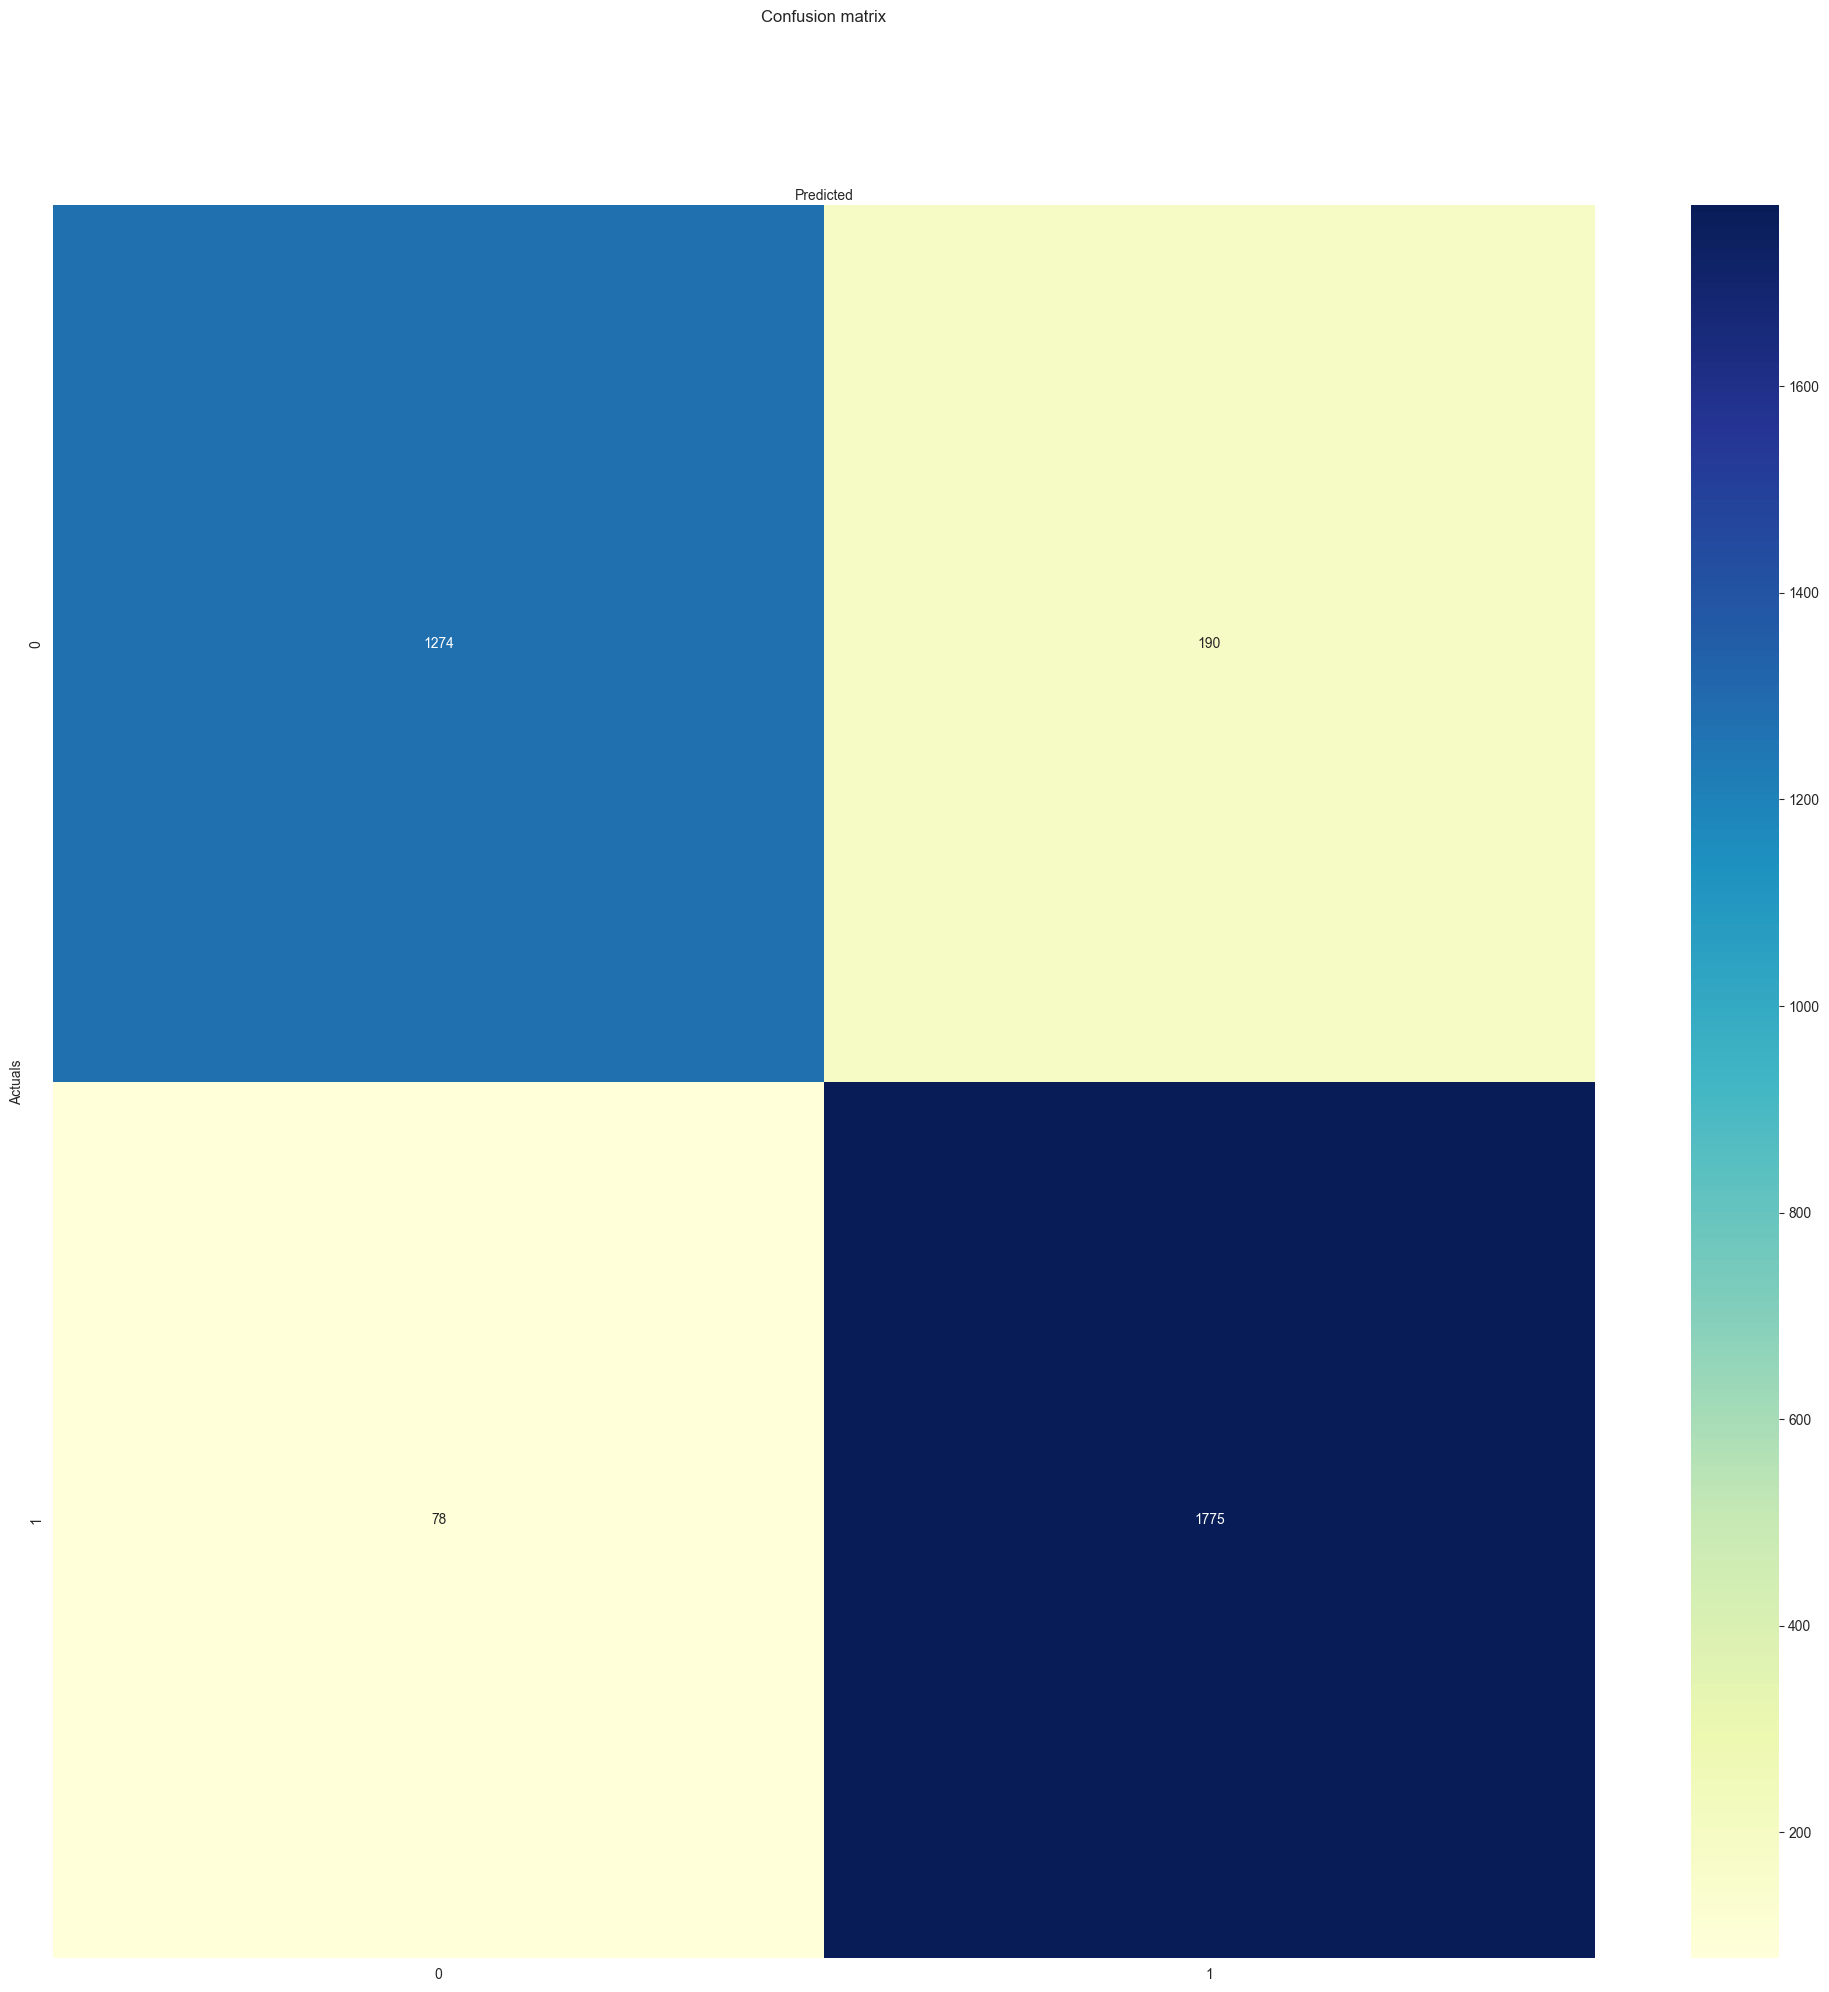

In [127]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier
# instantiate the model 
tree = DecisionTreeClassifier(max_depth=15)
# fit the model 
tree.fit(train_X4, train_y4)
#predicting the target value from the model for the samples
y_train_tree4 = tree.predict(train_X4)
y_test_tree4 = tree.predict(test_X4)

acc_train_tree4 = metrics.accuracy_score(train_y4,y_train_tree4)
acc_test_tree4 = metrics.accuracy_score(test_y4,y_test_tree4)
print("Decision Tree4 : Accuracy on training Data: {:.3f}".format(acc_train_tree4))
print("Decision Tree4 : Accuracy on test Data: {:.3f}".format(acc_test_tree4))
print()
f1_score_train_tree4 = metrics.f1_score(train_y4,y_train_tree4)
f1_score_test_tree4 = metrics.f1_score(test_y4,y_test_tree4)
print("Decision Tree4 : f1_score on training Data: {:.3f}".format(f1_score_train_tree4))
print("Decision Tree4 : f1_score on test Data: {:.3f}".format(f1_score_test_tree4))
print()
recall_score_train_tree4 = metrics.recall_score(train_y4,y_train_tree4)
recall_score_test_tree4 = metrics.recall_score(test_y4,y_test_tree4)
print("Decision Tree4 : Recall on training Data: {:.3f}".format(recall_score_train_tree4))
print("Decision Tree4 : Recall on test Data: {:.3f}".format(recall_score_test_tree4))
print()
precision_score_train_tree4 = metrics.precision_score(train_y4,y_train_tree4)
precision_score_test_tree4 = metrics.precision_score(test_y4,y_test_tree4)
print("Decision Tree4 : precision on training Data: {:.3f}".format(precision_score_train_tree4))
print("Decision Tree4 : precision on test Data: {:.3f}".format(precision_score_test_tree4))

print(metrics.classification_report(test_y4, y_test_tree4))

confusion_matrix = metrics.confusion_matrix(test_y4,y_test_tree4)
confusion_matrix

class_names = [0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')


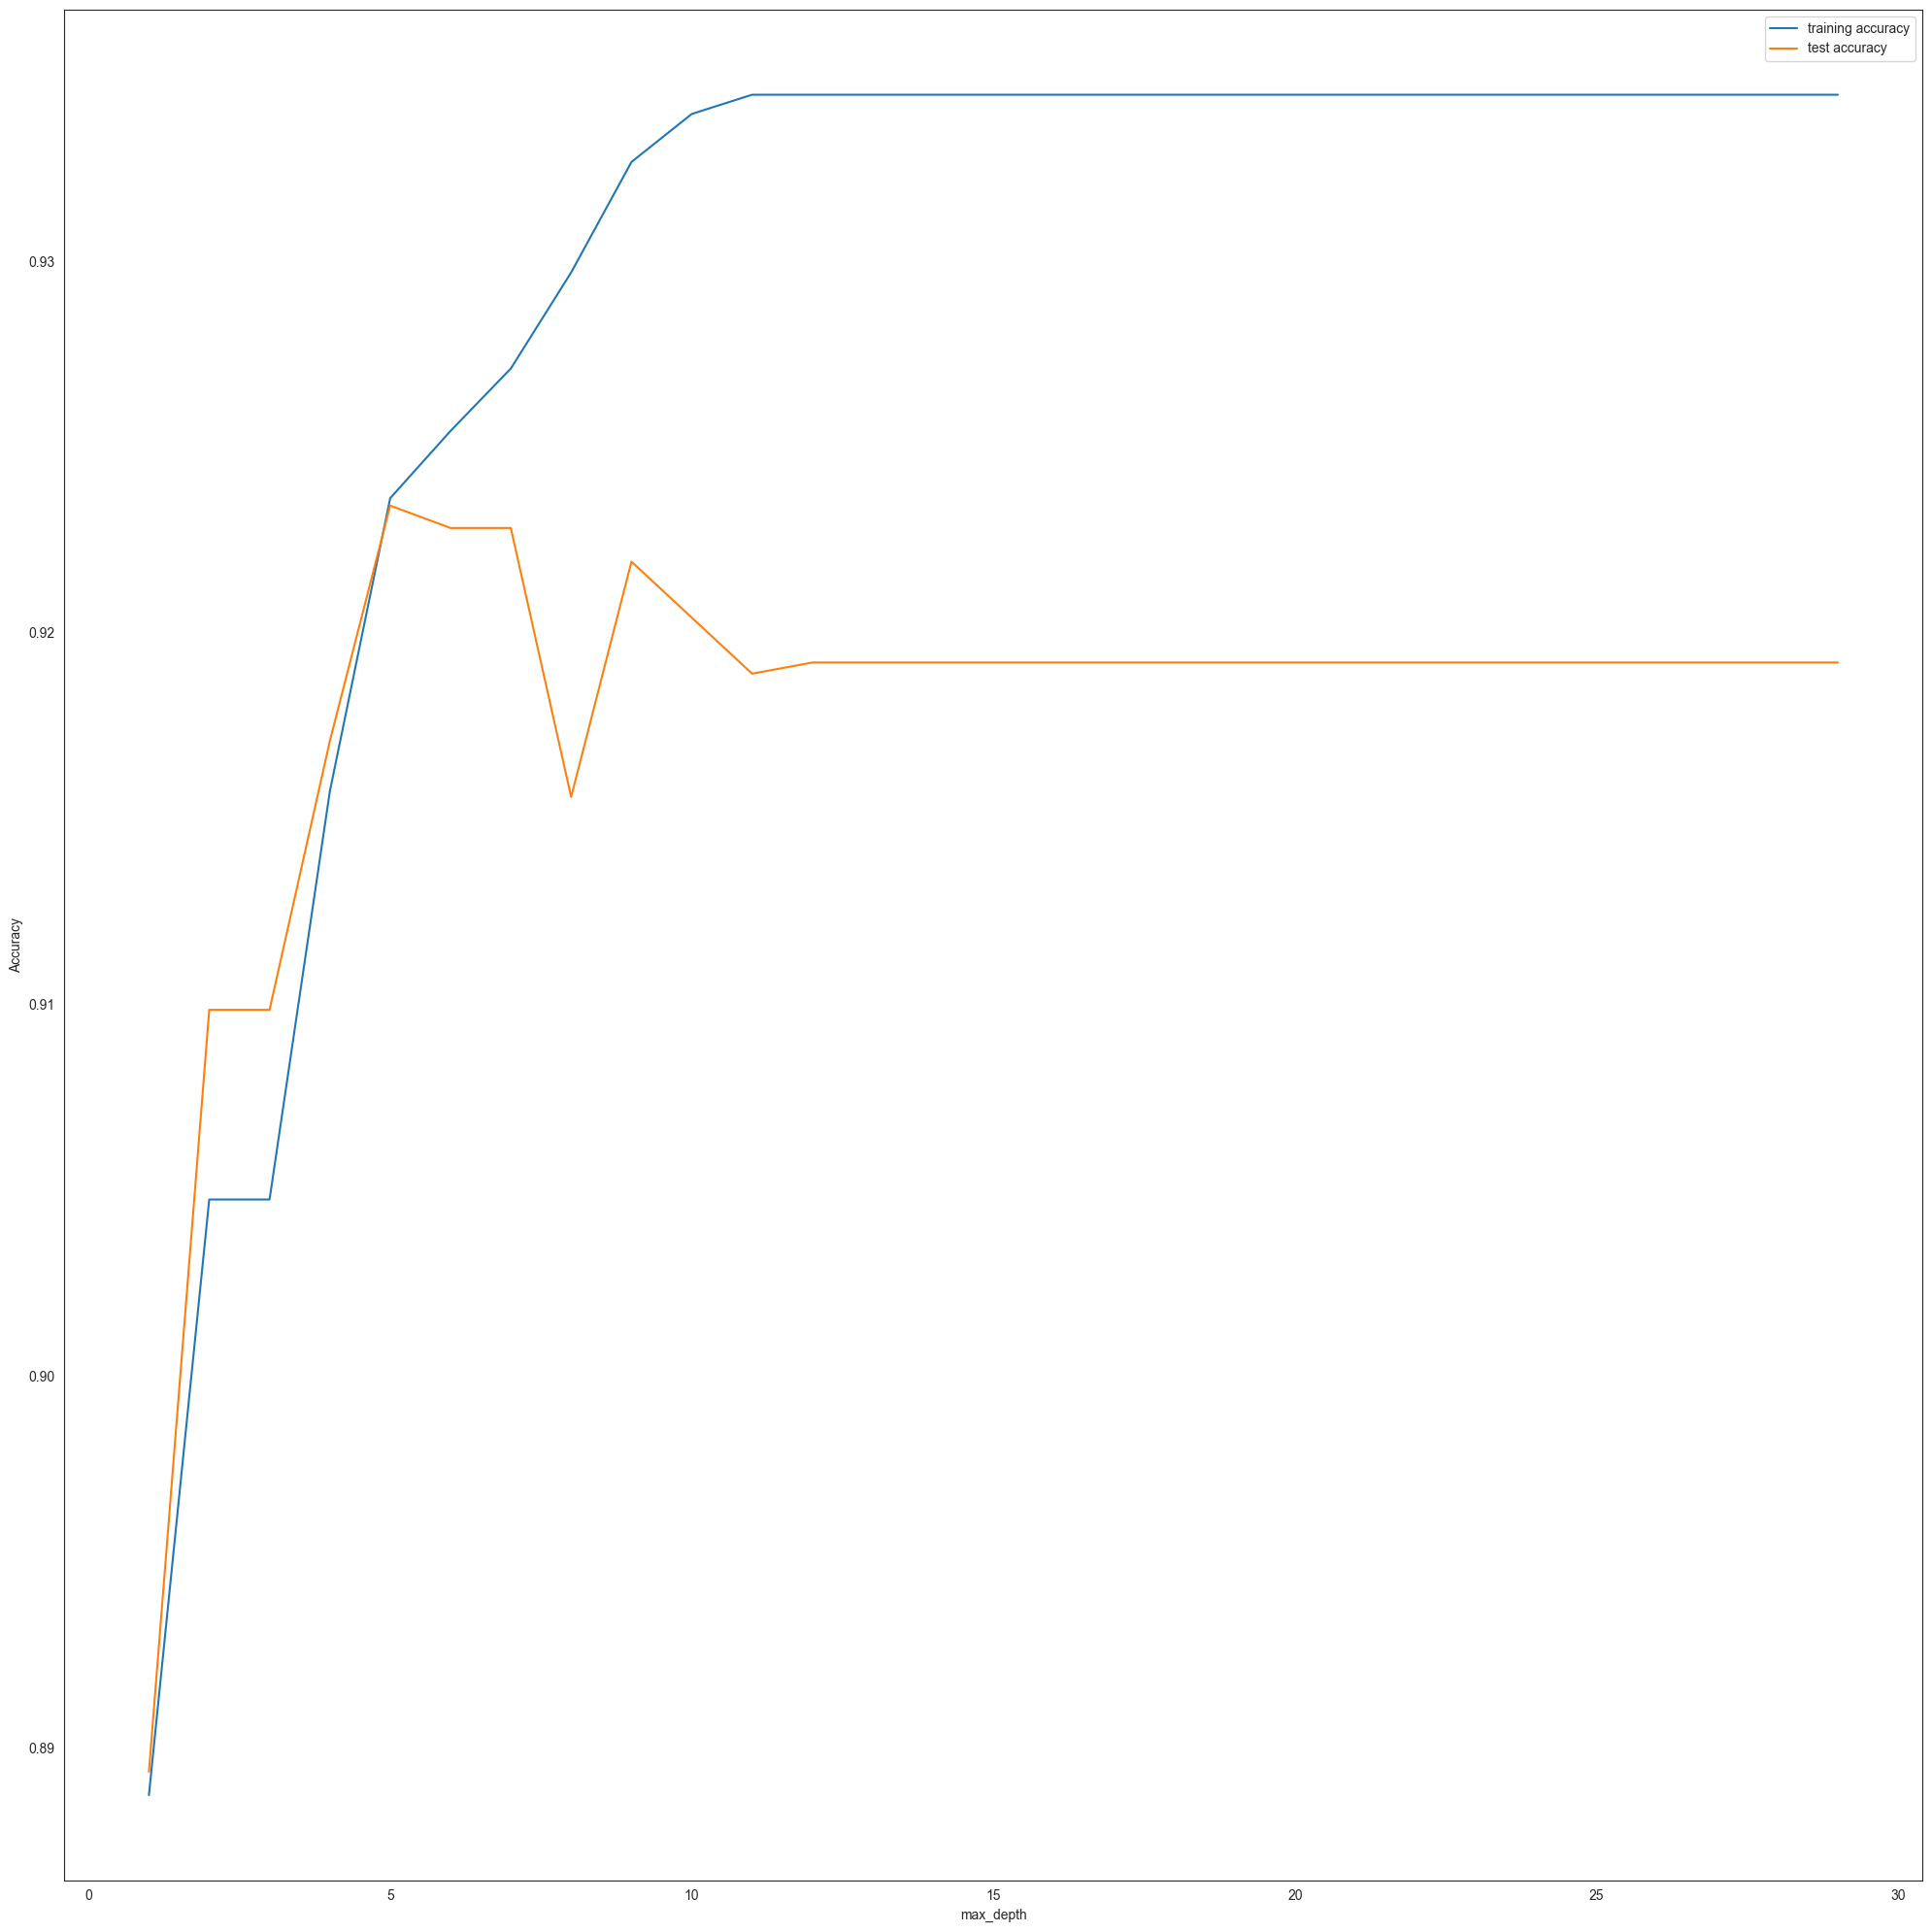

In [128]:
training_accuracy = []
test_accuracy = []

depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(train_X4, train_y4)
    # record training set accuracy
    training_accuracy.append(tree_test.score(train_X4, train_y4))
    # record generalization accuracy
    
    
    test_accuracy.append(tree_test.score(test_X4, test_y4))
    #plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

storeResults4_Train('Decision Tree4',acc_train_tree4,f1_score_train_tree4,
             recall_score_train_tree4,precision_score_train_tree4)

storeResults4_Test('Decision Tree4',acc_test_tree4,f1_score_test_tree4,
             recall_score_test_tree4,precision_score_test_tree4)

# 2  Random Forest : Classifier

Random Forest4 : Accuracy on training Data: 0.934
Random Forest4 : Accuracy on test Data: 0.921

Random Forest4 : f1_score on training Data: 0.942
Random Forest4 : f1_score on test Data: 0.931

Random Forest4 : Recall on training Data: 0.961
Random Forest4 : Recall on test Data: 0.957

Random Forest4 : precision on training Data: 0.923
Random Forest4 : precision on test Data: 0.903
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1464
           1       0.91      0.96      0.93      1853

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



Text(0.5, 1990.5555555555557, 'Predicted')

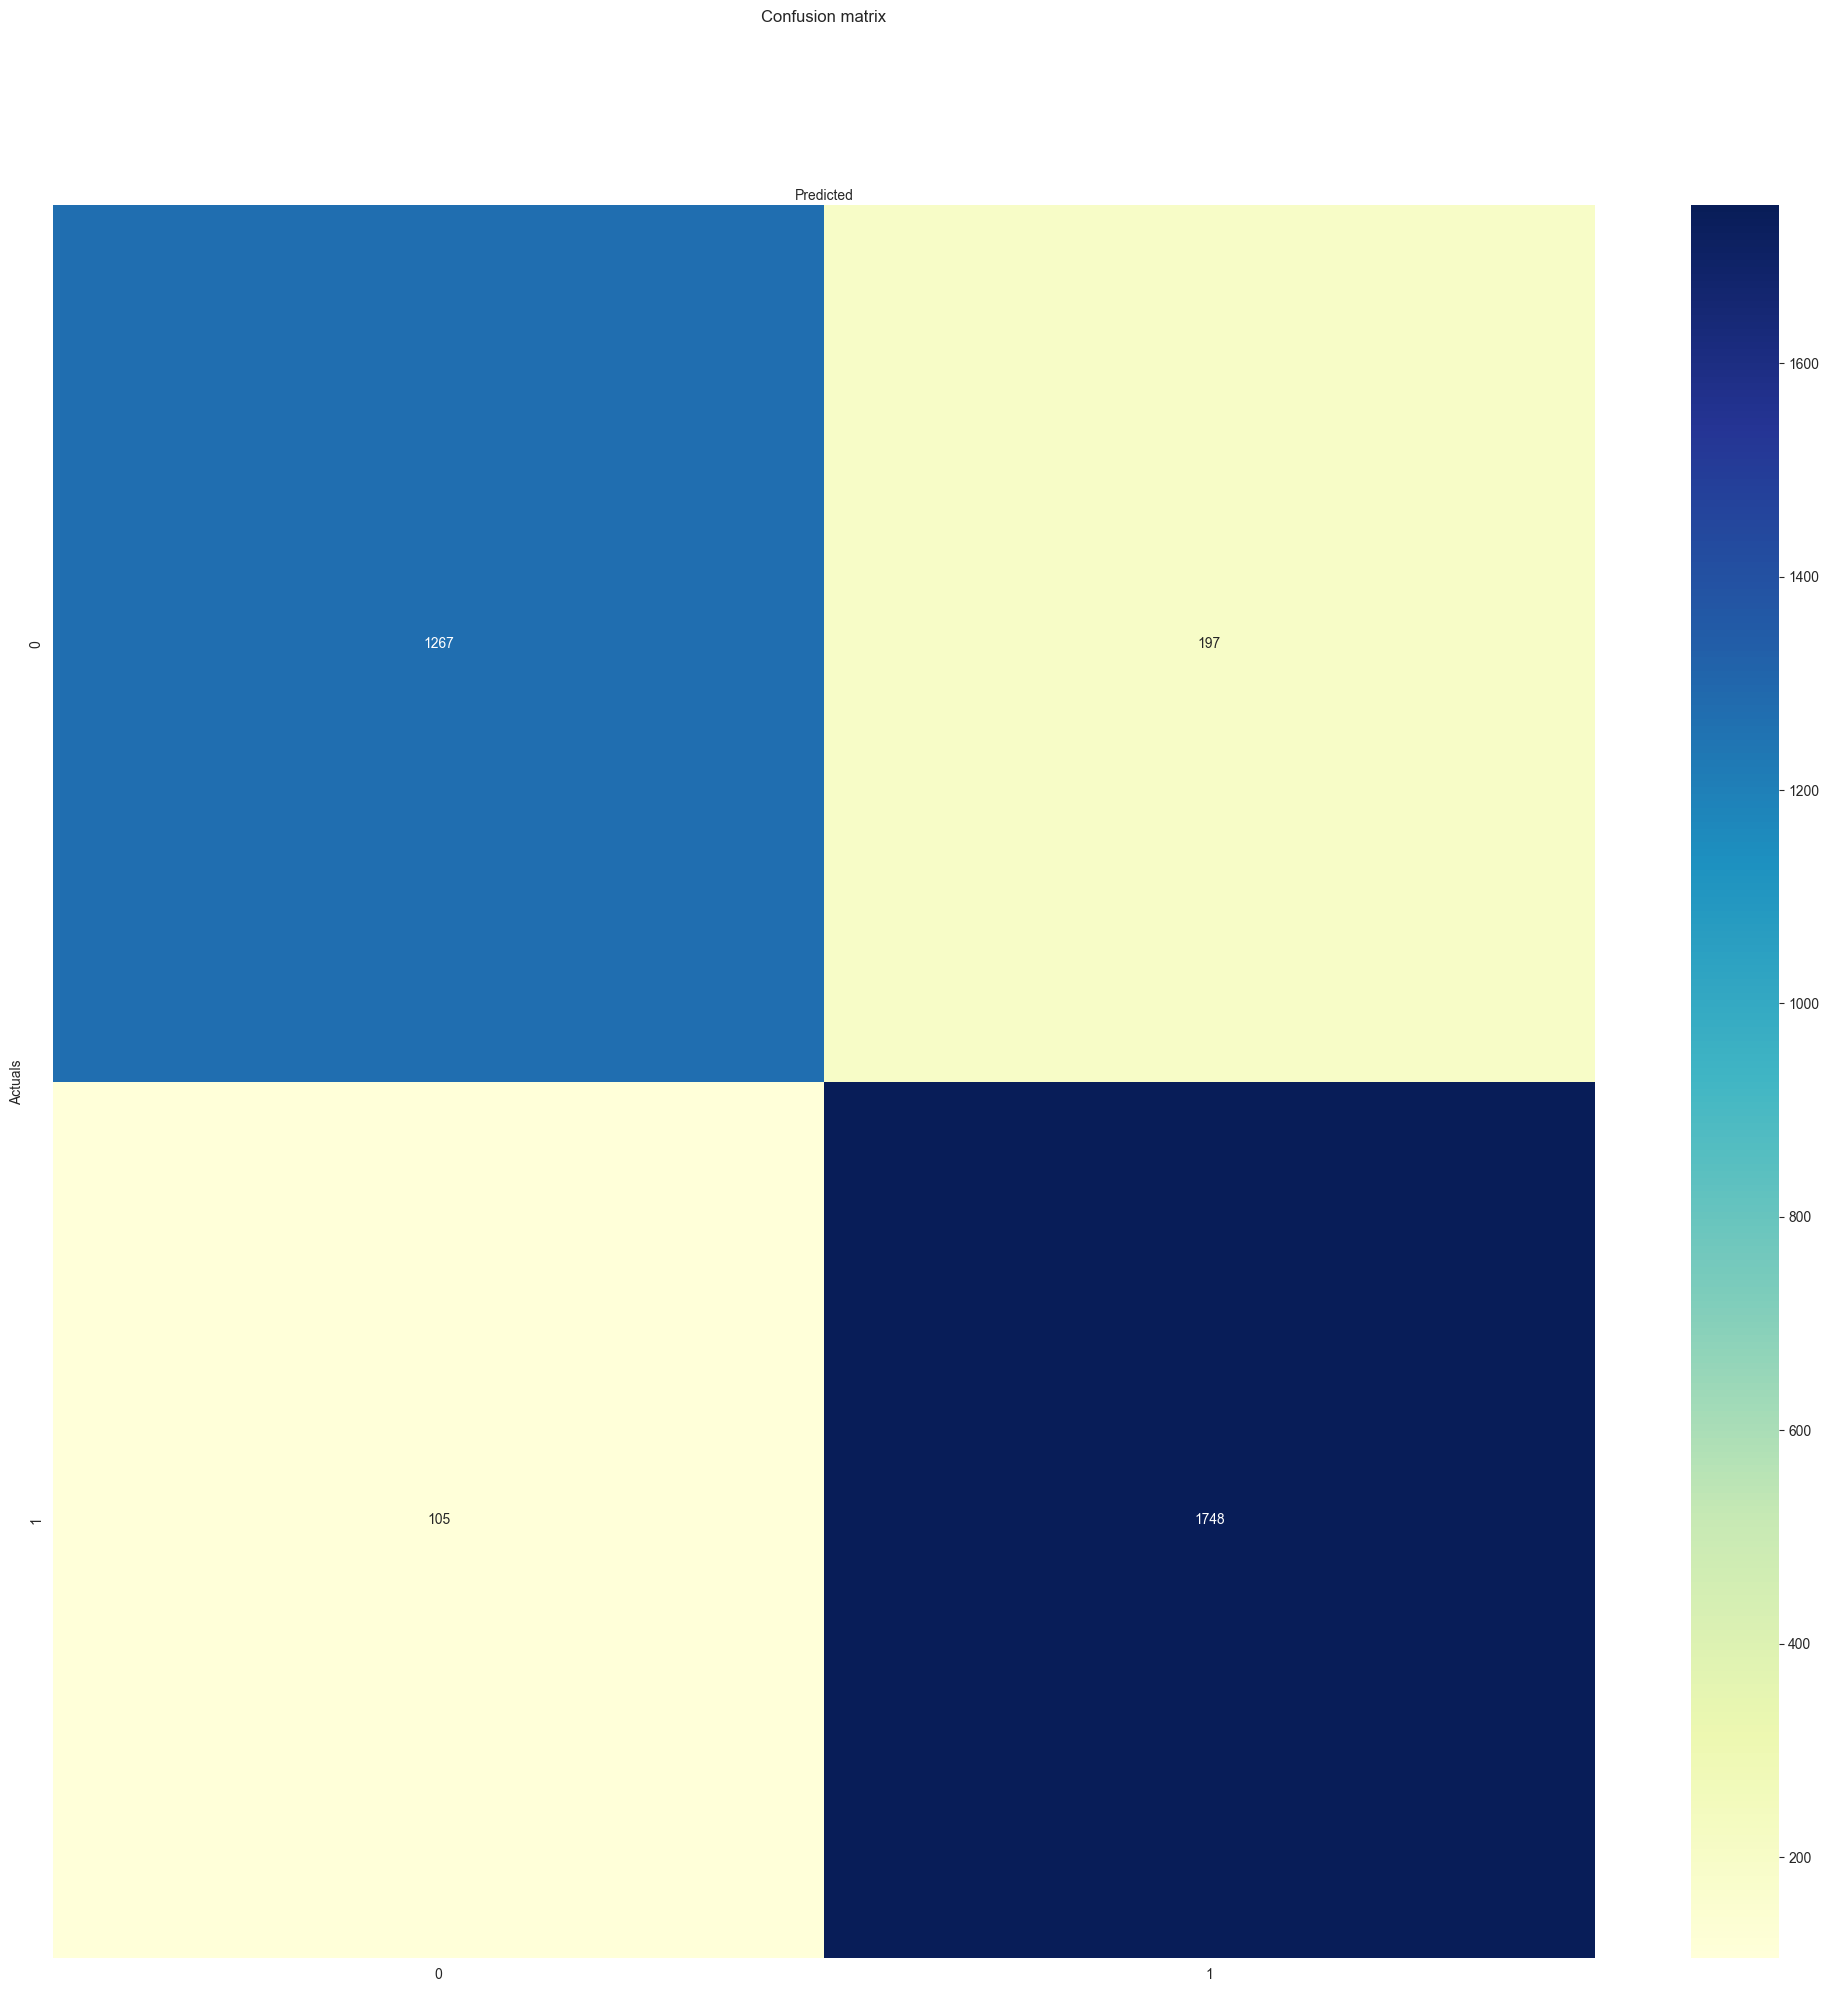

In [129]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)
# fit the model 
forest.fit(train_X4,train_y4)


# instantiate the model
forest = RandomForestClassifier(n_estimators=10)
# fit the model 
forest.fit(train_X4,train_y4)
y_train_forest4 = forest.predict(train_X4)
y_test_forest4 = forest.predict(test_X4)

acc_train_forest4 = metrics.accuracy_score(train_y4,y_train_forest4)
acc_test_forest4 = metrics.accuracy_score(test_y4,y_test_forest4)
print("Random Forest4 : Accuracy on training Data: {:.3f}".format(acc_train_forest4))
print("Random Forest4 : Accuracy on test Data: {:.3f}".format(acc_test_forest4))
print()
f1_score_train_forest4 = metrics.f1_score(train_y4,y_train_forest4)
f1_score_test_forest4 = metrics.f1_score(test_y4,y_test_forest4)
print("Random Forest4 : f1_score on training Data: {:.3f}".format(f1_score_train_forest4))
print("Random Forest4 : f1_score on test Data: {:.3f}".format(f1_score_test_forest4))
print()
recall_score_train_forest4 = metrics.recall_score(train_y4,y_train_forest4)
recall_score_test_forest4 = metrics.recall_score(test_y4,y_test_forest4)
print("Random Forest4 : Recall on training Data: {:.3f}".format(recall_score_train_forest4))
print("Random Forest4 : Recall on test Data: {:.3f}".format(recall_score_test_forest4))
print()
precision_score_train_forest4 = metrics.precision_score(train_y4,y_train_forest4)
precision_score_test_forest4 = metrics.precision_score(test_y4,y_test_tree4)
print("Random Forest4 : precision on training Data: {:.3f}".format(precision_score_train_forest4))
print("Random Forest4 : precision on test Data: {:.3f}".format(precision_score_test_forest4))

print(metrics.classification_report(test_y4, y_test_forest4))

confusion_matrix = metrics.confusion_matrix(test_y4,y_test_forest3)
confusion_matrix

class_names = [0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')


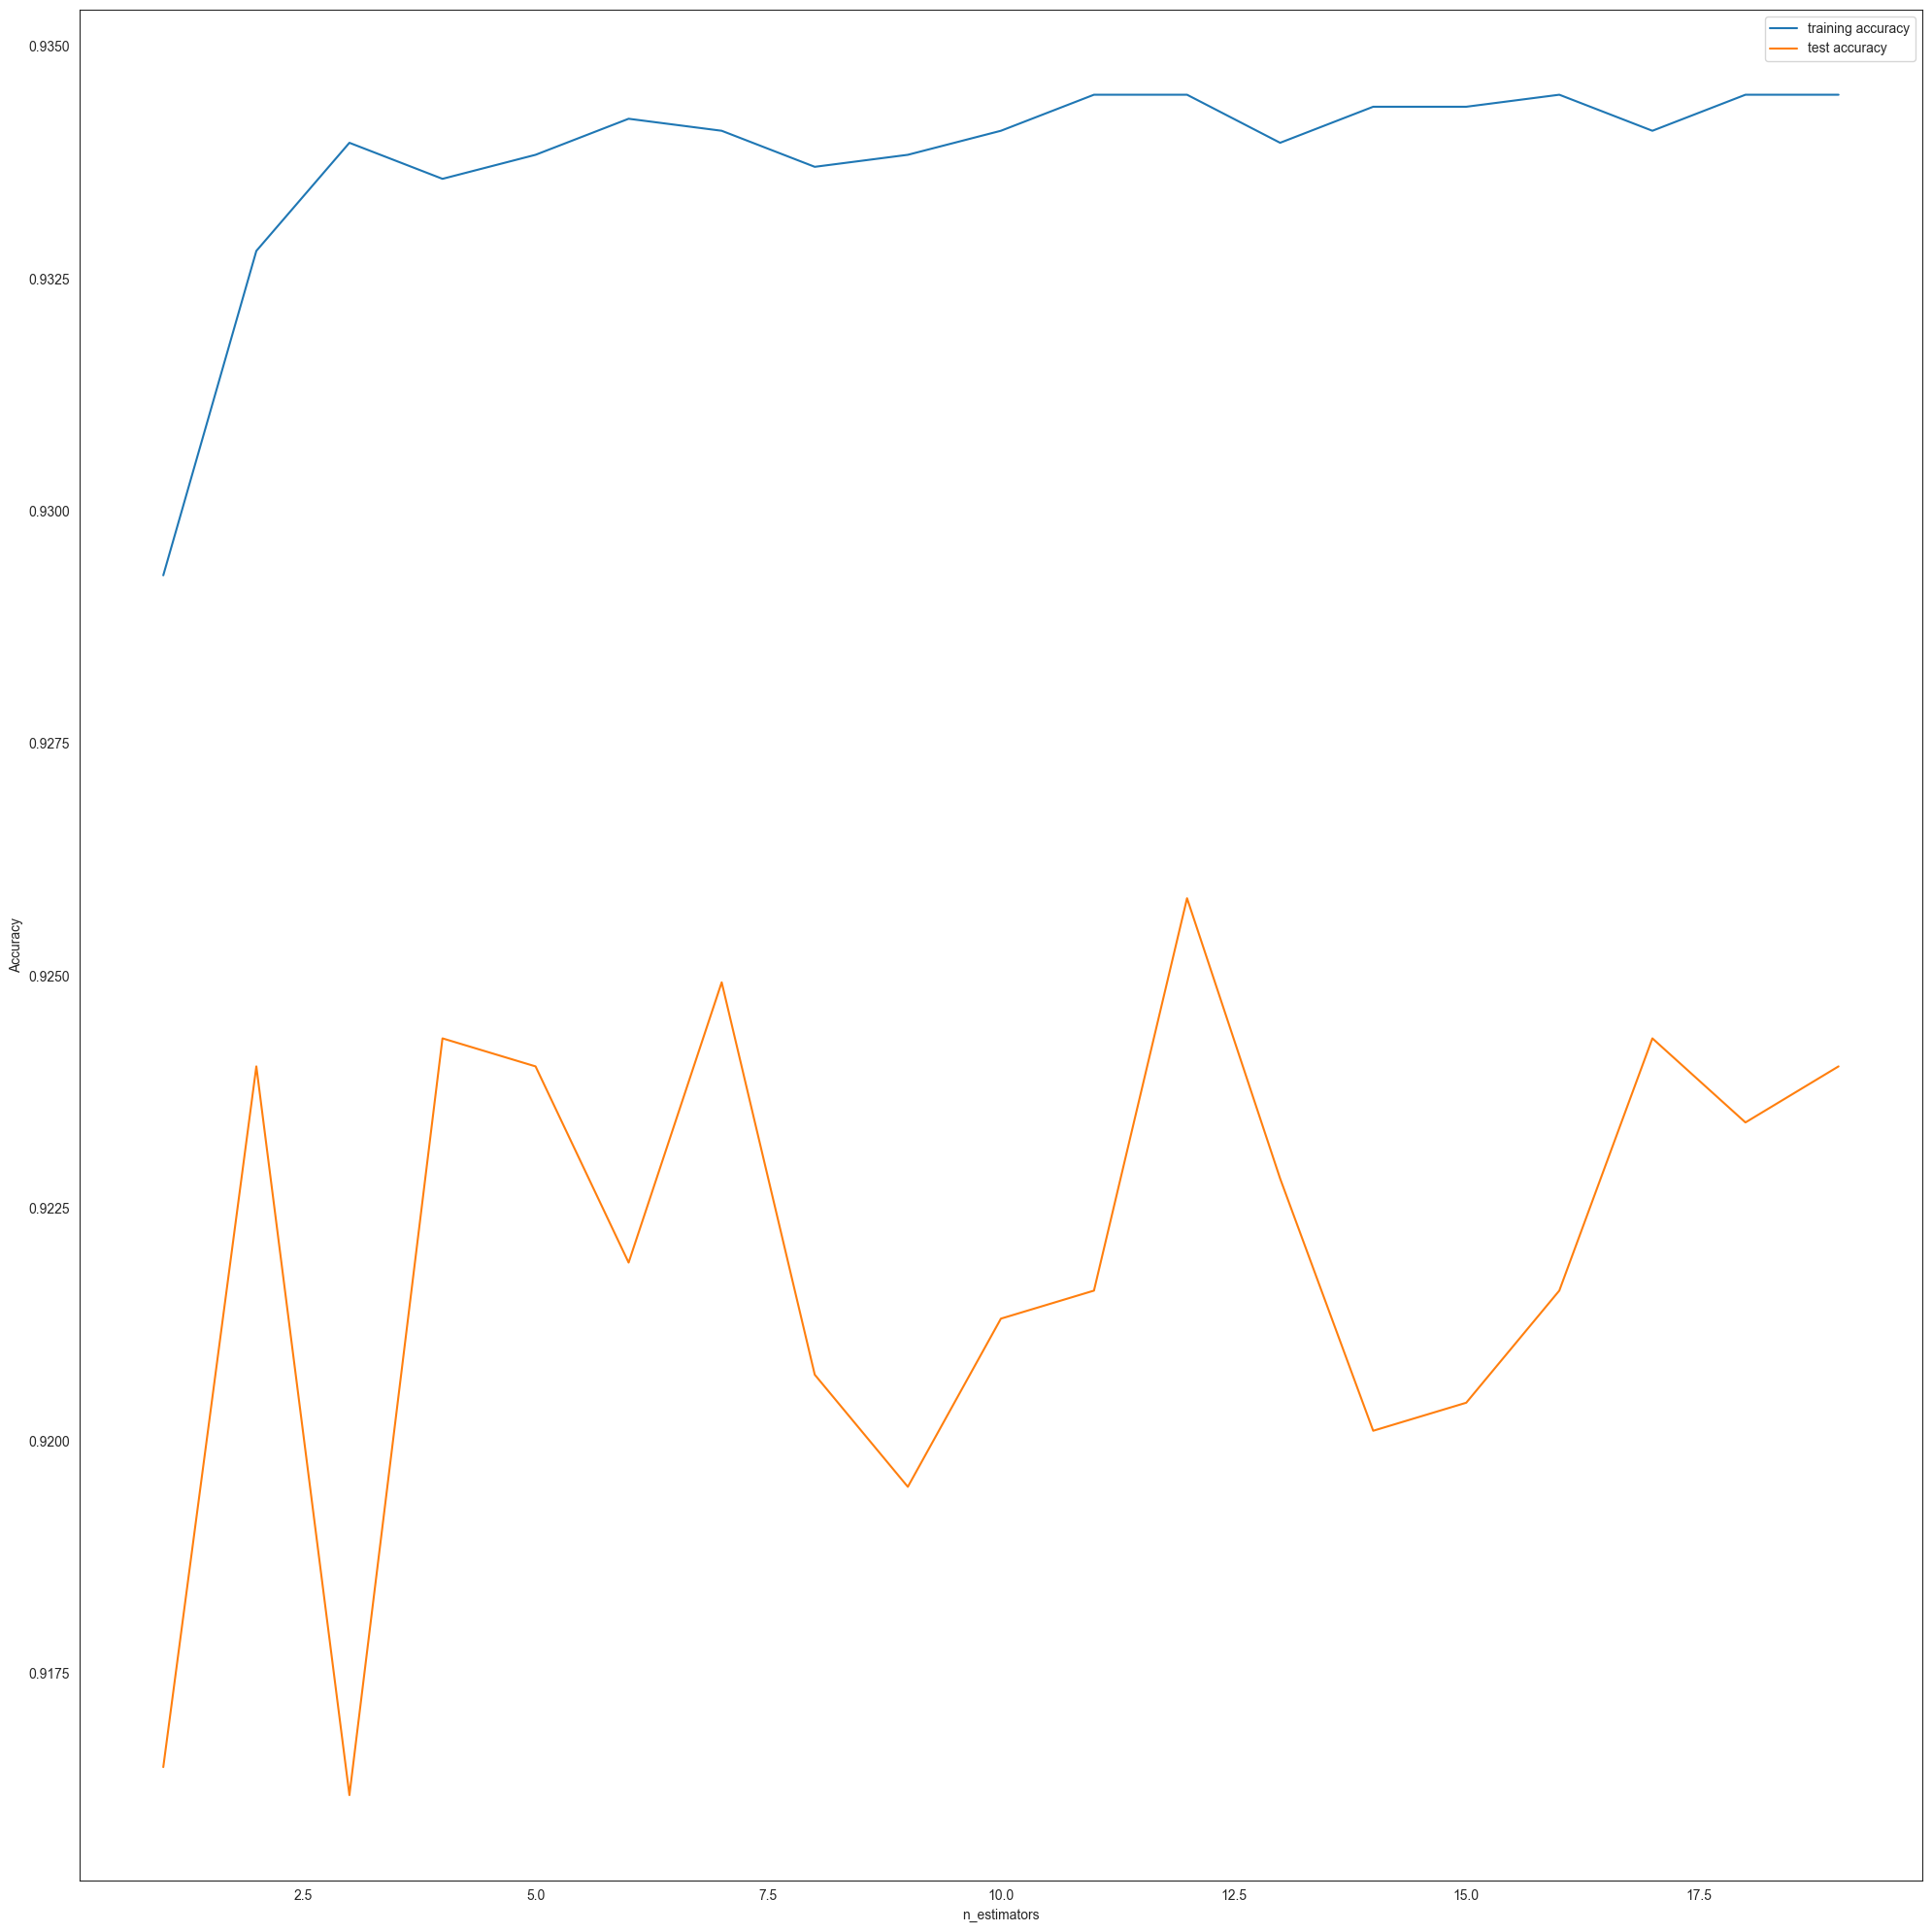

In [130]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(train_X4, train_y4)
    # record training set accuracy
    training_accuracy.append(forest_test.score(train_X4, train_y4))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(test_X4, test_y4))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

storeResults4_Train('Random Forest4',acc_train_forest4,f1_score_train_forest4,
             recall_score_train_forest4,precision_score_train_forest4)

storeResults4_Test('Random Forest4',acc_test_forest4,f1_score_test_forest4,
             recall_score_test_forest4,precision_score_test_forest4)

# Model_3 Gradient Boost

Gradient Boost4: Accuracy on training Data: 0.934
Gradient Boost4: Accuracy on test Data: 0.922

Gradient Boost4 : f1_score on training Data: 0.942
Gradient Boost4 : f1_score on test Data: 0.932

Gradient Boost4 : Recall on training Data: 0.962
Gradient Boost4 : Recall on test Data: 0.956

Gradient Boost4 : precision on training Data: 0.923
Gradient Boost4 : precision on test Data: 0.909
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1464
           1       0.91      0.96      0.93      1853

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



Text(0.5, 1990.5555555555557, 'Predicted')

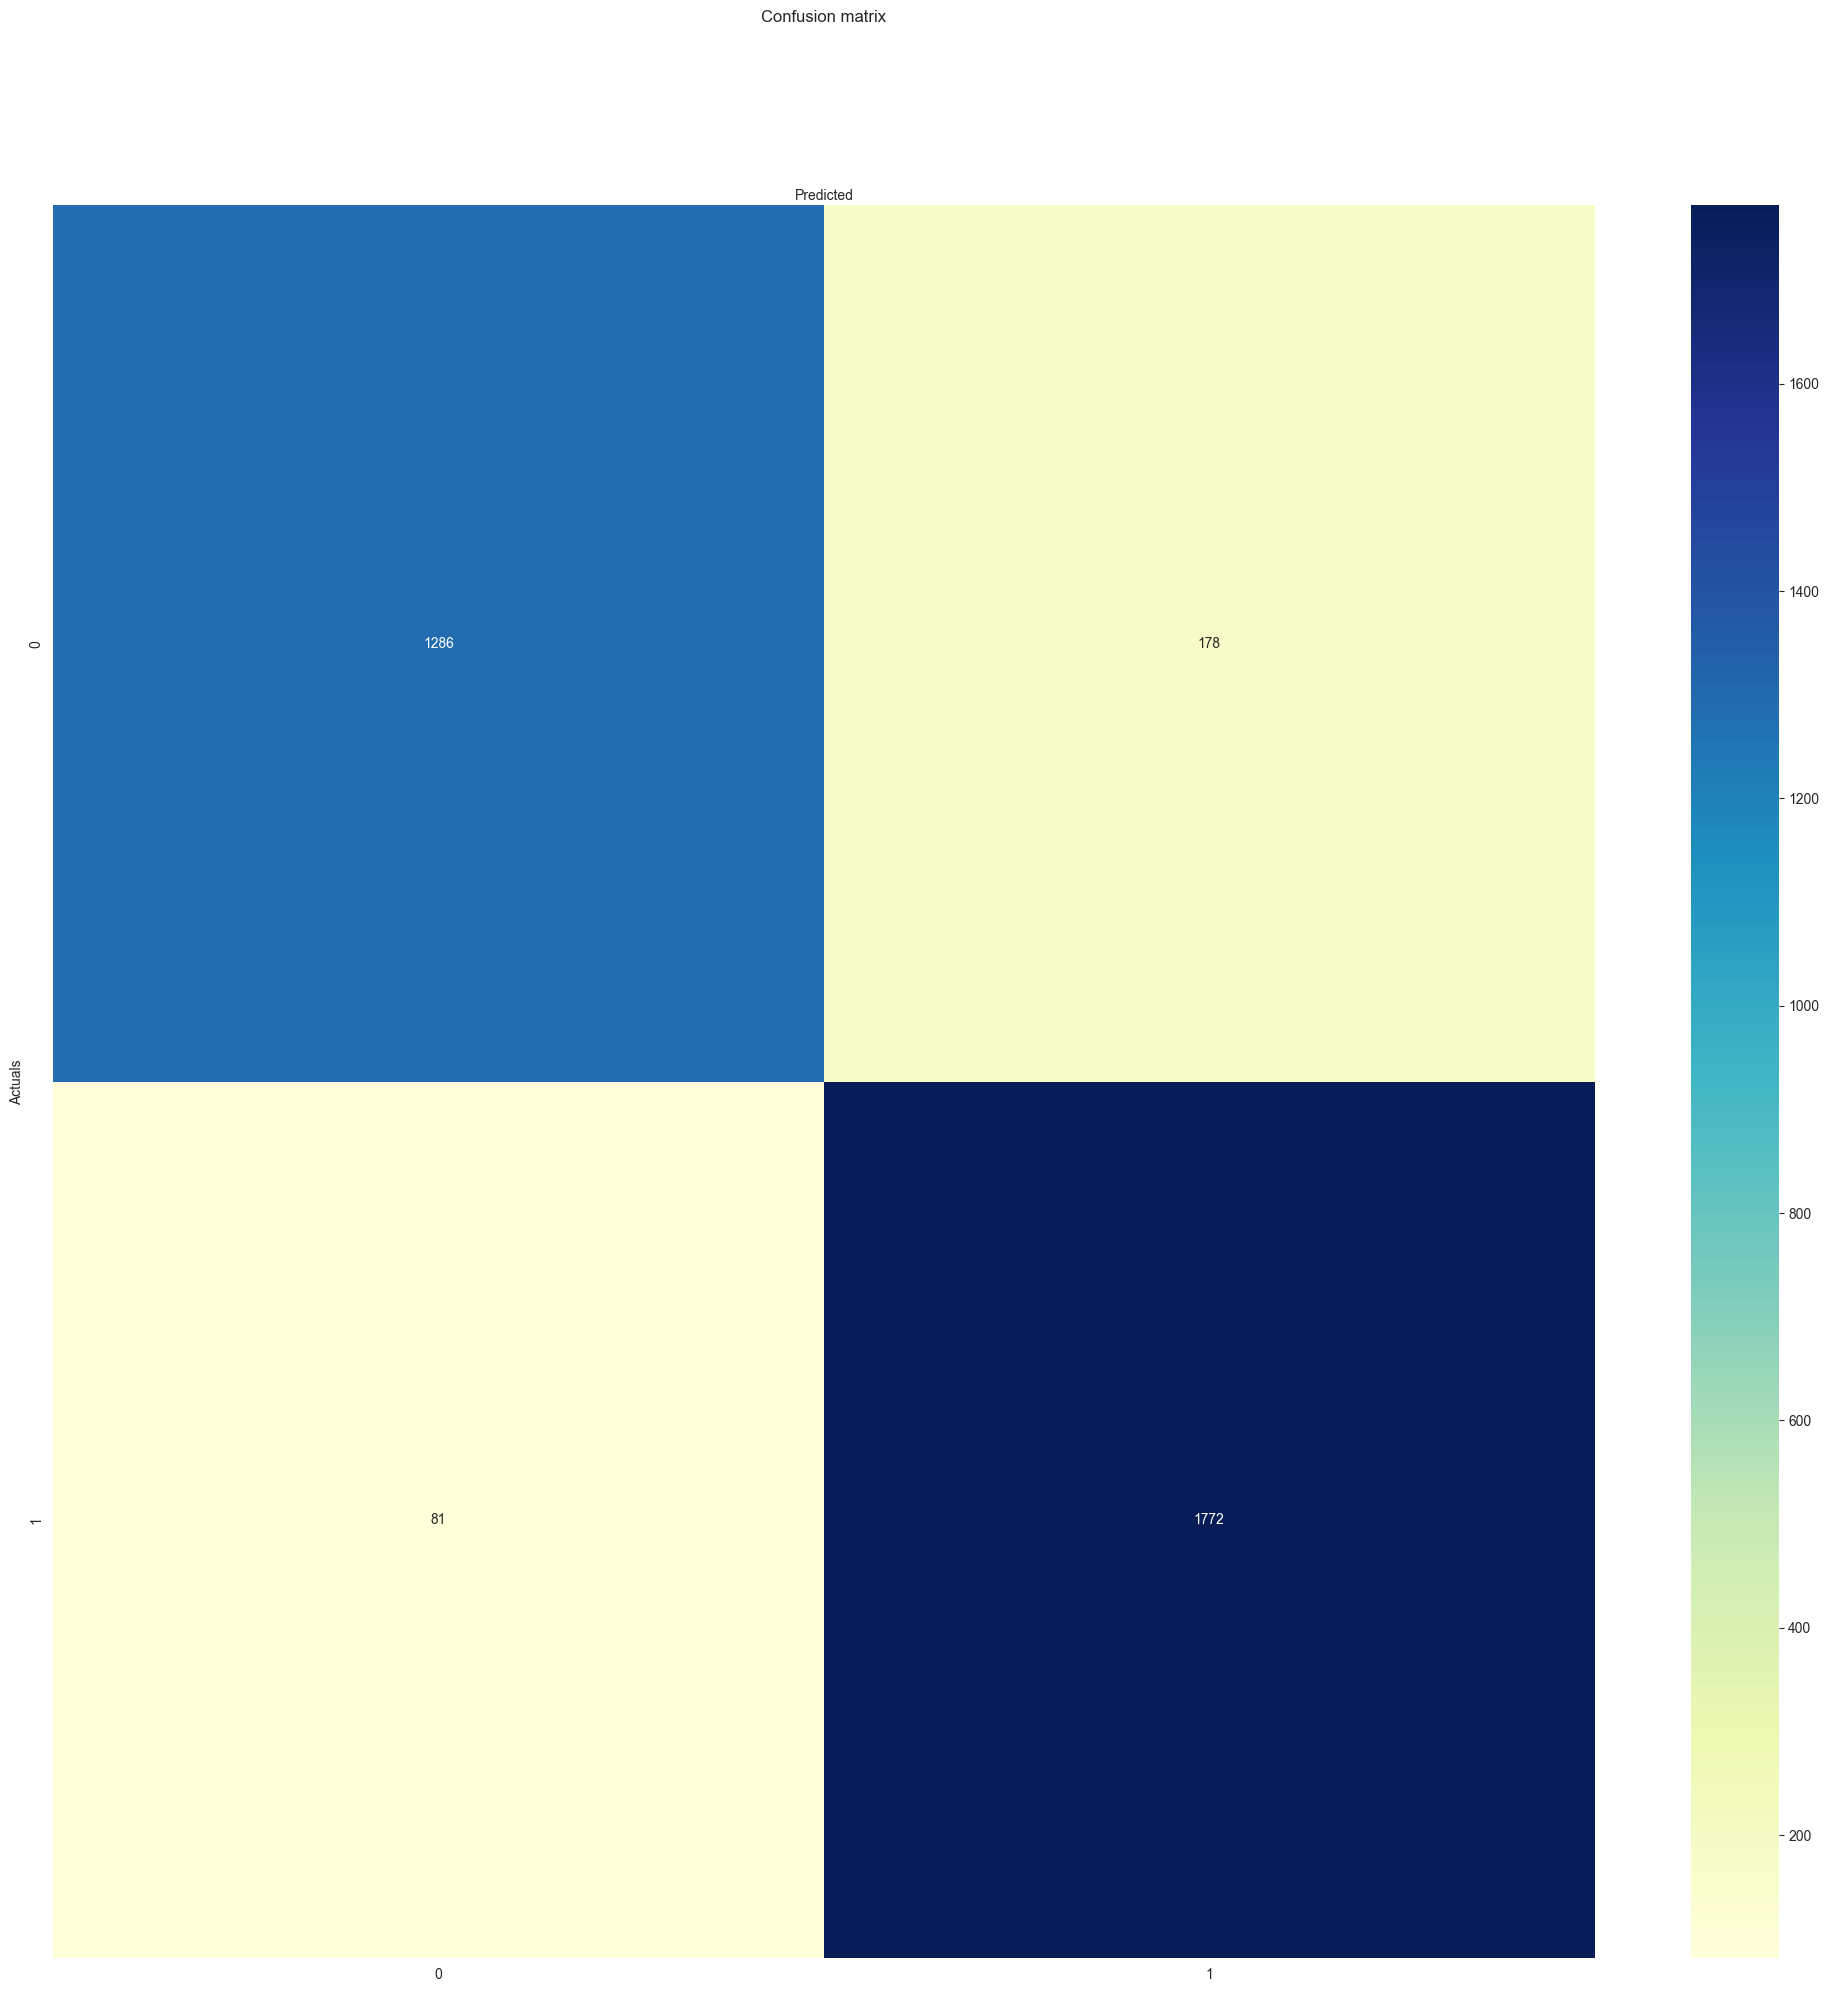

In [131]:
# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
# fit the model 
gbc.fit(train_X4,train_y4)
y_train_gbc4 = gbc.predict(train_X4)
y_test_gbc4 = gbc.predict(test_X4)

acc_train_gbc4 = metrics.accuracy_score(train_y4,y_train_gbc4)
acc_test_gbc4= metrics.accuracy_score(test_y4,y_test_gbc4)
print("Gradient Boost4: Accuracy on training Data: {:.3f}".format(acc_train_gbc4))
print("Gradient Boost4: Accuracy on test Data: {:.3f}".format(acc_test_gbc4))
print()
f1_score_train_gbc4 = metrics.f1_score(train_y4,y_train_gbc4)
f1_score_test_gbc4 = metrics.f1_score(test_y4,y_test_gbc4)
print("Gradient Boost4 : f1_score on training Data: {:.3f}".format(f1_score_train_gbc4))
print("Gradient Boost4 : f1_score on test Data: {:.3f}".format(f1_score_test_gbc4))
print()
recall_score_train_gbc4 = metrics.recall_score(train_y4,y_train_gbc4)
recall_score_test_gbc4 = metrics.recall_score(test_y4,y_test_gbc4)
print("Gradient Boost4 : Recall on training Data: {:.3f}".format(recall_score_train_gbc4))
print("Gradient Boost4 : Recall on test Data: {:.3f}".format(recall_score_test_gbc4))
print()
precision_score_train_gbc4 = metrics.precision_score(train_y4,y_train_gbc4)
precision_score_test_gbc4 = metrics.precision_score(test_y4,y_test_gbc4)
print("Gradient Boost4 : precision on training Data: {:.3f}".format(precision_score_train_gbc4))
print("Gradient Boost4 : precision on test Data: {:.3f}".format(precision_score_test_gbc4))

print(metrics.classification_report(test_y4, y_test_gbc4))

storeResults4_Train('Gradient Boost4 ',acc_train_gbc4,f1_score_train_gbc4,
             recall_score_train_gbc4,precision_score_train_gbc4)
storeResults4_Test('Gradient Boost4 ',acc_test_gbc4,f1_score_test_gbc4,
             recall_score_test_gbc4,precision_score_test_gbc4)


confusion_matrix = metrics.confusion_matrix(test_y4,y_test_gbc4)
confusion_matrix

class_names = [0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

# Model_4  Extreme Gradient Boosting

Extreme Gradient Boost: Accuracy on training Data: 0.934
Extreme Gradient Boost: Accuracy on test Data: 0.923

Extreme Gradient Boost : f1_score on training Data: 0.942
Extreme Gradient Boost : f1_score on test Data: 0.933

Extreme Gradient Boost : Recall on training Data: 0.963
Extreme Gradient Boost : Recall on test Data: 0.948

Extreme Gradient Boost : precision on training Data: 0.923
Extreme Gradient Boost : precision on test Data: 0.918
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1460
           1       0.92      0.95      0.93      1857

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



Text(0.5, 1990.5555555555557, 'Predicted')

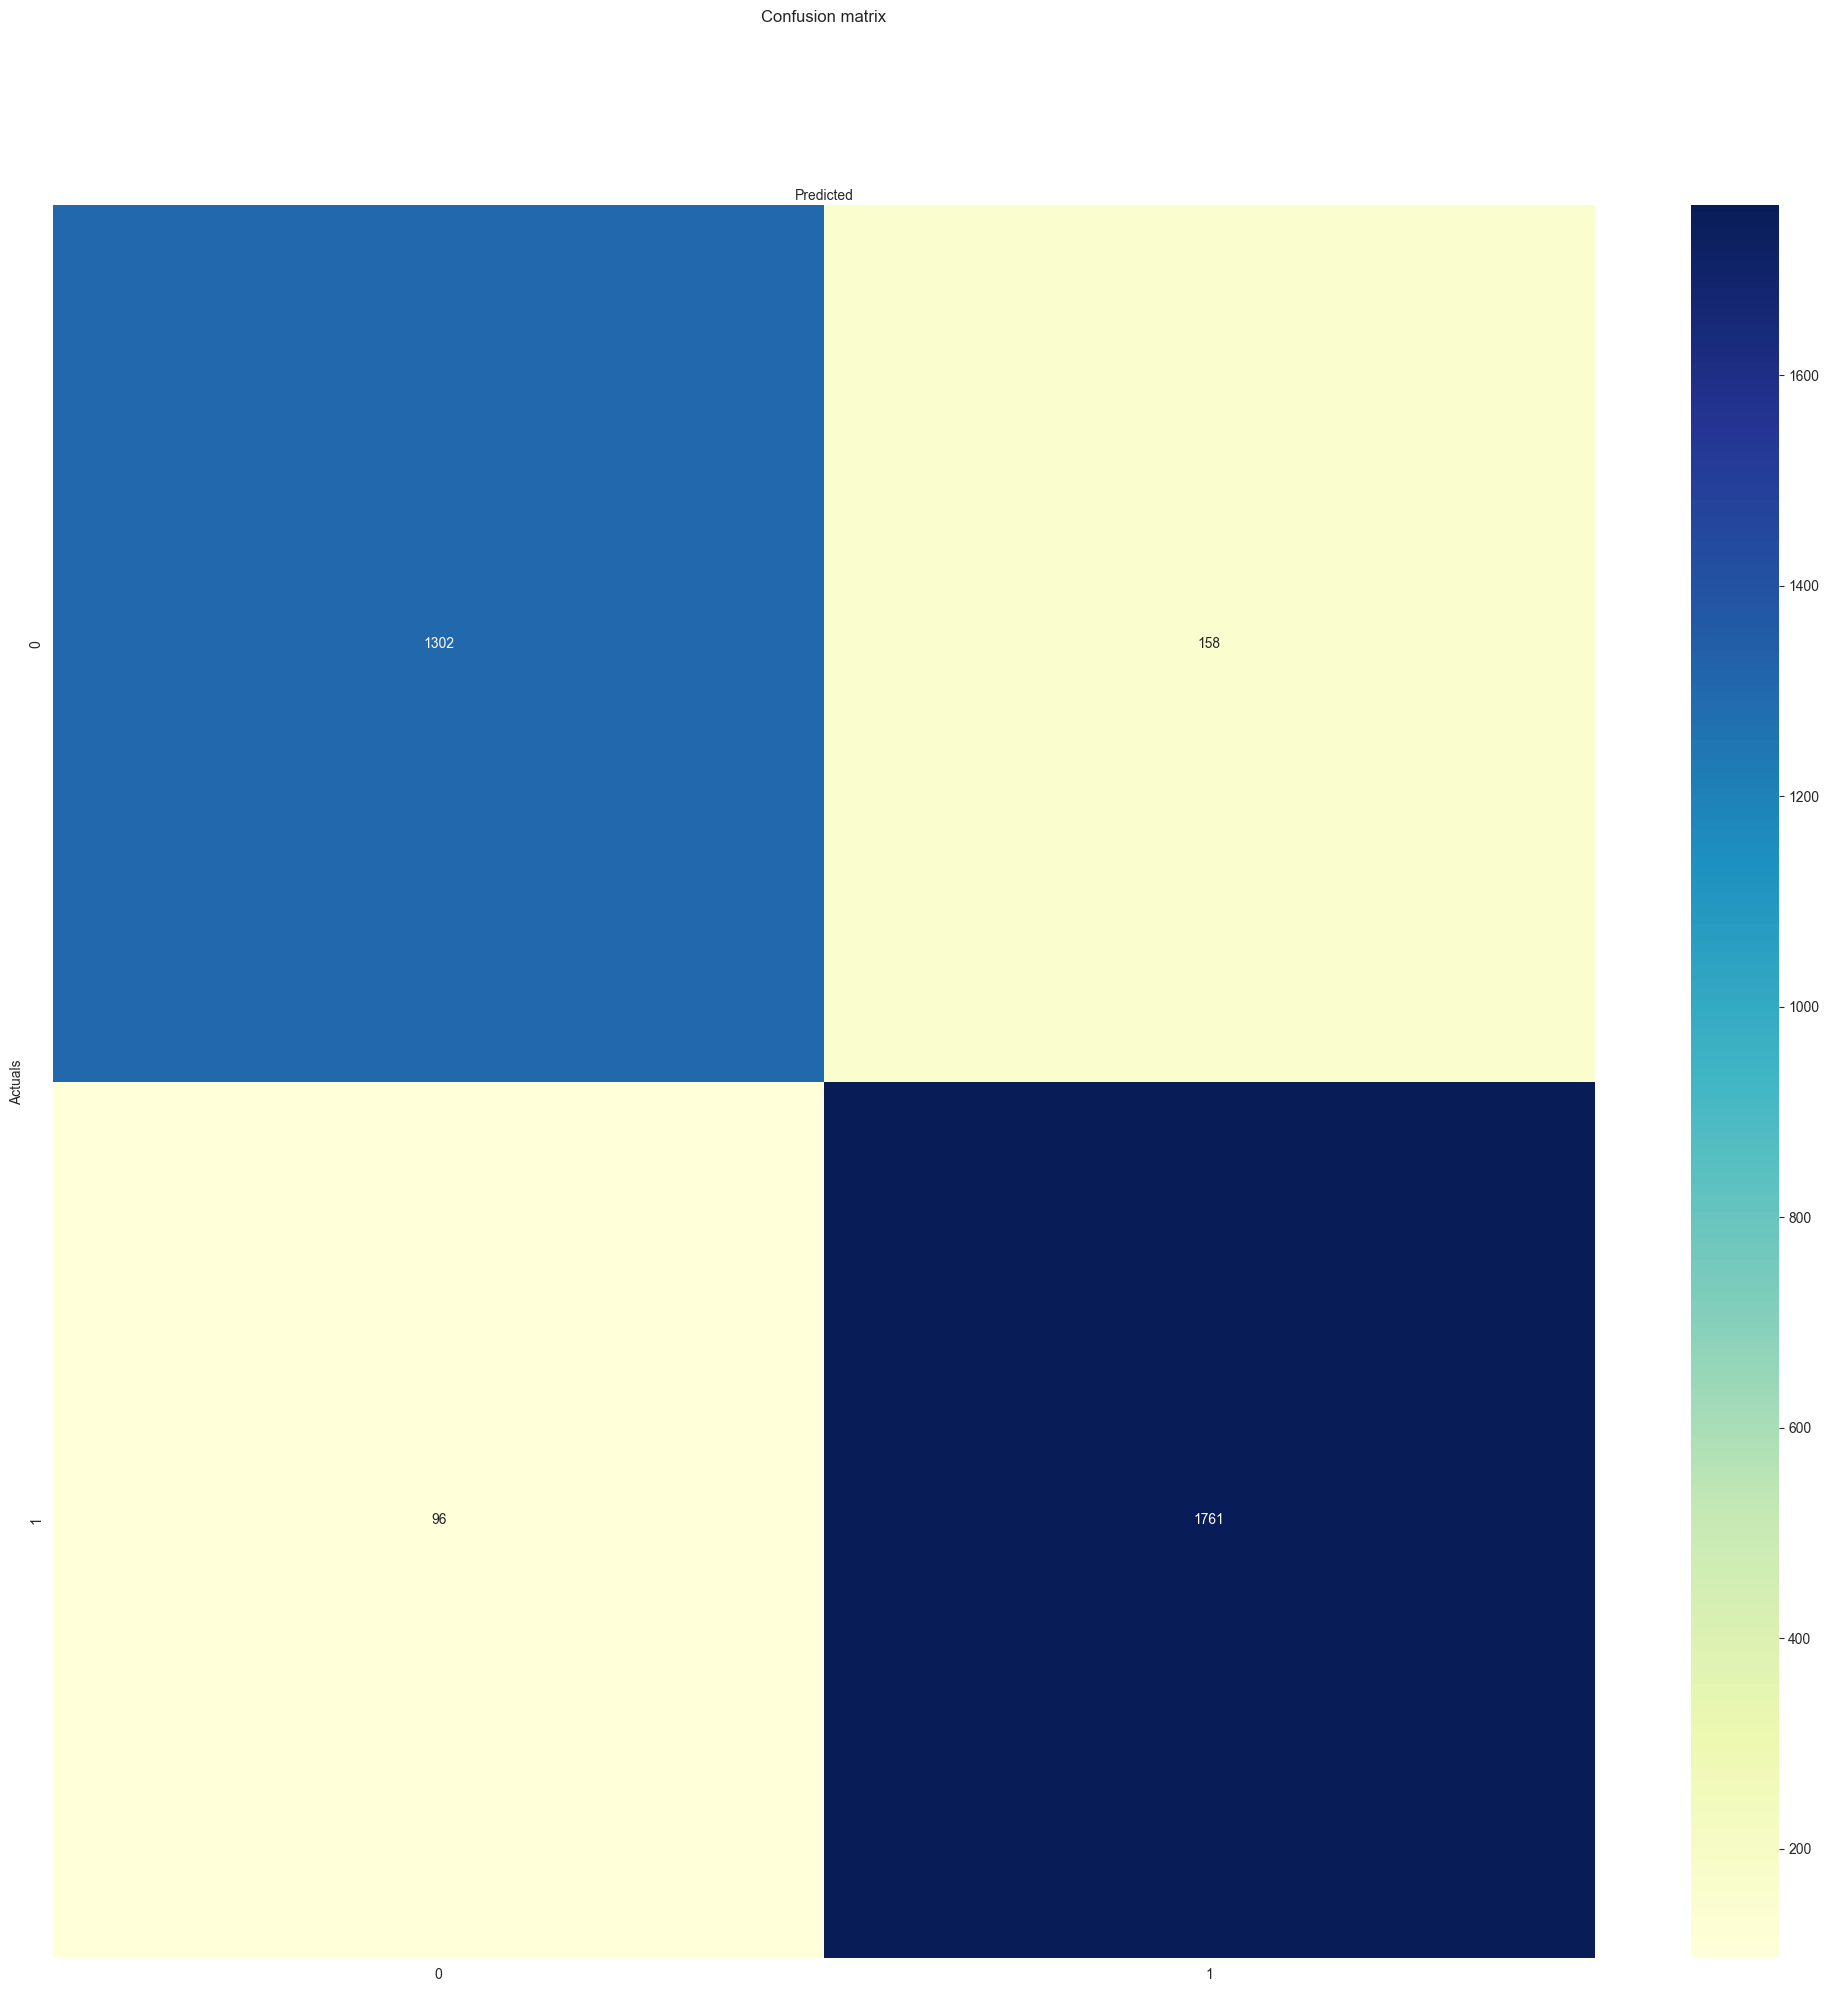

In [132]:
# split data into train and test sets
seed = 2
test_size = 0.3
train_X4, test_X4, train_y4, test_y4 = train_test_split(X4, y4, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(train_X4, train_y4)
# make predictions for test data
y_train_xgbc4=model.predict(train_X4)
y_test_xgbc4= model.predict(test_X4)

acc_train_xgbc4 = metrics.accuracy_score(train_y4,y_train_xgbc4)
acc_test_xgbc4 = metrics.accuracy_score(test_y4,y_test_xgbc4)
print("Extreme Gradient Boost: Accuracy on training Data: {:.3f}".format(acc_train_xgbc4))
print("Extreme Gradient Boost: Accuracy on test Data: {:.3f}".format(acc_test_xgbc4))
print()
f1_score_train_xgbc4 = metrics.f1_score(train_y4,y_train_xgbc4)
f1_score_test_xgbc4 = metrics.f1_score(test_y4,y_test_xgbc4)
print("Extreme Gradient Boost : f1_score on training Data: {:.3f}".format(f1_score_train_xgbc4))
print("Extreme Gradient Boost : f1_score on test Data: {:.3f}".format(f1_score_test_xgbc4))
print()
recall_score_train_xgbc4 = metrics.recall_score(train_y4,y_train_xgbc4)
recall_score_test_xgbc4 = metrics.recall_score(test_y4,y_test_xgbc4)
print("Extreme Gradient Boost : Recall on training Data: {:.3f}".format(recall_score_train_xgbc4))
print("Extreme Gradient Boost : Recall on test Data: {:.3f}".format(recall_score_test_xgbc4))
print()
precision_score_train_xgbc4 = metrics.precision_score(train_y4,y_train_xgbc4)
precision_score_test_xgbc4 = metrics.precision_score(test_y4,y_test_xgbc4)
print("Extreme Gradient Boost : precision on training Data: {:.3f}".format(precision_score_train_xgbc4))
print("Extreme Gradient Boost : precision on test Data: {:.3f}".format(precision_score_test_xgbc4))

print(metrics.classification_report(test_y4, y_test_xgbc4))


storeResults4_Train('Extreme Gradient Boost4',acc_train_xgbc4,f1_score_train_xgbc4,
             recall_score_train_xgbc4,precision_score_train_xgbc4)


storeResults4_Test('Extreme Gradient Boost4',acc_test_xgbc4,f1_score_test_xgbc4,
             recall_score_test_xgbc4,precision_score_test_xgbc4)





confusion_matrix = metrics.confusion_matrix(test_y4,y_test_xgbc4)
confusion_matrix

class_names = [0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')


In [133]:
#creating dataframe
Result4_Train = pd.DataFrame({ 'ML Model4' : ml_model4_Train,
                        'Accuracy4' : accuracy4_Train,
                        'f1_score4' : f1_score4_Train,
                        'Recall4'   : recall4_Train,
                        'Precision4': precision4_Train,
                      })
#Sorting the datafram on accuracy
S_Result4_Train=Result4_Train.sort_values(by=['Accuracy4', 'f1_score4'],ascending=False).reset_index(drop=True)
print("Random forest Selection And Modelling on Reduced 8 features Train Set")
S_Result4_Train

Random forest Selection And Modelling on Reduced 8 features Train Set


ML Model4  Accuracy4  f1_score4  Recall4  Precision4
0           Decision Tree4      0.934      0.942    0.960       0.925
1           Random Forest4      0.934      0.942    0.961       0.923
2         Gradient Boost4       0.934      0.942    0.962       0.923
3  Extreme Gradient Boost4      0.934      0.942    0.963       0.923

In [134]:
#creating dataframe
Result4_Test = pd.DataFrame({ 'ML Model4' : ml_model4_Test,
                        'Accuracy4' : accuracy4_Test,
                        'f1_score4' : f1_score4_Test,
                        'Recall4'   : recall4_Test,
                        'Precision4': precision4_Test,
                      })
#Sorting the datafram on accuracy
S_Result4_Test=Result4_Test.sort_values(by=['Accuracy4', 'f1_score4'],ascending=False).reset_index(drop=True)
print("Random Forest Selection And Modelling on Reduced 8 features Test Set")
S_Result4_Test

Random Forest Selection And Modelling on Reduced 8 features Test Set


ML Model4  Accuracy4  f1_score4  Recall4  Precision4
0  Extreme Gradient Boost4      0.923      0.933    0.948       0.918
1         Gradient Boost4       0.922      0.932    0.956       0.909
2           Random Forest4      0.921      0.931    0.957       0.903
3           Decision Tree4      0.919      0.930    0.958       0.903

In [135]:

#Result4.to_csv('Result4.csv')


### Method_4  Wrapper Method
### Sequential Feature Selection in Scikit-learn

> Simpler interface without that many bells and whistles
Use this if you are interested in a specific feature size and don't want to use floating variants

In [136]:
ml_model5_Train = []
accuracy5_Train = []
f1_score5_Train= []
recall5_Train = []
precision5_Train = []
#function to call for storing the results

def storeResults5_Train(model5,a,b,c,d):
    ml_model5_Train.append(model5)
    accuracy5_Train.append(round(a, 3))
    f1_score5_Train.append(round(b, 3))
    recall5_Train.append(round(c, 3))
    precision5_Train.append(round(d ,3))

In [137]:
#to store model  performance 

ml_model5_Test = []
accuracy5_Test = []
f1_score5_Test= []
recall5_Test = []
precision5_Test = []
#function to call for storing the results

def storeResults5_Test(model5,a,b,c,d):
    ml_model5_Test.append(model5)
    accuracy5_Test.append(round(a, 3))
    f1_score5_Test.append(round(b, 3))
    recall5_Test.append(round(c, 3))
    precision5_Test.append(round(d ,3))

In [138]:
df1

HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
0                     -1           1                   1                 1   
1                      1           1                   1                 1   
2                      1           0                   1                 1   
3                      1           0                   1                 1   
4                      1           0                  -1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  HAVING_SUB_DOMAIN  \
0                            -1             -1                 -1   
1                             1             -1                  0   
2                             1             -1                 -1   
3                             1             -1                 -1   
4                             1             -1                  1   
...                         ...            ...                ...   
11050                         1              1                  1   
11051                        -1             -1                  1   
11052                         1             -1                  1   
11053                         1             -1                 -1   
11054                         1             -1                 -1   

       SSLFINAL_STATE  DOMAIN_REGISTERATION_LENGTH  FAVICON  ...  POPUPWIDNOW  \
0                  -1                           -1        1  ...            1   
1                   1                           -1        1  ...            1   
2                  -1                           -1        1  ...            1   
3                  -1                            1        1  ...            1   
4                   1                           -1        1  ...           -1   
...               ...                          ...      ...  ...          ...   
11050               1                           -1       -1  ...           -1   
11051              -1                           -1       -1  ...           -1   
11052              -1                           -1        1  ...            1   
11053              -1                            1       -1  ...           -1   
11054              -1                            1        1  ...            1   

       IFRAME  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  GOOGLE_INDEX  \
0           1             -1         -1           -1         -1             1   
1           1             -1         -1            0         -1             1   
2           1              1         -1            1         -1             1   
3           1             -1         -1            1         -1             1   
4           1             -1         -1            0         -1             1   
...       ...            ...        ...          ...        ...           ...   
11050      -1              1          1           -1         -1             1   
11051       1              1          1            1          1             1   
11052       1              1          1            1         -1             1   
11053       1              1          1            1         -1             1   
11054       1             -1          1           -1         -1            -1   

       LINKS_POINTING_TO_PAGE  STATISTICAL_REPORT  CLASS  
0                           1                  -1      0  
1                           1                   1      0  
2                           0                  -1      0  
3                          -1                   1      0  


In [139]:
train_X=df1.iloc[0:7738,0:30]
train_X

HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
0                    -1           1                   1                 1   
1                     1           1                   1                 1   
2                     1           0                   1                 1   
3                     1           0                   1                 1   
4                     1           0                  -1                 1   
...                 ...         ...                 ...               ...   
7733                 -1          -1                   1                 1   
7734                  1          -1                  -1                 1   
7735                 -1          -1                   1                 1   
7736                 -1          -1                   1                 1   
7737                 -1          -1                   1                 1   

      DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  HAVING_SUB_DOMAIN  \
0                           -1             -1                 -1   
1                            1             -1                  0   
2                            1             -1                 -1   
3                            1             -1                 -1   
4                            1             -1                  1   
...                        ...            ...                ...   
7733                         1              1                  1   
7734                        -1              1                  1   
7735                         1              1                 -1   
7736                         1             -1                 -1   
7737                         1             -1                  0   

      SSLFINAL_STATE  DOMAIN_REGISTERATION_LENGTH  FAVICON  ...  RIGHTCLICK  \
0                 -1                           -1        1  ...           1   
1                  1                           -1        1  ...           1   
2                 -1                           -1        1  ...           1   
3                 -1                            1        1  ...           1   
4                  1                           -1        1  ...           1   
...              ...                          ...      ...  ...         ...   
7733              -1                           -1        1  ...           1   
7734               1                            1        1  ...           1   
7735               1                           -1        1  ...           1   
7736               1                           -1        1  ...           1   
7737               1                            1        1  ...           1   

      POPUPWIDNOW  IFRAME  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  \
0               1       1             -1         -1           -1         -1   
1               1       1             -1         -1            0         -1   
2               1       1              1         -1            1         -1   
3               1       1             -1         -1            1         -1   
4              -1       1             -1         -1            0         -1   
...           ...     ...            ...        ...          ...        ...   
7733            1       1             -1          1           -1          1   
7734            1       1             -1         -1            1          1   
7735            1       1             -1          1            1         -1   
7736            1       1             -1          1            1         -1   
7737            1       1             -1          1            0          1   

      GOOGLE_INDEX  LINKS_POINTING_TO_PAGE  STATISTICAL_REPORT  
0                1                       1                  -1  
1                1                       1                   1  
2                1                       0                  -1  
3                1                      -1                   1  
4                1                       

In [140]:
test_X=df1.iloc[7739:,0:30]
test_X

HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
7739                  -1          -1                   1                -1   
7740                  -1          -1                   1                -1   
7741                  -1          -1                   1                 1   
7742                   1          -1                   1                 1   
7743                  -1          -1                   1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  HAVING_SUB_DOMAIN  \
7739                          1             -1                  0   
7740                          1             -1                  1   
7741                          1             -1                  1   
7742                          1             -1                  0   
7743                          1             -1                 -1   
...                         ...            ...                ...   
11050                         1              1                  1   
11051                        -1             -1                  1   
11052                         1             -1                  1   
11053                         1             -1                 -1   
11054                         1             -1                 -1   

       SSLFINAL_STATE  DOMAIN_REGISTERATION_LENGTH  FAVICON  ...  RIGHTCLICK  \
7739               -1                            1       -1  ...          -1   
7740                1                           -1       -1  ...           1   
7741                0                           -1        1  ...           1   
7742               -1                           -1        1  ...           1   
7743                1                            1        1  ...           1   
...               ...                          ...      ...  ...         ...   
11050               1                           -1       -1  ...          -1   
11051              -1                           -1       -1  ...           1   
11052              -1                           -1        1  ...           1   
11053              -1                            1       -1  ...           1   
11054              -1                            1        1  ...           1   

       POPUPWIDNOW  IFRAME  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  \
7739            -1      -1             -1          1           -1          1   
7740            -1      -1             -1          1            1          1   
7741             1       1             -1          1           -1         -1   
7742             1       1             -1          1            1          1   
7743             1       1             -1          1            1         -1   
...            ...     ...            ...        ...          ...        ...   
11050           -1      -1              1          1           -1         -1   
11051           -1       1              1          1            1          1   
11052            1       1              1          1            1         -1   
11053           -1       1              1          1            1         -1   
11054            1       1             -1          1           -1         -1   

       GOOGLE_INDEX  LINKS_POINTING_TO_PAGE  STATISTICAL_REPORT  
7739              1                       0                   1  
7740              1                       1                   1  
7741              1                       1                   1  
7742              1                       0            

In [141]:
train_y=df1.iloc[0:7738,30]
train_y

0       0
1       0
2       0
3       0
4       1
       ..
7733    1
7734    1
7735    1
7736    1
7737    0
Name: CLASS, Length: 7738, dtype: int64

In [142]:
test_y=df1.iloc[7739:,30]
test_y

7739     0
7740     1
7741     0
7742     0
7743     1
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: CLASS, Length: 3316, dtype: int64

In [143]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS


sfs2 = SFS(model,
           n_features_to_select=10,
           direction='forward',
           scoring='accuracy',
           n_jobs=-1,
           cv=10)

sfs2 = sfs2.fit(train_X, train_y)

In [144]:
np.arange(X1.shape[1])[sfs2.support_]

array([ 1,  5,  6,  7, 12, 13, 14, 23, 25, 28])

In [145]:
SFS_df=df1.iloc[:,[ 5,  7, 13, 14, 15, 16, 21, 24, 25, 28,30]]
SFS_df

PREFIX_SUFFIX  SSLFINAL_STATE  URL_OF_ANCHOR  LINKS_IN_TAGS  SFH  \
0                 -1              -1             -1              1   -1   
1                 -1               1              0             -1   -1   
2                 -1              -1              0             -1   -1   
3                 -1              -1              0              0   -1   
4                 -1               1              0              0   -1   
...              ...             ...            ...            ...  ...   
11050              1               1              1              1   -1   
11051             -1              -1             -1             -1    0   
11052             -1              -1              0             -1   -1   
11053             -1              -1             -1              1   -1   
11054             -1              -1             -1              0   -1   

       SUBMITTING_TO_EMAIL  POPUPWIDNOW  DNSRECORD  WEB_TRAFFIC  \
0                       -1            1         -1           -1   
1                        1            1         -1            0   
2                       -1            1         -1            1   
3                        1            1         -1            1   
4                        1           -1         -1            0   
...                    ...          ...        ...          ...   
11050                   -1           -1          1           -1   
11051                   -1           -1          1            1   
11052                    1            1          1            1   
11053                    1           -1          1            1   
11054                    1            1          1           -1   

       LINKS_POINTING_TO_PAGE  CLASS  
0                           1      0  
1                           1      0  
2                           0      0  
3                          -1      0  
4                           1      1  
...                       ...    ...  
11050                       1      1  
11051                      -1      0  
11052                       0      0  
11053                       1      0  
11054                       1      0  

[11055 rows x 11 columns]

In [146]:
X5=df1.iloc[:,[ 5,  7, 13, 14, 15, 16, 21, 24, 25, 28,30]]
X5

PREFIX_SUFFIX  SSLFINAL_STATE  URL_OF_ANCHOR  LINKS_IN_TAGS  SFH  \
0                 -1              -1             -1              1   -1   
1                 -1               1              0             -1   -1   
2                 -1              -1              0             -1   -1   
3                 -1              -1              0              0   -1   
4                 -1               1              0              0   -1   
...              ...             ...            ...            ...  ...   
11050              1               1              1              1   -1   
11051             -1              -1             -1             -1    0   
11052             -1              -1              0             -1   -1   
11053             -1              -1             -1              1   -1   
11054             -1              -1             -1              0   -1   

       SUBMITTING_TO_EMAIL  POPUPWIDNOW  DNSRECORD  WEB_TRAFFIC  \
0                       -1            1         -1           -1   
1                        1            1         -1            0   
2                       -1            1         -1            1   
3                        1            1         -1            1   
4                        1           -1         -1            0   
...                    ...          ...        ...          ...   
11050                   -1           -1          1           -1   
11051                   -1           -1          1            1   
11052                    1            1          1            1   
11053                    1           -1          1            1   
11054                    1            1          1           -1   

       LINKS_POINTING_TO_PAGE  CLASS  
0                           1      0  
1                           1      0  
2                           0      0  
3                          -1      0  
4                           1      1  
...                       ...    ...  
11050                       1      1  
11051                      -1      0  
11052                       0      0  
11053                       1      0  
11054                       1      0  

[11055 rows x 11 columns]

In [147]:
y5=SFS_df.iloc[:,10]
y5

0        0
1        0
2        0
3        0
4        1
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: CLASS, Length: 11055, dtype: int64

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [149]:



train_X5=X5.iloc[0:7738,0:10]
train_X5
train_X5.to_csv('FeatureSFS.csv')
     

In [150]:
test_X5=X5.iloc[7738:,0:10]
test_X5.columns

Index(['PREFIX_SUFFIX', 'SSLFINAL_STATE', 'URL_OF_ANCHOR', 'LINKS_IN_TAGS',
       'SFH', 'SUBMITTING_TO_EMAIL', 'POPUPWIDNOW', 'DNSRECORD', 'WEB_TRAFFIC',
       'LINKS_POINTING_TO_PAGE'],
      dtype='object')

In [151]:
train_y5=df1.iloc[0:7738,30]
train_y5

0       0
1       0
2       0
3       0
4       1
       ..
7733    1
7734    1
7735    1
7736    1
7737    0
Name: CLASS, Length: 7738, dtype: int64

In [152]:



test_y5=df1.iloc[7738:,30]
test_y5

7738     0
7739     0
7740     1
7741     0
7742     0
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: CLASS, Length: 3317, dtype: int64

In [153]:
# instantiate the model 
tree = DecisionTreeClassifier(max_depth=10)
# fit the model 
tree.fit(train_X5,train_y5)
#predicting the target value from the model for the samples
y_train_tree5 = tree.predict(train_X5)
y_test_tree5 = tree.predict(test_X5)



acc_train_tree5 = metrics.accuracy_score(train_y5,y_train_tree5)
acc_test_tree5 = metrics.accuracy_score(test_y5,y_test_tree5)
print("Decision Tree5 : Accuracy on training Data: {:.3f}".format(acc_train_tree5))
print("Decision Tree5 : Accuracy on test Data: {:.3f}".format(acc_test_tree5))
print()
f1_score_train_tree5= metrics.f1_score(train_y5,y_train_tree5)
f1_score_test_tree5 = metrics.f1_score(test_y5,y_test_tree5)
print("Decision Tree5 : f1_score on training Data: {:.3f}".format(f1_score_train_tree5))
print("Decision Tree5 : f1_score on test Data: {:.3f}".format(f1_score_test_tree5))
print()
recall_score_train_tree5 = metrics.recall_score(train_y5,y_train_tree5)
recall_score_test_tree5= metrics.recall_score(test_y5,y_test_tree5)
print("Decision Tree5 : Recall on training Data: {:.3f}".format(recall_score_train_tree5))
print("Decision Tree5 : Recall on test Data: {:.3f}".format(recall_score_test_tree5))
print()
precision_score_train_tree5 = metrics.precision_score(train_y5,y_train_tree5)
precision_score_test_tree5 = metrics.precision_score(test_y5,y_test_tree5)
print("Decision Tree5 : precision on training Data: {:.3f}".format(precision_score_train_tree5))
print("Decision Tree5 : precision on test Data: {:.3f}".format(precision_score_test_tree5))

print(metrics.classification_report(test_y5, y_test_tree5))

Decision Tree5 : Accuracy on training Data: 0.949
Decision Tree5 : Accuracy on test Data: 0.887

Decision Tree5 : f1_score on training Data: 0.954
Decision Tree5 : f1_score on test Data: 0.897

Decision Tree5 : Recall on training Data: 0.944
Decision Tree5 : Recall on test Data: 0.883

Decision Tree5 : precision on training Data: 0.964
Decision Tree5 : precision on test Data: 0.912
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1464
           1       0.91      0.88      0.90      1853

    accuracy                           0.89      3317
   macro avg       0.89      0.89      0.89      3317
weighted avg       0.89      0.89      0.89      3317



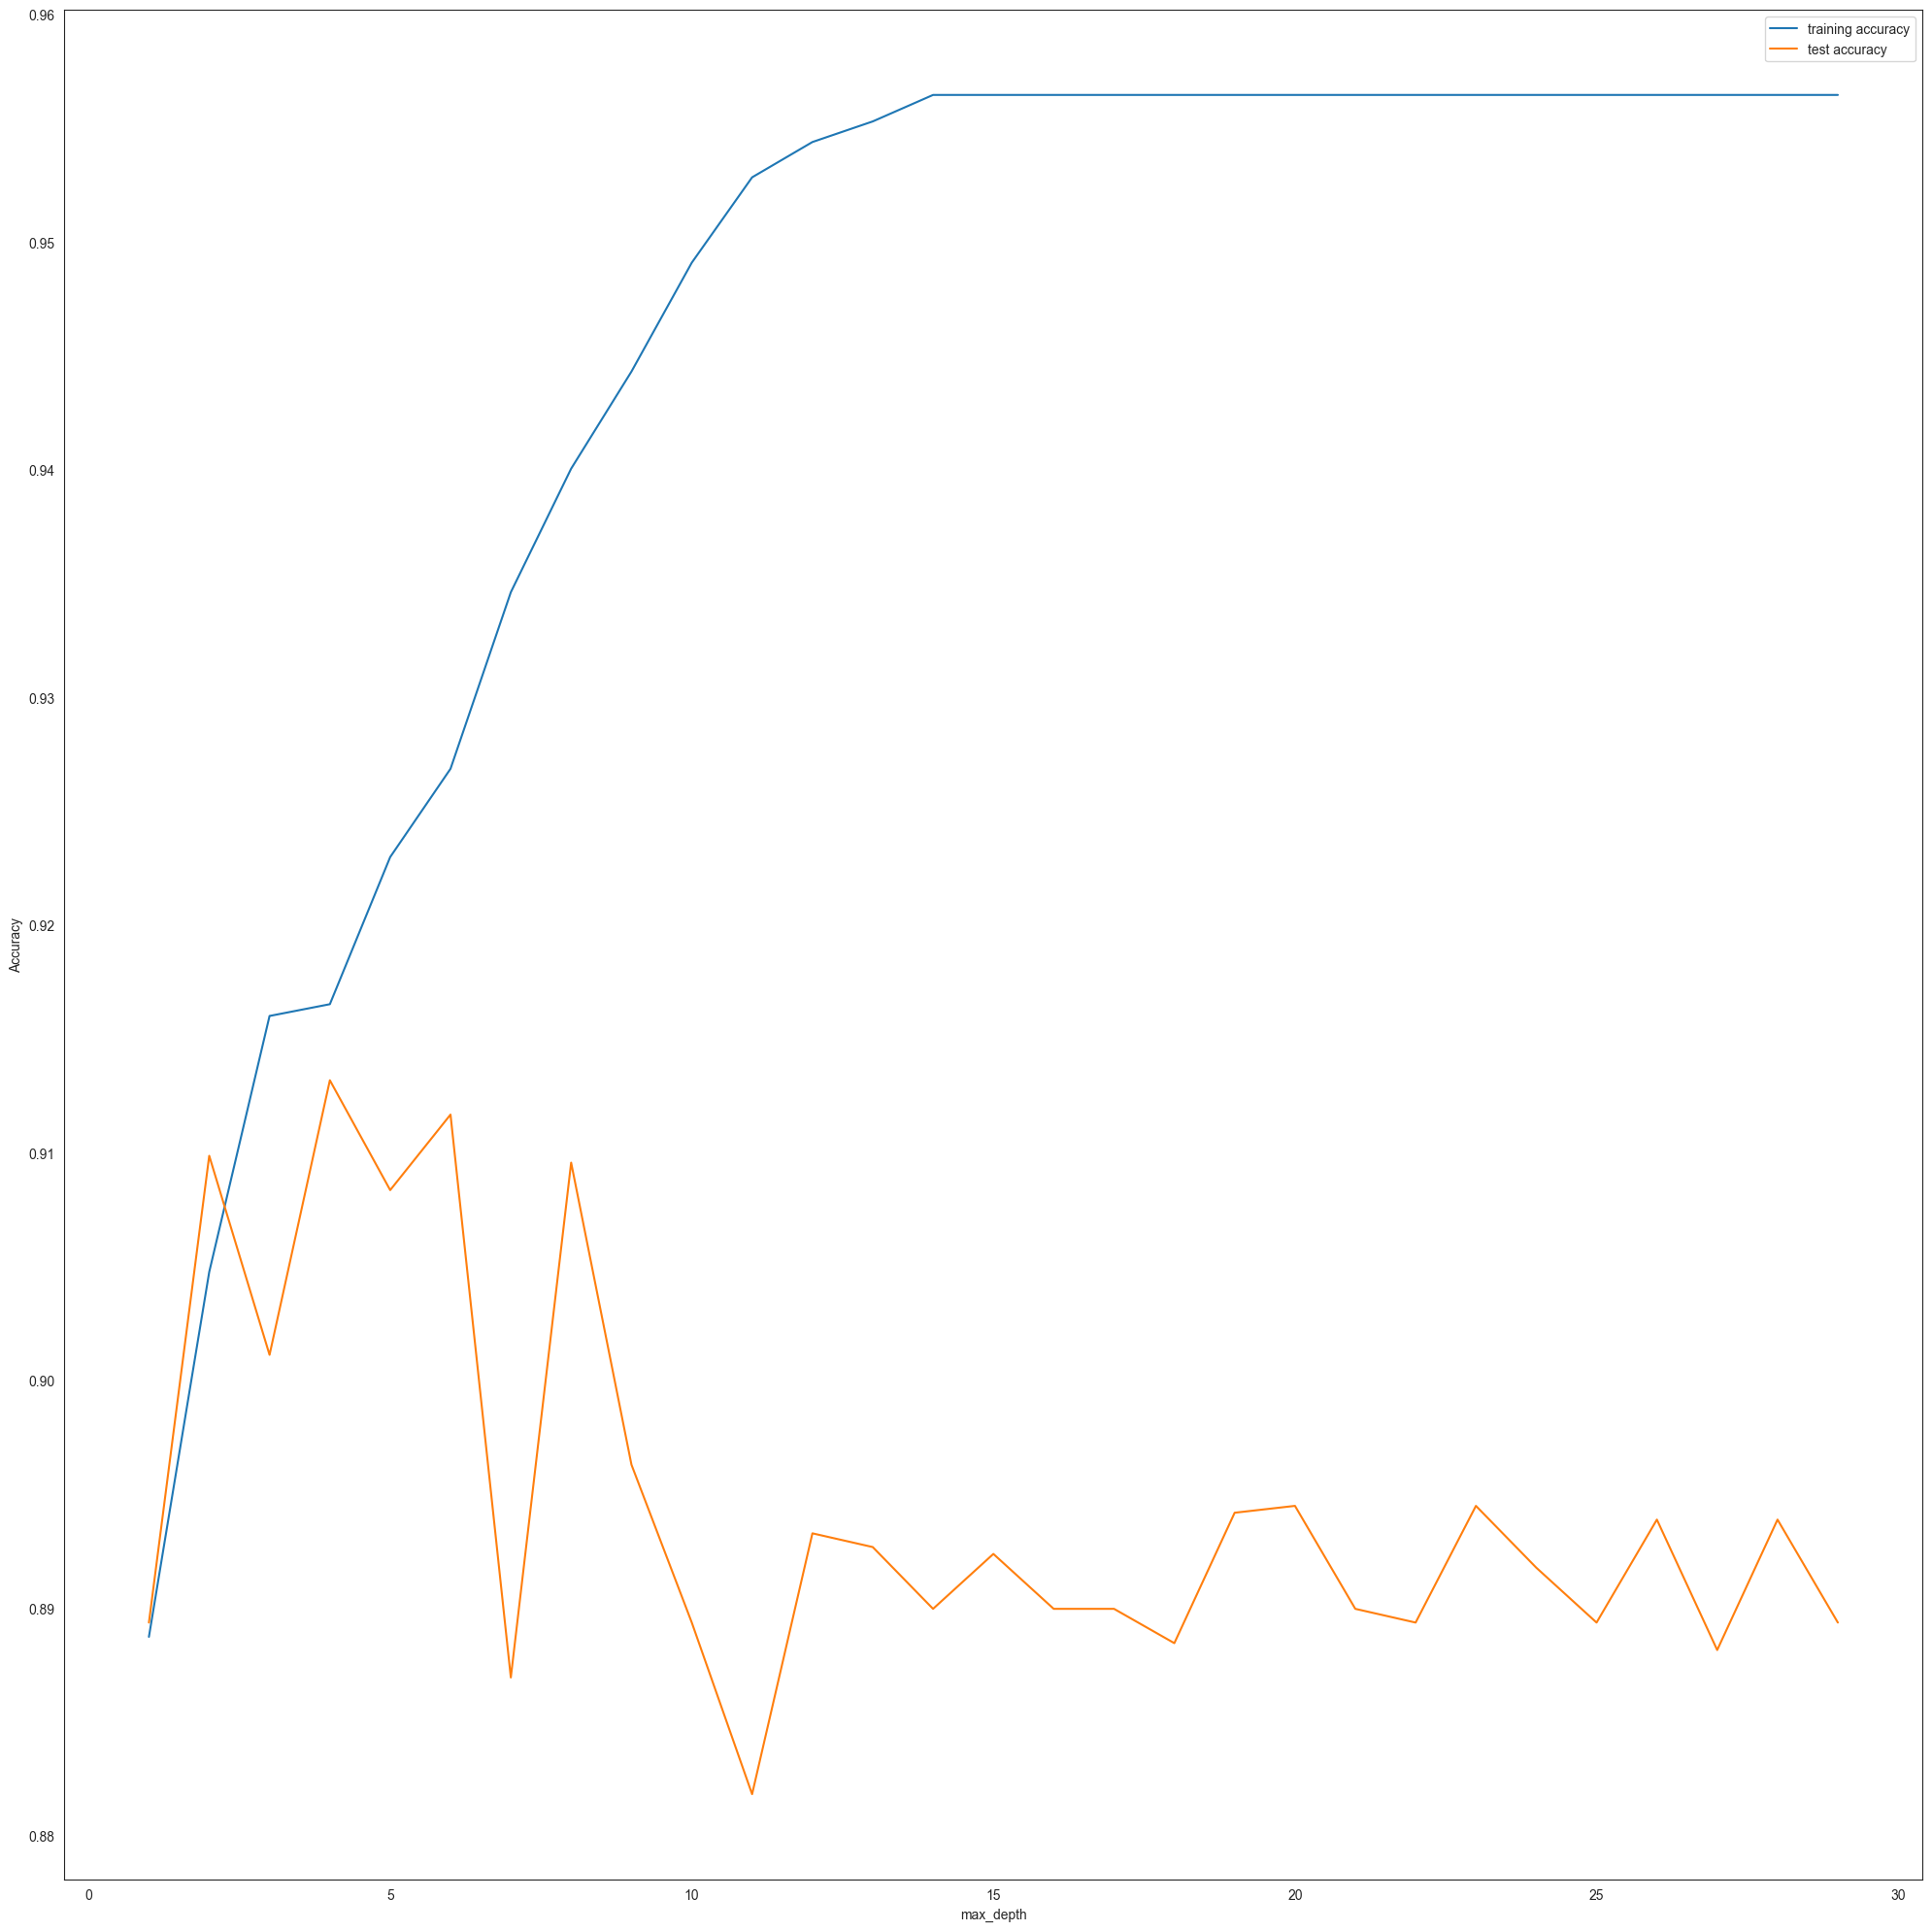

In [154]:
training_accuracy = []
test_accuracy = []

depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(train_X5, train_y5)
    # record training set accuracy
    training_accuracy.append(tree_test.score(train_X5, train_y5))
    # record generalization accuracy
    
    
    test_accuracy.append(tree_test.score(test_X5, test_y5))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

storeResults5_Train('Decision Tree5',acc_train_tree5,f1_score_train_tree5,
             recall_score_train_tree5,precision_score_train_tree5)

storeResults5_Test('Decision Tree5',acc_test_tree5,f1_score_test_tree5,
             recall_score_test_tree5,precision_score_test_tree5)

# Model_2 
# Random Forest










In [155]:
# instantiate the model
forest = RandomForestClassifier(n_estimators=10)
# fit the model 
forest.fit(train_X5,train_y5)

y_train_forest5 = forest.predict(train_X5)
y_test_forest5 = forest.predict(test_X5)
acc_train_forest5 = metrics.accuracy_score(train_y5,y_train_forest5)
acc_test_forest5 = metrics.accuracy_score(test_y5,y_test_forest5)
print("Random Forest5 : Accuracy on training Data: {:.3f}".format(acc_train_forest5))
print("Random Forest5 : Accuracy on test Data: {:.3f}".format(acc_test_forest5))
print()

f1_score_train_forest5 = metrics.f1_score(train_y5,y_train_forest5)
f1_score_test_forest5 = metrics.f1_score(test_y5,y_test_forest5)
print("Random Forest5 : f1_score on training Data: {:.3f}".format(f1_score_train_forest5))
print("Random Forest5 : f1_score on test Data: {:.3f}".format(f1_score_test_forest5))
print()
recall_score_train_forest5 = metrics.recall_score(train_y5,y_train_forest5)
recall_score_test_forest5 = metrics.recall_score(test_y5,y_test_forest5)
print("Random Forest5 : Recall on training Data: {:.3f}".format(recall_score_train_forest5))
print("Random Forest5 : Recall on test Data: {:.3f}".format(recall_score_test_forest5))
print()
precision_score_train_forest5 = metrics.precision_score(train_y5,y_train_forest5)
precision_score_test_forest5 = metrics.precision_score(test_y5,y_test_forest5)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

print(metrics.classification_report(test_y5, y_test_forest5))




Random Forest5 : Accuracy on training Data: 0.956
Random Forest5 : Accuracy on test Data: 0.913

Random Forest5 : f1_score on training Data: 0.960
Random Forest5 : f1_score on test Data: 0.922

Random Forest5 : Recall on training Data: 0.951
Random Forest5 : Recall on test Data: 0.927

Random Forest : precision on training Data: 0.989
Random Forest : precision on test Data: 0.994
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1464
           1       0.92      0.93      0.92      1853

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



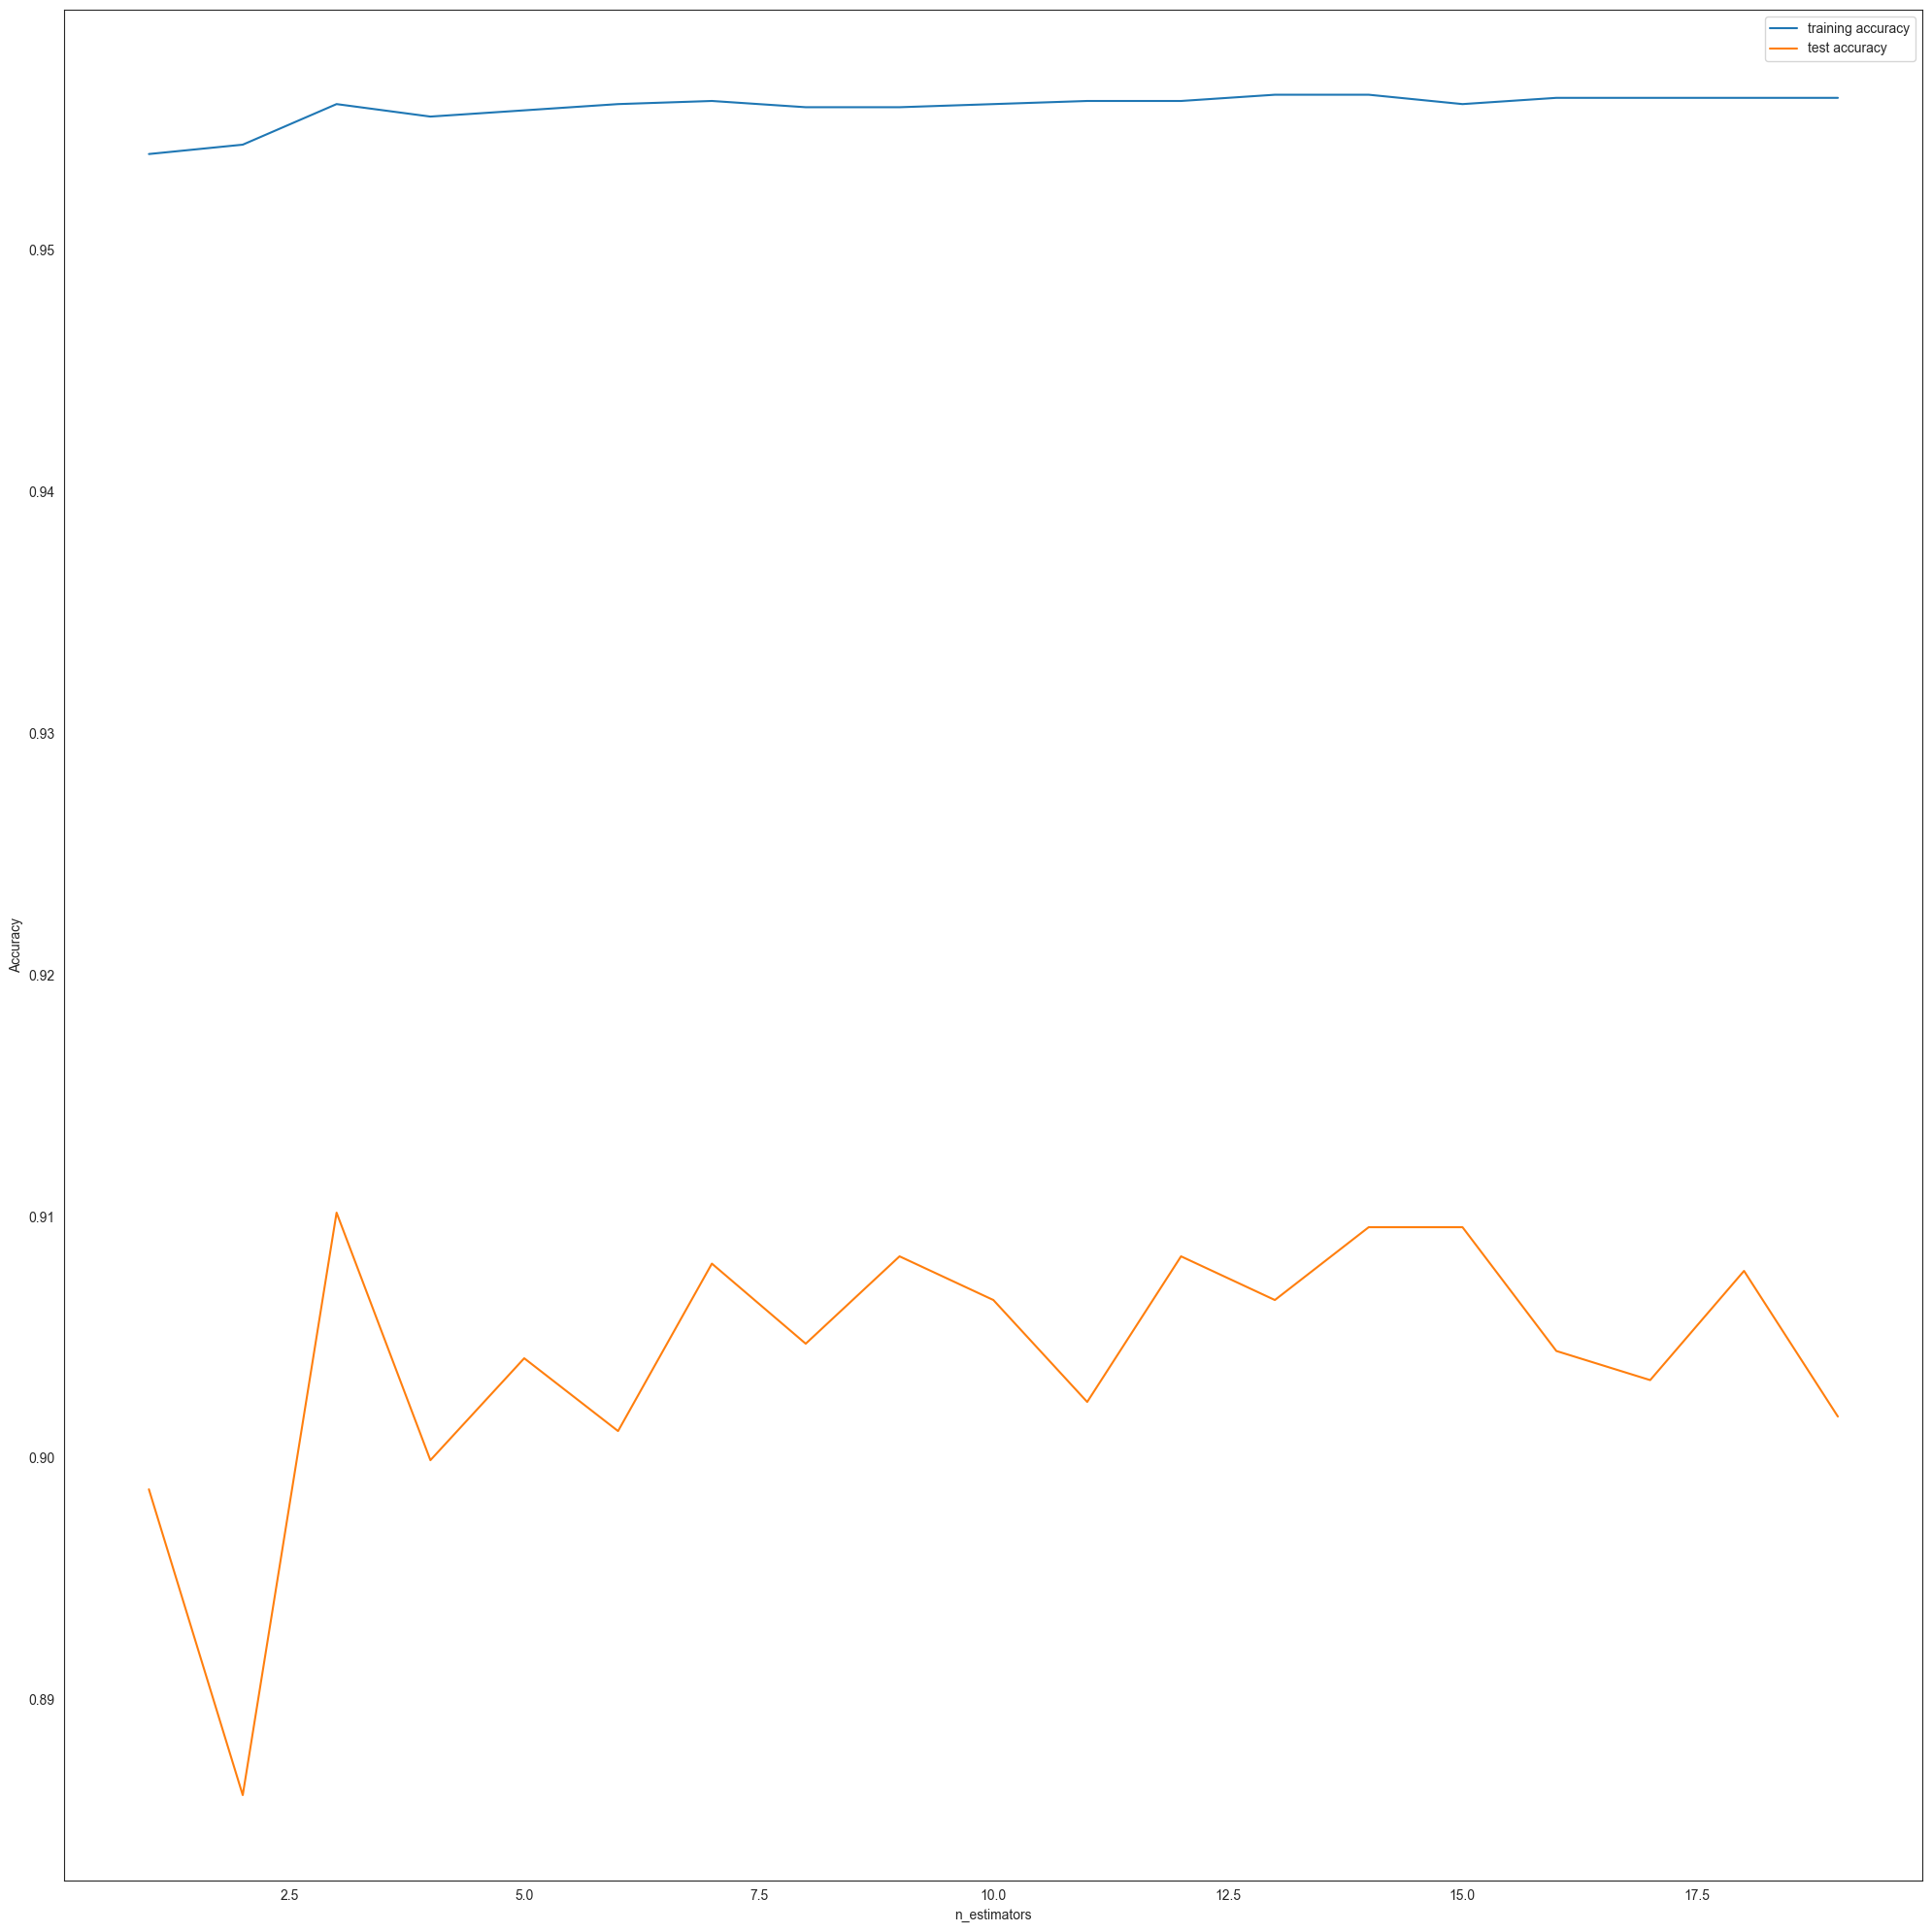

In [156]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(train_X5, train_y5)
    # record traininsg set accuracy
    training_accuracy.append(forest_test.score(train_X5, train_y5))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(test_X5, test_y5))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

storeResults5_Train('Random Forest5',acc_train_forest5,f1_score_train_forest5,
             recall_score_train_forest5,precision_score_train_forest5)
storeResults5_Test('Random Forest5',acc_test_forest5,f1_score_test_forest5,
             recall_score_test_forest5,precision_score_test_forest5)


# Model_3 Gradient Boost

In [157]:
# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
# fit the model 
gbc.fit(train_X5,train_y5)
y_train_gbc5 = gbc.predict(train_X5)
y_test_gbc5 = gbc.predict(test_X5)

acc_train_gbc5 = metrics.accuracy_score(train_y5,y_train_gbc5)
acc_test_gbc5 = metrics.accuracy_score(test_y5,y_test_gbc5)
print("Gradient Boost5: Accuracy on training Data: {:.3f}".format(acc_train_gbc5))
print("Gradient Boost5: Accuracy on test Data: {:.3f}".format(acc_test_gbc5))
print()
f1_score_train_gbc5 = metrics.f1_score(train_y5,y_train_gbc5)
f1_score_test_gbc5 = metrics.f1_score(test_y5,y_test_gbc5)
print("Gradient Boost5 : f1_score on training Data: {:.3f}".format(f1_score_train_gbc5))
print("Gradient Boost5 : f1_score on test Data: {:.3f}".format(f1_score_test_gbc5))
print()
recall_score_train_gbc5 = metrics.recall_score(train_y5,y_train_gbc5)
recall_score_test_gbc5 = metrics.recall_score(test_y5,y_test_gbc5)
print("Gradient Boost : Recall on training Data: {:.3f}".format(recall_score_train_gbc5))
print("Gradient Boost : Recall on test Data: {:.3f}".format(recall_score_test_gbc5))
print()
precision_score_train_gbc5 = metrics.precision_score(train_y5,y_train_gbc5)
precision_score_test_gbc5 = metrics.precision_score(test_y5,y_test_gbc5)
print("Gradient Boost5 : precision on training Data: {:.3f}".format(precision_score_train_gbc5))
print("Gradient Boost5 : precision on test Data: {:.3f}".format(precision_score_test_gbc5))
print()
print(metrics.classification_report(test_y5, y_test_gbc5))

storeResults5_Train('Gradient Boost5 ',acc_train_gbc5,f1_score_train_gbc5,
             recall_score_train_gbc5,precision_score_train_gbc5)
storeResults5_Test('Gradient Boost5 ',acc_test_gbc5,f1_score_test_gbc5,
             recall_score_test_gbc5,precision_score_test_gbc5)

Gradient Boost5: Accuracy on training Data: 0.956
Gradient Boost5: Accuracy on test Data: 0.892

Gradient Boost5 : f1_score on training Data: 0.961
Gradient Boost5 : f1_score on test Data: 0.903

Gradient Boost : Recall on training Data: 0.953
Gradient Boost : Recall on test Data: 0.896

Gradient Boost5 : precision on training Data: 0.969
Gradient Boost5 : precision on test Data: 0.909

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1464
           1       0.91      0.90      0.90      1853

    accuracy                           0.89      3317
   macro avg       0.89      0.89      0.89      3317
weighted avg       0.89      0.89      0.89      3317



# Model_4  Extreme Gradient Method

In [158]:
# fit model no training data
model = XGBClassifier()
model.fit(train_X5, train_y5)
# make predictions for test data
y_train_xgbc5=model.predict(train_X5)
y_test_xgbc5= model.predict(test_X5)

acc_train_xgbc5 = metrics.accuracy_score(train_y4,y_train_xgbc4)
acc_test_xgbc5 = metrics.accuracy_score(test_y4,y_test_xgbc4)
print("Extreme Gradient Boost5: Accuracy on training Data: {:.3f}".format(acc_train_xgbc4))
print("Extreme Gradient Boost5: Accuracy on test Data: {:.3f}".format(acc_test_xgbc4))
print()
f1_score_train_xgbc5 = metrics.f1_score(train_y5,y_train_xgbc5)
f1_score_test_xgbc5 = metrics.f1_score(test_y5,y_test_xgbc5)
print("Extreme Gradient Boost5 : f1_score on training Data: {:.3f}".format(f1_score_train_xgbc5))
print("Extreme Gradient Boost5 : f1_score on test Data: {:.3f}".format(f1_score_test_xgbc5))
print()
recall_score_train_xgbc5 = metrics.recall_score(train_y5,y_train_xgbc5)
recall_score_test_xgbc5 = metrics.recall_score(test_y5,y_test_xgbc5)
print("Extreme Gradient Boost5 : Recall on training Data: {:.3f}".format(recall_score_train_xgbc5))
print("Extreme Gradient Boost5 : Recall on test Data: {:.3f}".format(recall_score_train_xgbc5))
print()
precision_score_train_xgbc5 = metrics.precision_score(train_y5,y_train_xgbc5)
precision_score_test_xgbc5 = metrics.precision_score(test_y5,y_test_xgbc5)
print("Extreme Gradient Boost5 : precision on training Data: {:.3f}".format(precision_score_train_xgbc5))
print("Extreme Gradient Boost5 : precision on test Data: {:.3f}".format(precision_score_train_xgbc5))

print(metrics.classification_report(test_y5, y_test_xgbc5))

storeResults5_Train('Extreme Gradient Boost5',acc_train_xgbc5,f1_score_train_xgbc5,
             recall_score_train_xgbc5,precision_score_train_xgbc5)
storeResults5_Test('Extreme Gradient Boost5',acc_test_xgbc5,f1_score_test_xgbc5,
             recall_score_test_xgbc5,precision_score_test_xgbc5)


Extreme Gradient Boost5: Accuracy on training Data: 0.934
Extreme Gradient Boost5: Accuracy on test Data: 0.923

Extreme Gradient Boost5 : f1_score on training Data: 0.960
Extreme Gradient Boost5 : f1_score on test Data: 0.911

Extreme Gradient Boost5 : Recall on training Data: 0.952
Extreme Gradient Boost5 : Recall on test Data: 0.952

Extreme Gradient Boost5 : precision on training Data: 0.968
Extreme Gradient Boost5 : precision on test Data: 0.968
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1464
           1       0.90      0.92      0.91      1853

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



In [159]:
#creating dataframe
Result5_Train = pd.DataFrame({ 'ML Model5' : ml_model5_Train,
                        'Accuracy5' : accuracy5_Train,
                        'f1_score5' : f1_score5_Train,
                        'Recall5'   : recall5_Train,
                        'Precision5': precision5_Train,
                      })
S_Result5_Train=Result5_Train.sort_values(by=['Accuracy5', 'f1_score5'],ascending=False).reset_index(drop=True)
print("Sequential Feature Selects And Modelling on Reduced 10 features Train Set")

S_Result5_Train
#Result5.to_csv('Result5.csv')


Sequential Feature Selects And Modelling on Reduced 10 features Train Set


ML Model5  Accuracy5  f1_score5  Recall5  Precision5
0         Gradient Boost5       0.956      0.961    0.953       0.969
1           Random Forest5      0.956      0.960    0.951       0.969
2           Decision Tree5      0.949      0.954    0.944       0.964
3  Extreme Gradient Boost5      0.934      0.960    0.952       0.968

In [160]:
#creating dataframe
Result5_Test = pd.DataFrame({ 'ML Model5' : ml_model5_Test,
                        'Accuracy5' : accuracy5_Test,
                        'f1_score5' : f1_score5_Test,
                        'Recall5'   : recall5_Test,
                        'Precision5': precision5_Test,
                      })

#Result5.to_csv('Result5.csv')
#Sorting the datafram on accuracy
S_Result5_Test=Result5_Test.sort_values(by=['Accuracy5', 'f1_score5'],ascending=False).reset_index(drop=True)
print("Sequential Feature Selects And Modelling on Reduced 10 features Test Set")
S_Result5_Test


Sequential Feature Selects And Modelling on Reduced 10 features Test Set


ML Model5  Accuracy5  f1_score5  Recall5  Precision5
0  Extreme Gradient Boost5      0.923      0.911    0.917       0.904
1           Random Forest5      0.913      0.922    0.927       0.918
2         Gradient Boost5       0.892      0.903    0.896       0.909
3           Decision Tree5      0.887      0.897    0.883       0.912

# Method_5  Filter Method
# Feature Selection Based on ANOVA test 

### Now do F-Test 

> ##### Univariate Anova Test
> The elimination Process aims to reduce the size of the input feature set and at the same time to retain the class discriminatory information for the classification problems

> This ANOVA test is based on f-test. 

In [161]:
train_X1=df1.iloc[0:7738,0:30]
train_X1

HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
0                    -1           1                   1                 1   
1                     1           1                   1                 1   
2                     1           0                   1                 1   
3                     1           0                   1                 1   
4                     1           0                  -1                 1   
...                 ...         ...                 ...               ...   
7733                 -1          -1                   1                 1   
7734                  1          -1                  -1                 1   
7735                 -1          -1                   1                 1   
7736                 -1          -1                   1                 1   
7737                 -1          -1                   1                 1   

      DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  HAVING_SUB_DOMAIN  \
0                           -1             -1                 -1   
1                            1             -1                  0   
2                            1             -1                 -1   
3                            1             -1                 -1   
4                            1             -1                  1   
...                        ...            ...                ...   
7733                         1              1                  1   
7734                        -1              1                  1   
7735                         1              1                 -1   
7736                         1             -1                 -1   
7737                         1             -1                  0   

      SSLFINAL_STATE  DOMAIN_REGISTERATION_LENGTH  FAVICON  ...  RIGHTCLICK  \
0                 -1                           -1        1  ...           1   
1                  1                           -1        1  ...           1   
2                 -1                           -1        1  ...           1   
3                 -1                            1        1  ...           1   
4                  1                           -1        1  ...           1   
...              ...                          ...      ...  ...         ...   
7733              -1                           -1        1  ...           1   
7734               1                            1        1  ...           1   
7735               1                           -1        1  ...           1   
7736               1                           -1        1  ...           1   
7737               1                            1        1  ...           1   

      POPUPWIDNOW  IFRAME  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  \
0               1       1             -1         -1           -1         -1   
1               1       1             -1         -1            0         -1   
2               1       1              1         -1            1         -1   
3               1       1             -1         -1            1         -1   
4              -1       1             -1         -1            0         -1   
...           ...     ...            ...        ...          ...        ...   
7733            1       1             -1          1           -1          1   
7734            1       1             -1         -1            1          1   
7735            1       1             -1          1            1         -1   
7736            1       1             -1          1            1         -1   
7737            1       1             -1          1            0          1   

      GOOGLE_INDEX  LINKS_POINTING_TO_PAGE  STATISTICAL_REPORT  
0                1                       1                  -1  
1                1                       1                   1  
2                1                       0                  -1  
3                1                      -1                   1  
4                1                       

In [162]:
train_y1=df1.iloc[0:7738,30]
train_y1

0       0
1       0
2       0
3       0
4       1
       ..
7733    1
7734    1
7735    1
7736    1
7737    0
Name: CLASS, Length: 7738, dtype: int64

In [163]:
test_X1=df1.iloc[7739:,0:30]
test_X1

HAVING_IP_ADDRESS  URL_LENGTH  SHORTINING_SERVICE  HAVING_AT_SYMBOL  \
7739                  -1          -1                   1                -1   
7740                  -1          -1                   1                -1   
7741                  -1          -1                   1                 1   
7742                   1          -1                   1                 1   
7743                  -1          -1                   1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       DOUBLE_SLASH_REDIRECTING  PREFIX_SUFFIX  HAVING_SUB_DOMAIN  \
7739                          1             -1                  0   
7740                          1             -1                  1   
7741                          1             -1                  1   
7742                          1             -1                  0   
7743                          1             -1                 -1   
...                         ...            ...                ...   
11050                         1              1                  1   
11051                        -1             -1                  1   
11052                         1             -1                  1   
11053                         1             -1                 -1   
11054                         1             -1                 -1   

       SSLFINAL_STATE  DOMAIN_REGISTERATION_LENGTH  FAVICON  ...  RIGHTCLICK  \
7739               -1                            1       -1  ...          -1   
7740                1                           -1       -1  ...           1   
7741                0                           -1        1  ...           1   
7742               -1                           -1        1  ...           1   
7743                1                            1        1  ...           1   
...               ...                          ...      ...  ...         ...   
11050               1                           -1       -1  ...          -1   
11051              -1                           -1       -1  ...           1   
11052              -1                           -1        1  ...           1   
11053              -1                            1       -1  ...           1   
11054              -1                            1        1  ...           1   

       POPUPWIDNOW  IFRAME  AGE_OF_DOMAIN  DNSRECORD  WEB_TRAFFIC  PAGE_RANK  \
7739            -1      -1             -1          1           -1          1   
7740            -1      -1             -1          1            1          1   
7741             1       1             -1          1           -1         -1   
7742             1       1             -1          1            1          1   
7743             1       1             -1          1            1         -1   
...            ...     ...            ...        ...          ...        ...   
11050           -1      -1              1          1           -1         -1   
11051           -1       1              1          1            1          1   
11052            1       1              1          1            1         -1   
11053           -1       1              1          1            1         -1   
11054            1       1             -1          1           -1         -1   

       GOOGLE_INDEX  LINKS_POINTING_TO_PAGE  STATISTICAL_REPORT  
7739              1                       0                   1  
7740              1                       1                   1  
7741              1                       1                   1  
7742              1                       0            

In [164]:
test_y1=df1.iloc[7739:,30]
test_y1

7739     0
7740     1
7741     0
7742     0
7743     1
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: CLASS, Length: 3316, dtype: int64

In [165]:
sel=f_classif(train_X1,train_y1)               #fscore and pvalues
sel

(array([1.88089210e+01, 2.40391888e+01, 3.42610610e+01, 2.18671342e+01,
        1.10329313e+01, 1.08695973e+03, 3.56393662e+02, 8.16255218e+03,
        3.79722393e+02, 2.86599413e-04, 9.43165496e+00, 1.08143628e+01,
        5.47272755e+02, 7.24038439e+03, 5.07321445e+02, 2.07303931e+02,
        1.47165762e+00, 2.51566787e+01, 7.86040964e+00, 1.37976468e+01,
        5.98010378e-01, 3.69708216e-05, 1.81217097e-01, 3.63727188e+02,
        1.14863452e+02, 3.48331538e+03, 1.25075734e+02, 7.42327739e+01,
        9.06606503e+00, 4.18380751e+01]),
 array([1.46322670e-005, 9.63174465e-007, 5.01599124e-009, 2.97149567e-006,
        8.99223757e-004, 3.61027016e-223, 9.42674998e-078, 0.00000000e+000,
        1.33533295e-082, 9.86493497e-001, 2.14011968e-003, 1.01165505e-003,
        5.28881966e-117, 0.00000000e+000, 7.25188635e-109, 2.11057953e-046,
        2.25121381e-001, 5.40323551e-007, 5.06548163e-003, 2.05024448e-004,
        4.39361794e-001, 9.95148758e-001, 6.70341209e-001, 2.80883998e-079

In [166]:
f_score=pd.Series(sel[0])
print('The F Score of all the Features are:')
f_score

The F Score of all the Features are:


0       18.808921
1       24.039189
2       34.261061
3       21.867134
4       11.032931
5     1086.959733
6      356.393662
7     8162.552175
8      379.722393
9        0.000287
10       9.431655
11      10.814363
12     547.272755
13    7240.384387
14     507.321445
15     207.303931
16       1.471658
17      25.156679
18       7.860410
19      13.797647
20       0.598010
21       0.000037
22       0.181217
23     363.727188
24     114.863452
25    3483.315377
26     125.075734
27      74.232774
28       9.066065
29      41.838075
dtype: float64

In [167]:
p_values=pd.Series(sel[1])
print('The P_Values of each Features')
np.round(p_values,6)

The P_Values of each Features


0     0.000015
1     0.000001
2     0.000000
3     0.000003
4     0.000899
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.986493
10    0.002140
11    0.001012
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.225121
17    0.000001
18    0.005065
19    0.000205
20    0.439362
21    0.995149
22    0.670341
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.002612
29    0.000000
dtype: float64

In [168]:
p_values.index = train_X1.columns
p_values.sort_values(ascending=True,inplace=True)

Text(0.5, 1.0, 'p_value_plot')

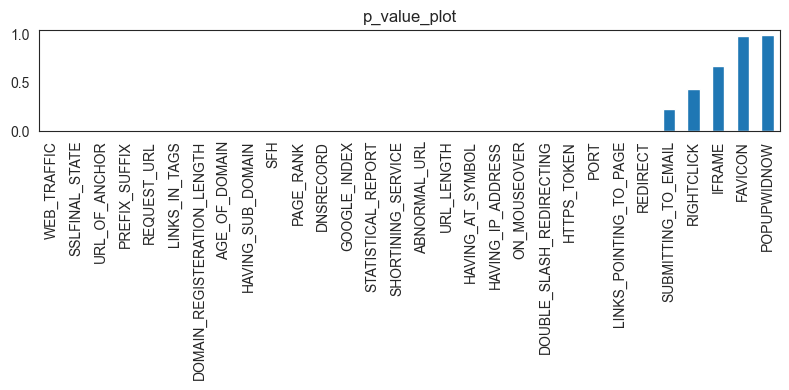

In [169]:
# 
p_values.plot.bar(figsize=(8,4))
plt.title('p_value_plot')


In [170]:
np.round(p_values,6) , len(p_values)

(WEB_TRAFFIC                    0.000000
 SSLFINAL_STATE                 0.000000
 URL_OF_ANCHOR                  0.000000
 PREFIX_SUFFIX                  0.000000
 REQUEST_URL                    0.000000
 LINKS_IN_TAGS                  0.000000
 DOMAIN_REGISTERATION_LENGTH    0.000000
 AGE_OF_DOMAIN                  0.000000
 HAVING_SUB_DOMAIN              0.000000
 SFH                            0.000000
 PAGE_RANK                      0.000000
 DNSRECORD                      0.000000
 GOOGLE_INDEX                   0.000000
 STATISTICAL_REPORT             0.000000
 SHORTINING_SERVICE             0.000000
 ABNORMAL_URL                   0.000001
 URL_LENGTH                     0.000001
 HAVING_AT_SYMBOL               0.000003
 HAVING_IP_ADDRESS              0.000015
 ON_MOUSEOVER                   0.000205
 DOUBLE_SLASH_REDIRECTING       0.000899
 HTTPS_TOKEN                    0.001012
 PORT                           0.002140
 LINKS_POINTING_TO_PAGE         0.002612
 REDIRECT       

In [171]:
p_values=p_values[p_values < 0.05]
np.round(p_values,6) , len(p_values)

(WEB_TRAFFIC                    0.000000
 SSLFINAL_STATE                 0.000000
 URL_OF_ANCHOR                  0.000000
 PREFIX_SUFFIX                  0.000000
 REQUEST_URL                    0.000000
 LINKS_IN_TAGS                  0.000000
 DOMAIN_REGISTERATION_LENGTH    0.000000
 AGE_OF_DOMAIN                  0.000000
 HAVING_SUB_DOMAIN              0.000000
 SFH                            0.000000
 PAGE_RANK                      0.000000
 DNSRECORD                      0.000000
 GOOGLE_INDEX                   0.000000
 STATISTICAL_REPORT             0.000000
 SHORTINING_SERVICE             0.000000
 ABNORMAL_URL                   0.000001
 URL_LENGTH                     0.000001
 HAVING_AT_SYMBOL               0.000003
 HAVING_IP_ADDRESS              0.000015
 ON_MOUSEOVER                   0.000205
 DOUBLE_SLASH_REDIRECTING       0.000899
 HTTPS_TOKEN                    0.001012
 PORT                           0.002140
 LINKS_POINTING_TO_PAGE         0.002612
 REDIRECT       

In [172]:
p_values.index

Index(['WEB_TRAFFIC', 'SSLFINAL_STATE', 'URL_OF_ANCHOR', 'PREFIX_SUFFIX',
       'REQUEST_URL', 'LINKS_IN_TAGS', 'DOMAIN_REGISTERATION_LENGTH',
       'AGE_OF_DOMAIN', 'HAVING_SUB_DOMAIN', 'SFH', 'PAGE_RANK', 'DNSRECORD',
       'GOOGLE_INDEX', 'STATISTICAL_REPORT', 'SHORTINING_SERVICE',
       'ABNORMAL_URL', 'URL_LENGTH', 'HAVING_AT_SYMBOL', 'HAVING_IP_ADDRESS',
       'ON_MOUSEOVER', 'DOUBLE_SLASH_REDIRECTING', 'HTTPS_TOKEN', 'PORT',
       'LINKS_POINTING_TO_PAGE', 'REDIRECT'],
      dtype='object')

In [173]:
train_Xp=train_X1[p_values.index]
test_Xp=test_X1[p_values.index]
train_Xp

WEB_TRAFFIC  SSLFINAL_STATE  URL_OF_ANCHOR  PREFIX_SUFFIX  REQUEST_URL  \
0              -1              -1             -1             -1            1   
1               0               1              0             -1            1   
2               1              -1              0             -1            1   
3               1              -1              0             -1           -1   
4               0               1              0             -1            1   
...           ...             ...            ...            ...          ...   
7733           -1              -1              1              1            1   
7734            1               1              0              1            1   
7735            1               1              0              1            1   
7736            1               1              0             -1            1   
7737            0               1             -1             -1            1   

      LINKS_IN_TAGS  DOMAIN_REGISTERATION_LENGTH  AGE_OF_DOMAIN  \
0                 1                           -1             -1   
1                -1                           -1             -1   
2                -1                           -1              1   
3                 0                            1             -1   
4                 0                           -1             -1   
...             ...                          ...            ...   
7733              0                           -1             -1   
7734              0                            1             -1   
7735              0                           -1             -1   
7736              1                           -1             -1   
7737             -1                            1             -1   

      HAVING_SUB_DOMAIN  SFH  ...  ABNORMAL_URL  URL_LENGTH  HAVING_AT_SYMBOL  \
0                    -1   -1  ...            -1           1                 1   
1                     0   -1  ...             1           1                 1   
2                    -1   -1  ...            -1           0                 1   
3                    -1   -1  ...             1           0                 1   
4                     1   -1  ...             1           0                 1   
...                 ...  ...  ...           ...         ...               ...   
7733                  1   -1  ...             1          -1                 1   
7734                  1   -1  ...             1          -1                 1   
7735                 -1   -1  ...             1          -1                 1   
7736                 -1   -1  ...             1          -1                 1   
7737                  0   -1  ...             1          -1                 1   

      HAVING_IP_ADDRESS  ON_MOUSEOVER  DOUBLE_SLASH_REDIRECTING  HTTPS_TOKEN  \
0                    -1             1                        -1           -1   
1                     1             1                         1           -1   
2                     1             1                         1           -1   
3                     1             1                         1           -1   
4                     1            -1                         1            1   
...                 ...           ...                       ...          ...   
7733                 -1             1                         1            1   
7734                  1             1                        -1           -1   
7735                 -1             1                         1            1   
7736                 -1             1                         1            1   
7737                 -1             1                         1            1   

      PORT  LINKS_POINTING_TO_PAGE  REDIRECT  
0        1                       1         0  
1        1                       1         0  
2        1                       0         0  
3        1                      -1         0  
4        1                       1         0  
...    ...              

In [174]:
train_y1 , test_y1

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 7733    1
 7734    1
 7735    1
 7736    1
 7737    0
 Name: CLASS, Length: 7738, dtype: int64,
 7739     0
 7740     1
 7741     0
 7742     0
 7743     1
         ..
 11050    1
 11051    0
 11052    0
 11053    0
 11054    0
 Name: CLASS, Length: 3316, dtype: int64)


# Model_1 
## Decision Tree

In [175]:
#to store model  performance 

ml_model6_Train = []
accuracy6_Train = []
f1_score6_Train= []
recall6_Train = []
precision6_Train = []
#function to call for storing the results

def storeResults6_Train(model6,a,b,c,d):
    ml_model6_Train.append(model6)
    accuracy6_Train.append(round(a, 3))
    f1_score6_Train.append(round(b, 3))
    recall6_Train.append(round(c, 3))
    precision6_Train.append(round(d ,3))

In [176]:
#to store model  performance 

ml_model6_Test= []
accuracy6_Test = []
f1_score6_Test= []
recall6_Test = []
precision6_Test = []
#function to call for storing the results

def storeResults6_Test(model6,a,b,c,d):
    ml_model6_Test.append(model6)
    accuracy6_Test.append(round(a, 3))
    f1_score6_Test.append(round(b, 3))
    recall6_Test.append(round(c, 3))
    precision6_Test.append(round(d ,3))

In [177]:
# fit the model 
tree.fit(train_Xp,train_y1)

#predicting the target value from the model for the samples
y_train_tree6 = tree.predict(train_Xp)
y_test_tree6 = tree.predict(test_Xp)



acc_train_tree6 = metrics.accuracy_score(train_y1,y_train_tree6)
acc_test_tree6 = metrics.accuracy_score(test_y1,y_test_tree6)
print("Decision Tree6 : Accuracy on training Data: {:.3f}".format(acc_train_tree6))
print("Decision Tree6 : Accuracy on test Data: {:.3f}".format(acc_test_tree6))
print()
f1_score_train_tree6= metrics.f1_score(train_y1,y_train_tree6)
f1_score_test_tree6 = metrics.f1_score(test_y1,y_test_tree6)
print("Decision Tree6 : f1_score on training Data: {:.3f}".format(f1_score_train_tree6))
print("Decision Tree6 : f1_score on test Data: {:.3f}".format(f1_score_test_tree6))
print()
recall_score_train_tree6 = metrics.recall_score(train_y1,y_train_tree6)
recall_score_test_tree6= metrics.recall_score(test_y1,y_test_tree6)
print("Decision Tree6 : Recall on training Data: {:.3f}".format(recall_score_train_tree6))
print("Decision Tree6 : Recall on test Data: {:.3f}".format(recall_score_test_tree6))
print()
precision_score_train_tree6 = metrics.precision_score(train_y1,y_train_tree6)
precision_score_test_tree6 = metrics.precision_score(test_y1,y_test_tree6)
print("Decision Tree6 : precision on training Data: {:.3f}".format(precision_score_train_tree6))
print("Decision Tree6 : precision on test Data: {:.3f}".format(precision_score_test_tree6))

print(metrics.classification_report(test_y1, y_test_tree6))

Decision Tree6 : Accuracy on training Data: 0.967
Decision Tree6 : Accuracy on test Data: 0.894

Decision Tree6 : f1_score on training Data: 0.970
Decision Tree6 : f1_score on test Data: 0.907

Decision Tree6 : Recall on training Data: 0.960
Decision Tree6 : Recall on test Data: 0.917

Decision Tree6 : precision on training Data: 0.980
Decision Tree6 : precision on test Data: 0.897
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1463
           1       0.90      0.92      0.91      1853

    accuracy                           0.89      3316
   macro avg       0.89      0.89      0.89      3316
weighted avg       0.89      0.89      0.89      3316



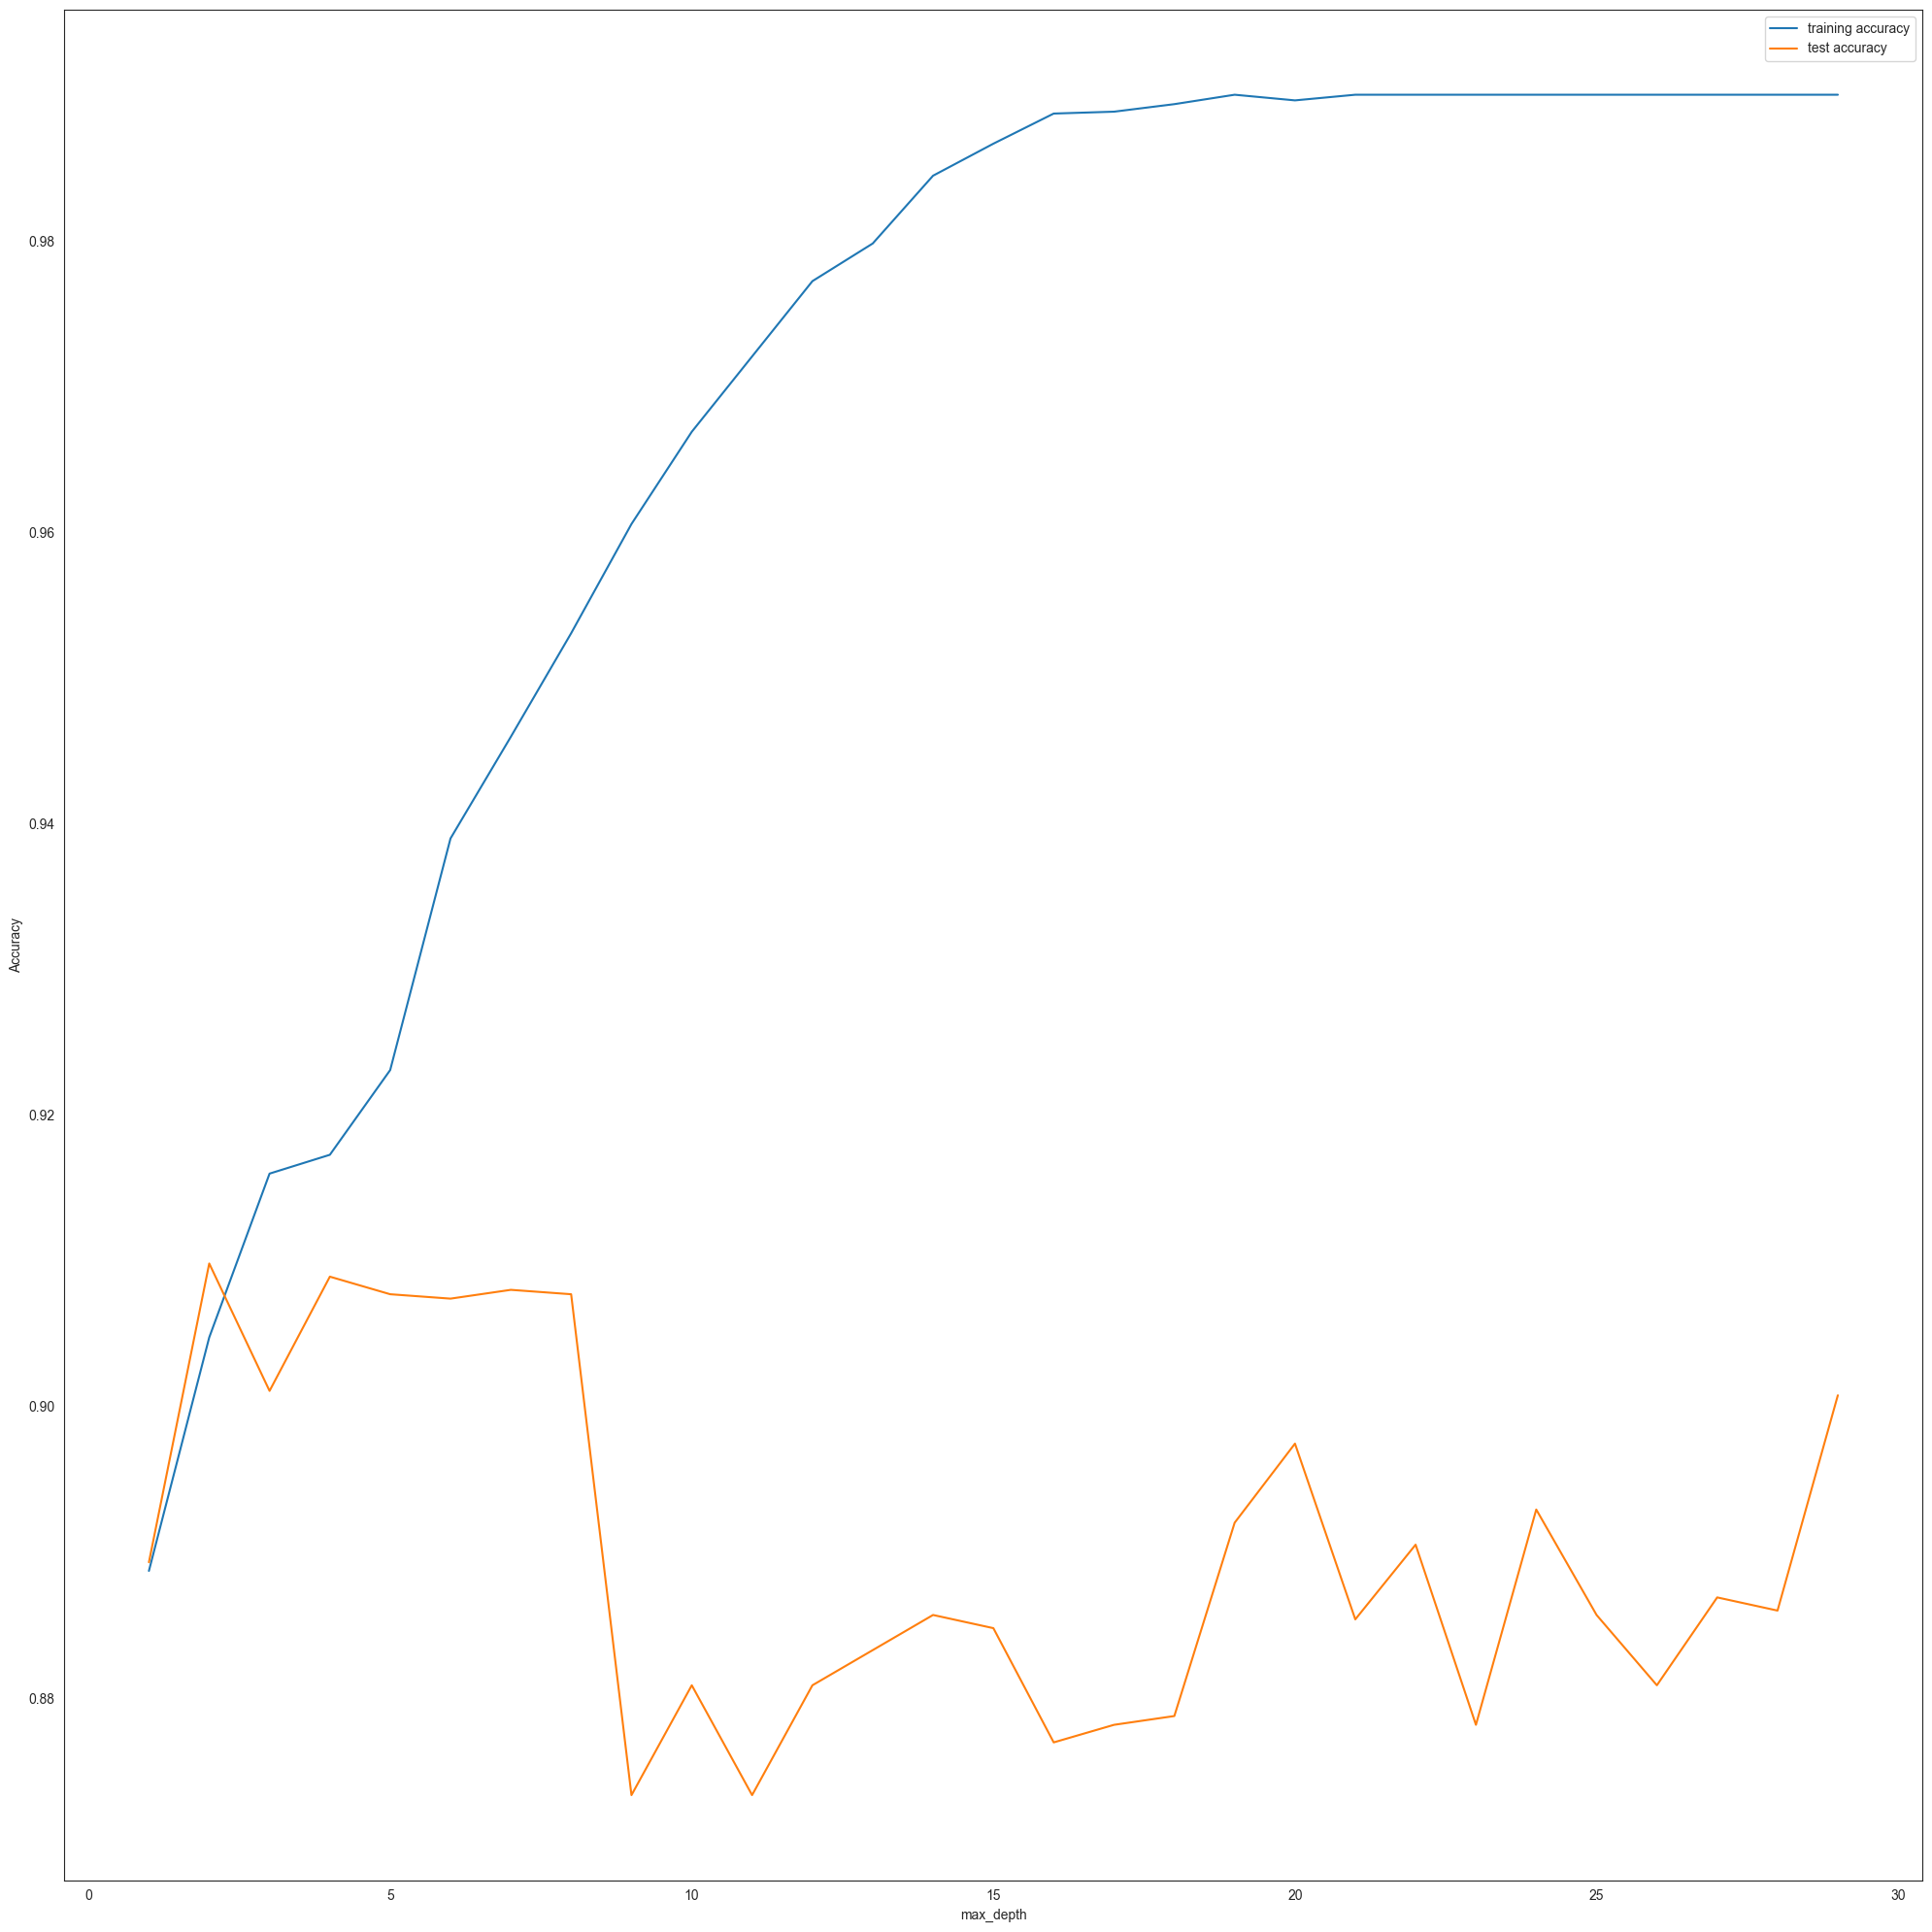

In [178]:
training_accuracy = []
test_accuracy = []

depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(train_Xp, train_y1)
    # record training set accuracy
    training_accuracy.append(tree_test.score(train_Xp, train_y1))
    # record generalization accuracy
    
    
    test_accuracy.append(tree_test.score(test_Xp, test_y1))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

storeResults6_Train('Decision Tree6',acc_train_tree6,f1_score_train_tree6,
             recall_score_train_tree6,precision_score_train_tree6)

storeResults6_Test('Decision Tree6',acc_test_tree6,f1_score_test_tree6,
             recall_score_test_tree6,precision_score_test_tree6)

# Model_2 Random Forest

In [179]:
# fit the model 
forest.fit(train_Xp,train_y1)
y_train_forest6 = forest.predict(train_Xp)
y_test_forest6 = forest.predict(test_Xp)

acc_train_forest6 = metrics.accuracy_score(train_y1,y_train_forest6)
acc_test_forest6 = metrics.accuracy_score(test_y1,y_test_forest6)
print("Random Forest6 : Accuracy on training Data: {:.3f}".format(acc_train_forest6))
print("Random Forest6 : Accuracy on test Data: {:.3f}".format(acc_test_forest6))
print()
f1_score_train_forest6 = metrics.f1_score(train_y1,y_train_forest6)
f1_score_test_forest6 = metrics.f1_score(test_y1,y_test_forest6)
print("Random Forest6 : f1_score on training Data: {:.3f}".format(f1_score_train_forest6))
print("Random Forest6 : f1_score on test Data: {:.3f}".format(f1_score_test_forest6))
print()
recall_score_train_forest6 = metrics.recall_score(train_y1,y_train_forest6)
recall_score_test_forest6 = metrics.recall_score(test_y1,y_test_forest6)
print("Random Forest6 : Recall on training Data: {:.3f}".format(recall_score_train_forest6))
print("Random Forest6 : Recall on test Data: {:.3f}".format(recall_score_test_forest6))
print()

precision_score_train_forest6 = metrics.precision_score(train_y1,y_train_forest6)
precision_score_test_forest6 = metrics.precision_score(test_y1,y_test_forest6)
print("Random Forest6 : precision on training Data: {:.3f}".format(precision_score_train_forest6))
print("Random Forest6 : precision on test Data: {:.3f}".format(precision_score_test_forest6))

print(metrics.classification_report(test_y1, y_test_forest6))


Random Forest6 : Accuracy on training Data: 0.990
Random Forest6 : Accuracy on test Data: 0.916

Random Forest6 : f1_score on training Data: 0.991
Random Forest6 : f1_score on test Data: 0.926

Random Forest6 : Recall on training Data: 0.993
Random Forest6 : Recall on test Data: 0.938

Random Forest6 : precision on training Data: 0.989
Random Forest6 : precision on test Data: 0.914
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1463
           1       0.91      0.94      0.93      1853

    accuracy                           0.92      3316
   macro avg       0.92      0.91      0.91      3316
weighted avg       0.92      0.92      0.92      3316



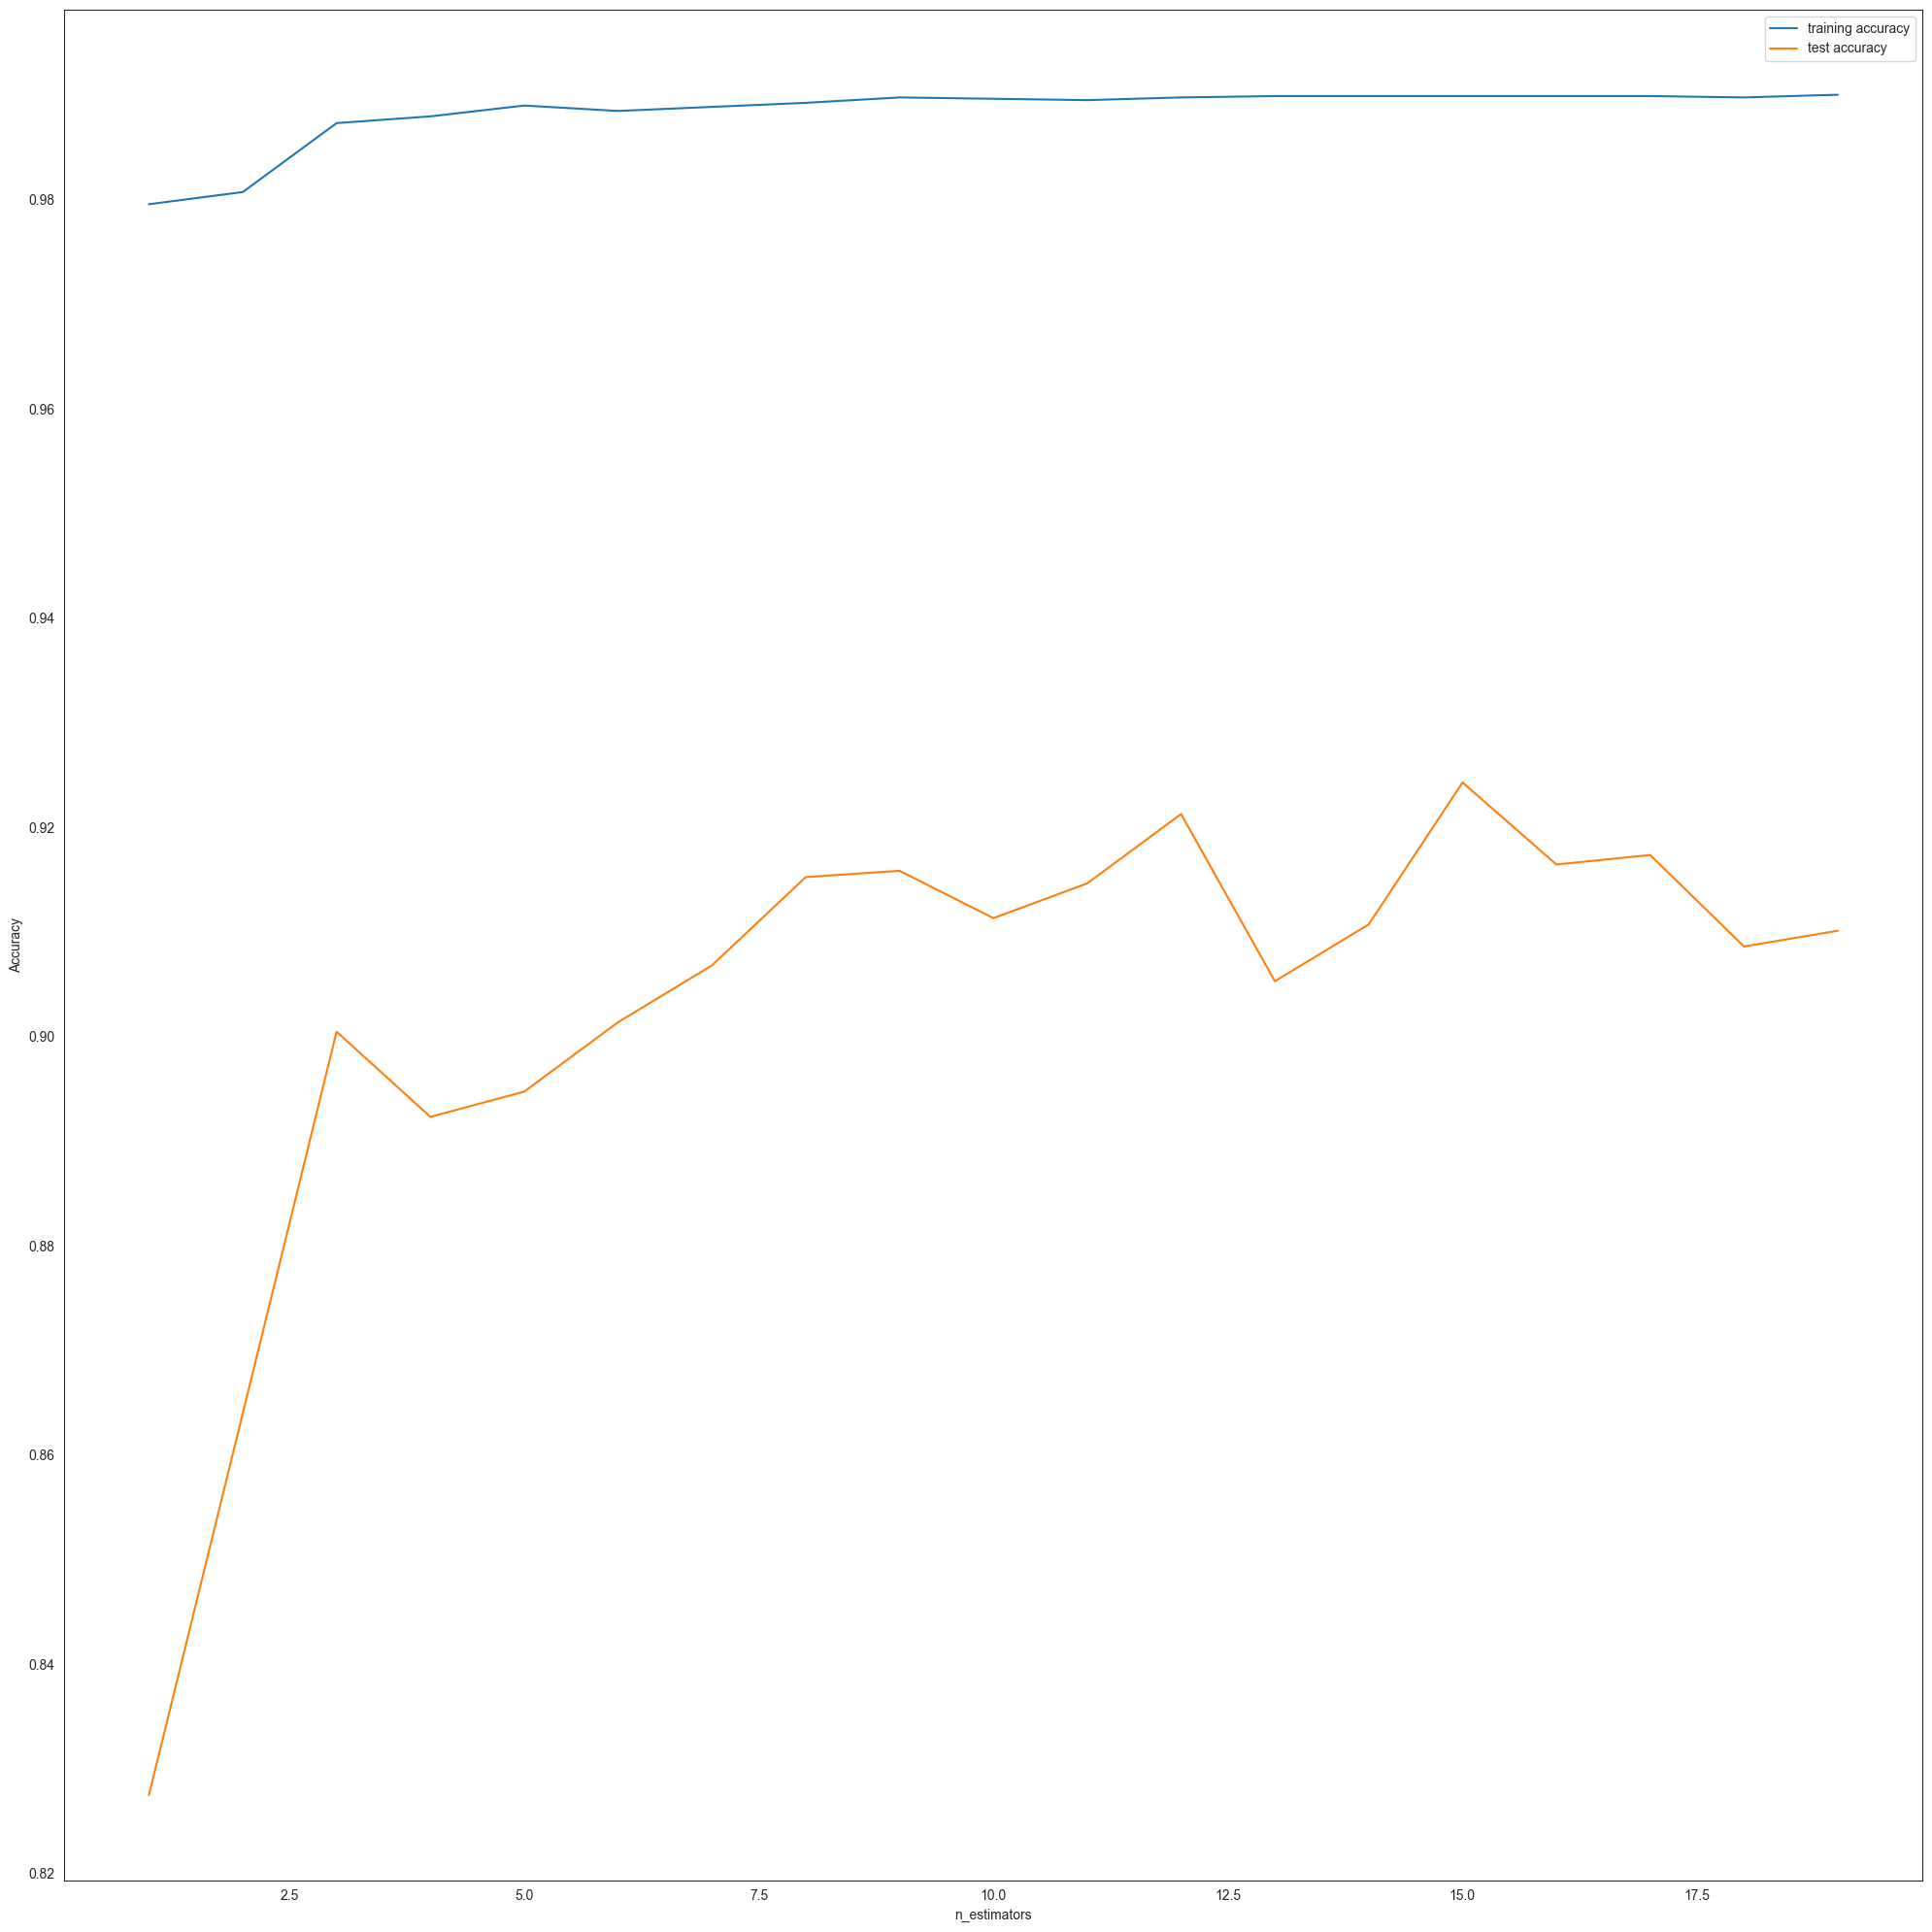

In [180]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(train_Xp, train_y1)
    # record training set accuracy
    training_accuracy.append(forest_test.score(train_Xp, train_y1))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(test_Xp, test_y1))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();
storeResults6_Train('Random Forest6',acc_train_forest6,f1_score_train_forest6,
             recall_score_train_forest6,precision_score_train_forest6)

storeResults6_Test('Random Forest6',acc_test_forest6,f1_score_test_forest6,
             recall_score_test_forest6,precision_score_test_forest6)

# Model_3  Gradient Boosting 

In [181]:
# fit the model 
gbc.fit(train_Xp,train_y1)
y_train_gbc6 = gbc.predict(train_Xp)
y_test_gbc6 = gbc.predict(test_Xp)

acc_train_gbc6 = metrics.accuracy_score(train_y1,y_train_gbc6)
acc_test_gbc6= metrics.accuracy_score(test_y1,y_test_gbc6)
print("Gradient Boost6: Accuracy on training Data: {:.3f}".format(acc_train_gbc6))
print("Gradient Boost6: Accuracy on test Data: {:.3f}".format(acc_test_gbc6))
print()
f1_score_train_gbc6 = metrics.f1_score(train_y1,y_train_gbc6)
f1_score_test_gbc6 = metrics.f1_score(test_y1,y_test_gbc6)
print("Gradient Boost6 : f1_score on training Data: {:.3f}".format(f1_score_train_gbc6))
print("Gradient Boost6 : f1_score on test Data: {:.3f}".format(f1_score_test_gbc6))
print()
recall_score_train_gbc6 = metrics.recall_score(train_y1,y_train_gbc6)
recall_score_test_gbc6 = metrics.recall_score(test_y1,y_test_gbc6)
print("Gradient Boost6 : Recall on training Data: {:.3f}".format(recall_score_train_gbc6))
print("Gradient Boost6 : Recall on test Data: {:.3f}".format(recall_score_test_gbc6))
print()
precision_score_train_gbc6 = metrics.precision_score(train_y1,y_train_gbc6)
precision_score_test_gbc6 = metrics.precision_score(test_y1,y_test_gbc6)
print("Gradient Boost6 : precision on training Data: {:.3f}".format(precision_score_train_gbc6))
print("Gradient Boost6 : precision on test Data: {:.3f}".format(precision_score_test_gbc6))

print(metrics.classification_report(test_y1, y_test_gbc6))

storeResults6_Train('Gradient Boost6 ',acc_train_gbc6,f1_score_train_gbc6,
             recall_score_train_gbc6,precision_score_train_gbc6)
storeResults6_Test('Gradient Boost6 ',acc_test_gbc6,f1_score_test_gbc6,
             recall_score_test_gbc6,precision_score_test_gbc6)


Gradient Boost6: Accuracy on training Data: 0.988
Gradient Boost6: Accuracy on test Data: 0.921

Gradient Boost6 : f1_score on training Data: 0.990
Gradient Boost6 : f1_score on test Data: 0.930

Gradient Boost6 : Recall on training Data: 0.994
Gradient Boost6 : Recall on test Data: 0.938

Gradient Boost6 : precision on training Data: 0.986
Gradient Boost6 : precision on test Data: 0.922
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1463
           1       0.92      0.94      0.93      1853

    accuracy                           0.92      3316
   macro avg       0.92      0.92      0.92      3316
weighted avg       0.92      0.92      0.92      3316



# Model_4 Extreme gradient Boost

In [182]:
# fit model no training data
model = XGBClassifier()
model.fit(train_Xp, train_y1)
# make predictions for test data
y_train_xgbc6=model.predict(train_Xp)
y_test_xgbc6= model.predict(test_Xp)

acc_train_xgbc6 = metrics.accuracy_score(train_y1,y_train_xgbc6)
acc_test_xgbc6 = metrics.accuracy_score(test_y1,y_test_xgbc6)
print("Extreme Gradient Boost6: Accuracy on training Data: {:.3f}".format(acc_train_xgbc6))
print("Extreme Gradient Boost6: Accuracy on test Data: {:.3f}".format(acc_test_xgbc6))
print()
f1_score_train_xgbc6 = metrics.f1_score(train_y1,y_train_xgbc6)
f1_score_test_xgbc6 = metrics.f1_score(test_y1,y_test_xgbc6)
print("Extreme Gradient Boost6 : f1_score on training Data: {:.3f}".format(f1_score_train_xgbc6))
print("Extreme Gradient Boost6 : f1_score on test Data: {:.3f}".format(f1_score_test_xgbc6))
print()
recall_score_train_xgbc6 = metrics.recall_score(train_y1,y_train_xgbc6)
recall_score_test_xgbc6 = metrics.recall_score(test_y1,y_test_xgbc6)
print("Extreme Gradient Boost6 : Recall on training Data: {:.3f}".format(recall_score_train_xgbc6))
print("Extreme Gradient Boost6 : Recall on test Data: {:.3f}".format(recall_score_test_xgbc6))
print()
precision_score_train_xgbc6 = metrics.precision_score(train_y1,y_train_xgbc6)
precision_score_test_xgbc6 = metrics.precision_score(test_y1,y_test_xgbc6)
print("Extreme Gradient Boost6 : precision on training Data: {:.3f}".format(precision_score_train_xgbc6))
print("Extreme Gradient Boost6 : precision on test Data: {:.3f}".format(precision_score_test_xgbc6))

print(metrics.classification_report(test_y1, y_test_xgbc6))

storeResults6_Train('Extreme Gradient Boost6',acc_train_xgbc6,f1_score_train_xgbc6,
             recall_score_train_xgbc6,precision_score_train_xgbc6)
storeResults6_Test('Extreme Gradient Boost6',acc_test_xgbc6,f1_score_test_xgbc6,
             recall_score_test_xgbc6,precision_score_test_xgbc6)

Extreme Gradient Boost6: Accuracy on training Data: 0.987
Extreme Gradient Boost6: Accuracy on test Data: 0.920

Extreme Gradient Boost6 : f1_score on training Data: 0.989
Extreme Gradient Boost6 : f1_score on test Data: 0.930

Extreme Gradient Boost6 : Recall on training Data: 0.993
Extreme Gradient Boost6 : Recall on test Data: 0.949

Extreme Gradient Boost6 : precision on training Data: 0.984
Extreme Gradient Boost6 : precision on test Data: 0.912
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1463
           1       0.91      0.95      0.93      1853

    accuracy                           0.92      3316
   macro avg       0.92      0.92      0.92      3316
weighted avg       0.92      0.92      0.92      3316



In [183]:
#creating dataframe
Result6_Train= pd.DataFrame({ 'ML Model6' : ml_model6_Train,
                        'Accuracy6' : accuracy6_Train,
                        'f1_score6' : f1_score6_Train,
                        'Recall6'   : recall6_Train,
                        'Precision6': precision6_Train,
                      })
S_Result6_Train=Result6_Train.sort_values(by=['Accuracy6', 'f1_score6'],ascending=False).reset_index(drop=True)
print("Using Pvalue and Fscore Selects And Modelling on Reduced 25 features Train Set")

S_Result6_Train

#Result6.to_csv('Result6.csv')


Using Pvalue and Fscore Selects And Modelling on Reduced 25 features Train Set


ML Model6  Accuracy6  f1_score6  Recall6  Precision6
0           Random Forest6      0.990      0.991    0.993       0.989
1         Gradient Boost6       0.988      0.990    0.994       0.986
2  Extreme Gradient Boost6      0.987      0.989    0.993       0.984
3           Decision Tree6      0.967      0.970    0.960       0.980

In [184]:
#creating dataframe
Result6_Test= pd.DataFrame({ 'ML Model6' : ml_model6_Test,
                        'Accuracy6' : accuracy6_Test,
                        'f1_score6' : f1_score6_Test,
                        'Recall6'   : recall6_Test,
                        'Precision6': precision6_Test,
                      })



In [185]:
#Sorting the datafram on accuracy
S_Result6_Test=Result6_Test.sort_values(by=['Accuracy6', 'f1_score6'],ascending=False).reset_index(drop=True)
print("P_value, F_score Values Feature Selects And Modelling on Reduced 25 features Test Set")

S_Result6_Test

P_value, F_score Values Feature Selects And Modelling on Reduced 25 features Test Set


ML Model6  Accuracy6  f1_score6  Recall6  Precision6
0         Gradient Boost6       0.921      0.930    0.938       0.922
1  Extreme Gradient Boost6      0.920      0.930    0.949       0.912
2           Random Forest6      0.916      0.926    0.938       0.914
3           Decision Tree6      0.894      0.907    0.917       0.897

> ### RESULT 1
> The Model Performance Evaluation Based On Feature selection using Filter Method
> One of the Filter Method is Variance threshold Method.

In [186]:

print(Result1)

print(S_Result1)

NameError: name 'Result1' is not defined

 > ### RESULT 2
 >  ###### The Model Performance Evaluation Based On Feature selection using Filter Method. One of the Filter Method is Correlation Analysis Method.



In [ ]:
print(Result2)

print(S_Result2)

> ### RESULT 3
> ###### The Model Performance Evaluation Based On Feature selection using Embedded Method. One of the Embceded Method is Random Forest  Method.



In [ ]:
print(Result3)

print(S_Result3)

> ### RESULT 4
> ###### The Result4 is Based On Feature selection using Wrapper Method. One of the Wrapper  Method is Sequential Feature Selection.



In [ ]:
print(Result4)

print(S_Result4)

> ### RESULT 5

> ###### 'Result5 is obtained by applying Sequential Feature Selection to the original dataset'

In [ ]:
print(Result5)

print(S_Result5)

> ### RESULT 6

> ###### 'Result6 is obtained by applying the Anova Test Feature selection For cLassification Problem'

In [ ]:

print(Result6)

print(S_Result6)

> #### Summarisation of the whole Dimensionality Reduction Techniques

>  Since we can see that all the models in each case of Feature Selection method have accuracy greater than 90% actually 95% Hence for easy and cheap analysis of the Classification Problem we will prefer less feature subset than the original number of features.


> ### Using two feature selection in the same method to get better Performance.

In [ ]:
### train_Xp , test_Xp , train_y1 , test_y1 


                              -0.23
                              -0.07                
                               -0.06
DOUBLE_SLASH_REDIRECTING      -0.04
HTTPS_TOKEN                   -0.04
REDIRECT                      -0.02
POPUPWIDNOW                    0.00
FAVICON                       -0.00
IFRAME                        -0.00
RIGHTCLICK                     0.01
SUBMITTING_TO_EMAIL            0.02
LINKS_POINTING_TO_PAGE         0.03
ON_MOUSEOVER                   0.04
PORT                           0.04
HAVING_AT_SYMBOL               0.05
URL_LENGTH                     0.06
DNSRECORD                      0.08
STATISTICAL_REPORT             0.08
HAVING_IP_ADDRESS              0.09
PAGE_RANK                      0.10
AGE_OF_DOMAIN                  0.12
GOOGLE_INDEX                   0.13
SFH                            0.22
REQUEST_URL                    0.25
LINKS_IN_TAGS                  0.25
HAVING_SUB_DOMAIN              0.30
WEB_TRAFFIC                    0.35
PREFIX_SUFFIX                  0.35
URL_OF_ANCHOR                  0.69
SSLFINAL_STATE                 0.71

> Original 
> DT - 99.2 %

> Method _1 
> Variance Threshold = Mean = 0.58  (13 Feature Selected )  - 
> GB - 92.8%
                                           
HAVING_IP_ADDRESS
SUBMITTING_TO_EMAIL            
DOMAIN_REGISTRATION_LENGTH
URL_LENGTH                     
DNSRECORD                                              
PAGE_RANK                      
AGE_OF_DOMAIN                 
FAVICON
REQUEST_URL                    
LINKS_IN_TAGS
HAVING_SUB_DOMAIN              
WEB_TRAFFIC                    
SSLFINAL_STATE


> Method-2 
>Correlation Analysis ( 19 features )
>RF - 96.7 %

DOMAIN_REGISTERATION_LENGTH   
SHORTINING_SERVICE            
ABNORMAL_URL                                                                                                         
HAVING_AT_SYMBOL               
URL_LENGTH                     
DNSRECORD                      
STATISTICAL_REPORT             
HAVING_IP_ADDRESS              
PAGE_RANK                      
AGE_OF_DOMAIN                 
GOOGLE_INDEX                   
SFH                            
REQUEST_URL                    
LINKS_IN_TAGS                  
HAVING_SUB_DOMAIN              
WEB_TRAFFIC                    
PREFIX_SUFFIX                  
URL_OF_ANCHOR                  
SSLFINAL_STATE    

> Method 3 (Result)
> Random forest Feature Selection Method bases on feature importances  ( 6 Features )  -
>   RF - 89.1 %


DOMAIN_REGISTERATION_LENGTH
LINKS_IN_TAGS
PAGE_RANK
SSLFINAL_STATE
SFH
HAVING_SUB_DOMAIN
ABNORMAL_URL
URL_OF_ANCHOR'

> Method 4 
> Wrapper Method(Sequential Feature Selection)   ( 10 features )
> DT/RF /Xgbc 100%

PREFIX_SUFFIX	
SSLFINAL_STATE	
URL_OF_ANCHOR	
LINKS_IN_TAGS	
SFH	
SUBMITTING_TO_EMAIL	
POPUPWIDNOW	
DNSRECORD	
WEB_TRAFFIC	
LINKS_POINTING_TO_PAGE	

> Method 5
> p_values <0.05
> GB - 97.1%
 
 SSLFINAL_STATE                 
 URL_OF_ANCHOR                   
 WEB_TRAFFIC                   
 PREFIX_SUFFIX                  
 HAVING_SUB_DOMAIN              
 REQUEST_URL                    
 LINKS_IN_TAGS                  
 DOMAIN_REGISTERATION_LENGTH     
 SFH                             
 GOOGLE_INDEX                   
 AGE_OF_DOMAIN                   
 PAGE_RANK                       
 HAVING_IP_ADDRESS               
 STATISTICAL_REPORT              
 SHORTINING_SERVICE             
 ABNORMAL_URL                    
 DNSRECORD                      
 URL_LENGTH                     
 HTTPS_TOKEN                     
 DOUBLE_SLASH_REDIRECTING        
 HAVING_AT_SYMBOL              
 ON_MOUSEOVER                    
 PORT                           
 LINKS_POINTING_TO_PAGE          


Listing Features that Occured in atleast 4 methods of feature selection
( 8  Most Important Features From The whole dataset)
HAVING_SUB_DOMAIN
SSLFINAL_STATE 
DOMAIN_REGISTERATION_LENGTH
URL_OF_ANCHOR
LINKS_IN_TAGS
SFH
DNSRECORD
WEB_TRAFFIC 


    



In [ ]:
Final_Select=df1[['HAVING_SUB_DOMAIN','SSLFINAL_STATE','DOMAIN_REGISTERATION_LENGTH','URL_OF_ANCHOR','LINKS_IN_TAGS','SFH','DNSRECORD','WEB_TRAFFIC','CLASS' ]]
Final_Select

In [ ]:
Final_Select.to_csv('Final_Select.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Final_Select.keys()

In [ ]:
features=Final_Select.drop(['CLASS'],axis=1)
features

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)

In [ ]:
pca.fit(features)


In [ ]:
x_pca= pca.transform(features)
y_pca=Final_Select['CLASS']

In [ ]:
x_pca.shape

In [ ]:
x_pca


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=Final_Select['CLASS'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [ ]:
#to store model  performance 

ml_model7 = []
accuracy7 = []
f1_score7= []
recall7 = []
precision7 = []
#function to call for storing the results

def storeResults7(model7,a,b,c,d):
    ml_model7.append(model7)
    accuracy7.append(round(a, 3))
    f1_score7.append(round(b, 3))
    recall7.append(round(c, 3))
    precision7.append(round(d ,3))

In [ ]:
train_X7, test_X7, train_y7, test_y7 =\
    train_test_split(x_pca, y_pca, 
                     test_size=0.2, 
                     random_state=0, 
                     stratify=y5)

In [ ]:
# fit the model 
tree.fit(train_X7,train_y7)


#predicting the target value from the model for the samples
y_train_tree7 = tree.predict(train_X7)
y_test_tree7 = tree.predict(test_X7)



acc_train_tree7 = metrics.accuracy_score(train_y7,y_train_tree7)
acc_test_tree7 = metrics.accuracy_score(test_y7,y_test_tree7)
print("Decision Tree7 : Accuracy on training Data: {:.3f}".format(acc_train_tree7))
print("Decision Tree7 : Accuracy on test Data: {:.3f}".format(acc_test_tree7))
print()
f1_score_train_tree7= metrics.f1_score(train_y7,y_train_tree7)
f1_score_test_tree7 = metrics.f1_score(test_y7,y_test_tree7)
print("Decision Tree7 : f1_score on training Data: {:.3f}".format(f1_score_train_tree7))
print("Decision Tree7 : f1_score on test Data: {:.3f}".format(f1_score_test_tree7))
print()
recall_score_train_tree7 = metrics.recall_score(train_y7,y_train_tree7)
recall_score_test_tree7= metrics.recall_score(test_y7,y_test_tree7)
print("Decision Tree7: Recall on training Data: {:.3f}".format(recall_score_train_tree7))
print("Decision Tree7 : Recall on test Data: {:.3f}".format(recall_score_test_tree7))
print()
precision_score_train_tree7 = metrics.precision_score(train_y7,y_train_tree7)
precision_score_test_tree7 = metrics.precision_score(test_y7,y_test_tree7)
print("Decision Tree7 : precision on training Data: {:.3f}".format(precision_score_train_tree7))
print("Decision Tree7 : precision on test Data: {:.3f}".format(precision_score_test_tree7))

print(metrics.classification_report(test_y7, y_test_tree7))

storeResults7('Decision Tree7',acc_test_tree7,f1_score_test_tree7,
             recall_score_train_tree7,precision_score_train_tree7)

In [ ]:
# fit the model 
forest.fit(train_X7,train_y7)
y_train_forest7 = forest.predict(train_X7)
y_test_forest7 = forest.predict(test_X7)

acc_train_forest7 = metrics.accuracy_score(train_y7,y_train_forest7)
acc_test_forest7 = metrics.accuracy_score(test_y7,y_test_forest7)
print("Random Forest7 : Accuracy on training Data: {:.3f}".format(acc_train_forest7))
print("Random Forest7 : Accuracy on test Data: {:.3f}".format(acc_test_forest7))
print()
f1_score_train_forest7 = metrics.f1_score(train_y7,y_train_forest7)
f1_score_test_forest7 = metrics.f1_score(test_y7,y_test_forest7)
print("Random Forest7 : f1_score on training Data: {:.3f}".format(f1_score_train_forest7))
print("Random Forest7 : f1_score on test Data: {:.3f}".format(f1_score_test_forest7))
print()
recall_score_train_forest7 = metrics.recall_score(train_y7,y_train_forest7)
recall_score_test_forest7 = metrics.recall_score(test_y7,y_test_forest7)
print("Random Forest7 : Recall on training Data: {:.3f}".format(recall_score_train_forest7))
print("Random Forest7 : Recall on test Data: {:.3f}".format(recall_score_test_forest7))
print()

precision_score_train_forest7 = metrics.precision_score(train_y7,y_train_forest7)
precision_score_test_forest7 = metrics.precision_score(test_y7,y_test_forest7)
print("Random Forest7 : precision on training Data: {:.3f}".format(precision_score_train_forest7))
print("Random Forest7 : precision on test Data: {:.3f}".format(precision_score_test_forest7))

print(metrics.classification_report(test_y7, y_test_forest7))

storeResults7('Random Forest7',acc_test_forest7,f1_score_test_forest7,
             recall_score_train_forest7,precision_score_train_forest7)

In [ ]:
# fit the model 
gbc.fit(train_X7,train_y7)
y_train_gbc7 = gbc.predict(train_X7)
y_test_gbc7 = gbc.predict(test_X7)

acc_train_gbc7 = metrics.accuracy_score(train_y7,y_train_gbc7)
acc_test_gbc7= metrics.accuracy_score(test_y7,y_test_gbc7)
print("Gradient Boost7: Accuracy on training Data: {:.3f}".format(acc_train_gbc7))
print("Gradient Boost7: Accuracy on test Data: {:.3f}".format(acc_test_gbc7))
print()
f1_score_train_gbc7 = metrics.f1_score(train_y7,y_train_gbc7)
f1_score_test_gbc7 = metrics.f1_score(test_y7,y_test_gbc7)
print("Gradient Boost7 : f1_score on training Data: {:.3f}".format(f1_score_train_gbc7))
print("Gradient Boost7 : f1_score on test Data: {:.3f}".format(f1_score_test_gbc7))
print()
recall_score_train_gbc7 = metrics.recall_score(train_y7,y_train_gbc7)
recall_score_test_gbc7 = metrics.recall_score(test_y7,y_test_gbc7)
print("Gradient Boost7 : Recall on training Data: {:.3f}".format(recall_score_train_gbc7))
print("Gradient Boost7 : Recall on test Data: {:.3f}".format(recall_score_train_gbc7))
print()
precision_score_train_gbc7 = metrics.precision_score(train_y7,y_train_gbc7)
precision_score_test_gbc7 = metrics.precision_score(test_y7,y_test_gbc7)
print("Gradient Boost7 : precision on training Data: {:.3f}".format(precision_score_train_gbc7))
print("Gradient Boost7 : precision on test Data: {:.3f}".format(precision_score_train_gbc7))

print(metrics.classification_report(test_y7, y_test_gbc7))

storeResults7('Gradient Boost7 ',acc_test_gbc7,f1_score_test_gbc7,
             recall_score_train_gbc7,precision_score_train_gbc7)

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(train_X7, train_y7)
# make predictions for test data
y_train_xgbc7=model.predict(train_X7)
y_test_xgbc7= model.predict(test_X7)

acc_train_xgbc7 = metrics.accuracy_score(train_y7,y_train_xgbc7)
acc_test_xgbc7 = metrics.accuracy_score(test_y7,y_test_xgbc7)
print("Extreme Gradient Boost7: Accuracy on training Data: {:.3f}".format(acc_train_xgbc7))
print("Extreme Gradient Boost7: Accuracy on test Data: {:.3f}".format(acc_test_xgbc7))
print()
f1_score_train_xgbc7 = metrics.f1_score(train_y7,y_train_xgbc7)
f1_score_test_xgbc7 = metrics.f1_score(test_y7,y_test_xgbc7)
print("Extreme Gradient Boost7 : f1_score on training Data: {:.3f}".format(f1_score_train_xgbc7))
print("Extreme Gradient Boost7 : f1_score on test Data: {:.3f}".format(f1_score_test_xgbc7))
print()
recall_score_train_xgbc7 = metrics.recall_score(train_y7,y_train_xgbc7)
recall_score_test_xgbc7 = metrics.recall_score(test_y7,y_test_xgbc7)
print("Extreme Gradient Boost7 : Recall on training Data: {:.3f}".format(recall_score_train_xgbc7))
print("Extreme Gradient Boost7 : Recall on test Data: {:.3f}".format(recall_score_train_xgbc7))
print()
precision_score_train_xgbc7 = metrics.precision_score(train_y7,y_train_xgbc7)
precision_score_test_xgbc7 = metrics.precision_score(test_y7,y_test_xgbc7)
print("Extreme Gradient Boost7 : precision on training Data: {:.3f}".format(precision_score_train_xgbc7))
print("Extreme Gradient Boost7 : precision on test Data: {:.3f}".format(precision_score_train_xgbc7))

print(metrics.classification_report(test_y7, y_test_xgbc7))

storeResults7('Extreme Gradient Boost7',acc_test_xgbc7,f1_score_test_xgbc7,
             recall_score_train_xgbc7,precision_score_train_xgbc7)

In [ ]:
#creating dataframe
Result7 = pd.DataFrame({ 'ML Model7' : ml_model7,
                        'Accuracy7' : accuracy7,
                        'f1_score7' : f1_score7,
                        'Recall7'   : recall7,
                        'Precision7': precision7,
                      })
Result7
#Result7.to_csv('Result6.csv')


> ### Final Selected Attributes After all the diffrent Feature selection methods and selecting those feature which came out to be most relevant from atleast four diffrent Feature Selection Methods 

> ### The Top 8 most relevant features finally are : 
> ### 'HAVING_SUB_DOMAIN', 
> ### 'SSLFINAL_STATE', 
> ### 'DOMAIN_REGISTERATION_LENGTH',
> ### 'URL_OF_ANCHOR', 
> ### 'LINKS_IN_TAGS', 
> ### 'SFH',
> ### 'DNSRECORD', 
> ### 'WEB_TRAFFIC'
> ### 'CLASS

In [ ]:
dff = pd.read_csv('Final_Select.csv')
### Dropping Index column

dff.drop(['Unnamed: 0'], axis=1,inplace=True)  
dff.columns


In [ ]:
### Phishing- -1 Legit -  1 Suspicios-0
###
### Using replace function we label Phishingwebsites as 0
dff['CLASS']=dff['CLASS'].replace(-1,0)


In [ ]:
dff

In [ ]:
X8=dff.drop(columns='CLASS')
X8

In [ ]:
y8=dff['CLASS']
y8

In [ ]:
train_X8=dff.iloc[0:7738,0:8]
train_X8

In [ ]:
test_X8=dff.iloc[7739:,0:8]
test_X8

In [ ]:
train_y8=dff.iloc[0:7738,8]
train_y8

In [ ]:
test_y8=dff.iloc[7739:,8]
test_y8

In [ ]:
#to store model  performance for the original dataset with all features

ml_model8 = []
accuracy8= []
f1_score8 = []
recall8= []
precision8= []
#function to call for storing the results

def storeResults8(model8,a,b,c,d):
    ml_model8.append(model8)
    accuracy8.append(round(a, 3))
    f1_score8.append(round(b, 3))
    recall8.append(round(c, 3))
    precision8.append(round(d, 3))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt



In [ ]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=30)
tree.fit(train_X8,train_y8)
#predicting the target value from the model for the samples
y_train_tree8= tree.predict(train_X8)
y_test_tree8 = tree.predict(test_X8)

acc_train_tree8 = metrics.accuracy_score(train_y8,y_train_tree8)
acc_test_tree8 = metrics.accuracy_score(test_y8,y_test_tree8)
print("Decision Tree8 : Accuracy on training Data: {:.3f}".format(acc_train_tree8))
print("Decision Tree8 : Accuracy on test Data: {:.3f}".format(acc_test_tree8))
print()
f1_score_train_tree8 = metrics.f1_score(train_y8,y_train_tree8)
f1_score_test_tree8 = metrics.f1_score(test_y8,y_test_tree8)
print("Decision Tree8 : f1_score on training Data: {:.3f}".format(f1_score_train_tree8))
print("Decision Tree8 : f1_score on test Data: {:.3f}".format(f1_score_test_tree8))
print()

recall_score_train_tree8 = metrics.recall_score(train_y8,y_train_tree8)
recall_score_test_tree8 = metrics.recall_score(test_y8,y_test_tree8)
print("Decision Tree8 : Recall on training Data: {:.3f}".format(recall_score_train_tree8))
print("Decision Tree8 : Recall on test Data: {:.3f}".format(recall_score_test_tree8))
print()
precision_score_train_tree8 = metrics.precision_score(train_y8,y_train_tree8)
precision_score_test_tree8 = metrics.precision_score(test_y8,y_test_tree8)
print("Decision Tree8 : precision on training Data: {:.3f}".format(precision_score_train_tree8))
print("Decision Tree8 : precision on test Data: {:.3f}".format(precision_score_test_tree8))

print(metrics.classification_report(test_y8, y_test_tree8))

# Create confusion matrix
cm = confusion_matrix(test_y8, y_test_tree8)
# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

storeResults8('Decision Tree',acc_test_tree8,f1_score_test_tree8,
             recall_score_train_tree8,precision_score_train_tree8)



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)
# fit the model 
forest.fit(train_X8,train_y8)
y_train_forest8 = forest.predict(train_X8)
y_test_forest8 = forest.predict(test_X8) 

acc_train_forest8 = metrics.accuracy_score(train_y8,y_train_forest8)
acc_test_forest8 = metrics.accuracy_score(test_y8,y_test_forest8)
print("Random Forest8 : Accuracy on training Data: {:.3f}".format(acc_train_forest8))
print("Random Forest8 : Accuracy on test Data: {:.3f}".format(acc_test_forest8))
print()

f1_score_train_forest8 = metrics.f1_score(train_y8,y_train_forest8)
f1_score_test_forest8 = metrics.f1_score(test_y8,y_test_forest8)
print("Random Forest8 : f1_score on training Data: {:.3f}".format(f1_score_train_forest8))
print("Random Forest8 : f1_score on test Data: {:.3f}".format(f1_score_test_forest8))
print()
recall_score_train_forest8 = metrics.recall_score(train_y8,y_train_forest8)
recall_score_test_forest8 = metrics.recall_score(test_y8,y_test_forest8)
print("Random Forest8 : Recall on training Data: {:.3f}".format(recall_score_train_forest8))
print("Random Forest8 : Recall on test Data: {:.3f}".format(recall_score_test_forest8))
print()

precision_score_train_forest8 = metrics.precision_score(train_y8,y_train_forest8)
precision_score_test_forest8 = metrics.precision_score(test_y8,y_test_tree8)
print("Random Forest8 : precision on training Data: {:.3f}".format(precision_score_train_forest8))
print("Random Forest8 : precision on test Data: {:.3f}".format(precision_score_test_forest8))

print(metrics.classification_report(test_y8, y_test_forest8))
# Create confusion matrix
cm = confusion_matrix(test_y8, y_test_forest8)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

storeResults8('Random Forest8',acc_test_forest8,f1_score_test_forest8,
             recall_score_train_forest8,precision_score_train_forest8)

In [ ]:
gbc.fit(train_X8,train_y8)
y_train_gbc8 = gbc.predict(train_X8)
y_test_gbc8 = gbc.predict(test_X8)

acc_train_gbc8 = metrics.accuracy_score(train_y8,y_train_gbc8)
acc_test_gbc8 = metrics.accuracy_score(test_y8,y_test_gbc8)
print("Gradient Boost8: Accuracy on training Data: {:.3f}".format(acc_train_gbc8))
print("Gradient Boost8: Accuracy on test Data: {:.3f}".format(acc_test_gbc8))
print()

f1_score_train_gbc8 = metrics.f1_score(train_y8,y_train_gbc8)
f1_score_test_gbc8 = metrics.f1_score(test_y8,y_test_gbc8)
print("Gradient Boost8 : f1_score on training Data: {:.3f}".format(f1_score_train_gbc8))
print("Gradient Boost8 : f1_score on test Data: {:.3f}".format(f1_score_test_gbc8))
print()

recall_score_train_gbc8 = metrics.recall_score(train_y8,y_train_gbc8)
recall_score_test_gbc8 = metrics.recall_score(test_y8,y_test_gbc8)
print("Gradient Boost8 : Recall on training Data: {:.3f}".format(recall_score_train_gbc8))
print("Gradient Boost8 : Recall on test Data: {:.3f}".format(recall_score_train_gbc8))
print()

precision_score_train_gbc8 = metrics.precision_score(train_y8,y_train_gbc8)
precision_score_test_gbc8 = metrics.precision_score(test_y8,y_test_gbc8)
print("Gradient Boost8 : precision on training Data: {:.3f}".format(precision_score_train_gbc8))
print("Gradient Boost8 : precision on test Data: {:.3f}".format(precision_score_train_gbc8))

print(metrics.classification_report(test_y8, y_test_gbc8))
# Create confusion matrix
cm = confusion_matrix(test_y8, y_test_gbc8)
# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

storeResults8('Gradient Boost8 ',acc_test_gbc8,f1_score_test_gbc8,
             recall_score_train_gbc8,precision_score_train_gbc8)

In [ ]:
model = XGBClassifier()
model.fit(train_X8, train_y8)
# make predictions for test data
y_train_xgbc8 = model.predict(train_X8)
y_test_xgbc8 = model.predict(test_X8)

acc_train_xgbc8 = metrics.accuracy_score(train_y8,y_train_xgbc8)
acc_test_xgbc8 = metrics.accuracy_score(test_y8,y_test_xgbc8)
print("Extreme Gradient Boost8: Accuracy on training Data: {:.3f}".format(acc_train_xgbc8))
print("Extreme Gradient Boost8: Accuracy on test Data: {:.3f}".format(acc_test_xgbc8))
print()
f1_score_train_xgbc8 = metrics.f1_score(train_y8,y_train_xgbc8)
f1_score_test_xgbc8 = metrics.f1_score(test_y8,y_test_xgbc8)
print("Extreme Gradient Boost8 : f1_score on training Data: {:.3f}".format(f1_score_train_xgbc8))
print("Extreme Gradient Boost8 : f1_score on test Data: {:.3f}".format(f1_score_test_xgbc8))
print()
recall_score_train_xgbc8 = metrics.recall_score(train_y8,y_train_xgbc8)
recall_score_test_xgbc8 = metrics.recall_score(test_y8,y_test_xgbc8)
print("Extreme Gradient Boost8 : Recall on training Data: {:.3f}".format(recall_score_train_xgbc8))
print("Extreme Gradient Boost8 : Recall on test Data: {:.3f}".format(recall_score_train_xgbc8))
print()
precision_score_train_xgbc8 = metrics.precision_score(train_y8,y_train_xgbc8)
precision_score_test_xgbc8 = metrics.precision_score(test_y8,y_test_xgbc8)
print("Extreme Gradient Boost8 : precision on training Data: {:.3f}".format(precision_score_train_xgbc8))
print("Extreme Gradient Boost8 : precision on test Data: {:.3f}".format(precision_score_train_xgbc8))




# Create confusion matrix
cm = confusion_matrix(test_y8, y_test_xgbc8)

print(metrics.classification_report(test_y8, y_test_xgbc8))
# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Store the rows for the Model $ Extreme Gradient  Boosting Classifier
storeResults8('Extreme Gradient Boost8',acc_test_xgbc8,f1_score_test_xgbc8,
             recall_score_train_xgbc8,precision_score_train_xgbc8)


In [ ]:
#creating dataframe
Result8 = pd.DataFrame({ 'ML Model8' : ml_model8,
                        'Accuracy8' : accuracy8,
                        'f1_score8' : f1_score8,
                        'Recall8'   : recall8,
                        'Precision8': precision8,
                        })
print('Modelling using all the 8 features')
Result8
#Result1.to_csv('Result1.csv')

In [ ]:
S_Result8=Result8.sort_values(by=['Accuracy8', 'f1_score8'],ascending=False).reset_index(drop=True)
S_Result8
#S_Result1.to_csv('S_Result1.csv')
